# Projeto de Ciências de Dados

## **Impacto das Redes Sociais na Saúde Mental**

As redes sociais, apesar de oferecerem diversos benefícios, também podem apresentar efeitos negativos na saúde mental dos usuários. Estudos recentes indicam que o uso excessivo das redes sociais pode estar associado a diversos transtornos, como ansiedade, depressão, baixa autoestima, problemas de sono e até mesmo vício.

Este projeto se propõe a contribuir para a compreensão mais profunda dos efeitos do uso excessivo das redes sociais na saúde mental, fornecendo dados empíricos que possibilitem a criação de intervenções eficazes para prevenir e mitigar tais efeitos.

Os objetivos especificos do projeto são:
> Identificar os principais impactos do uso excessivo das redes sociais na saúde mental dos indivíduos;

> Investigar as variáveis que moderam a relação entre o uso das redes sociais e a saúde mental;

> Desenvolver um modelo preditivo para identificar indivíduos em risco de desenvolver problemas de saúde mental devido ao uso excessivo das redes sociais.



## Analise de Dados



### Parte 1 



> Importação dos dados

In [129]:

import pandas as pd

dados = pd.read_excel("Questionário de Pesquisa_ Impacto das Redes Sociais na Saúde Mental.xlsx")



In [130]:
dados.head()

,Id,Hora de início,Hora de conclusão,Email,Nome,"Antes de iniciarmos, gostaríamos de confirmar se você consente em utilizar suas respostas para fins de pesquisa",Quantos anos você tem?,Qual é o seu sexo?,Quais são suas principais ocupações? (Marque todas as opções que se aplicam a você),Você usa redes sociais?,...,Com que frequência você busca validação nas redes sociais?,Com que frequência você se sente deprimido ou desanimado?,"Em uma escala de 1 a 5, com que frequência você experimenta mudanças no seu interesse pelas atividades diárias? Isso inclui trabalho, hobbies, exercícios, interações sociais e tarefas domésticas","Com base na pergunta anterior, marque qual das seguintes opções melhor descreve o modo como o seu interesse muda:","Em uma escala de 1 a 5, com que frequência você tem problemas para dormir?",Você já tentou reduzir o tempo que passa no celular?,"Se sim, o que te motivou a tentar reduzir o tempo que passa no celular?",Quais medidas você tomou para reduzir o tempo que passa no celular? (Marque todas que se aplicam),"Em relação às medidas que você mencionou na pergunta anterior, qual foi o seu nível de sucesso em reduzir o tempo que passa no celular?",Quais foram os principais desafios que você enfrentou ao tentar reduzir o tempo que passa no celular?
0,2,2024-03-27 20:32:50,2024-03-27 20:37:19,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",34.0,Feminino,Empregado com carteira assinada;Dedicação excl...,Sim,...,Sempre,Frequentemente,3.0,Prazer: O quanto você se diverte ou se sente g...,4.0,Não,NaN,NaN,NaN,NaN
1,3,2024-03-27 20:35:50,2024-03-27 20:39:17,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",33.0,Feminino,Empregado com carteira assinada;Freelancer;,Sim,...,Às vezes,Às vezes,4.0,Prazer: O quanto você se diverte ou se sente g...,5.0,Não,NaN,NaN,NaN,NaN
2,4,2024-03-27 20:40:57,2024-03-27 20:52:42,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",19.0,Masculino,Dedicação exclusiva à família;,Sim,...,Raramente,Raramente,2.0,Prazer: O quanto você se diverte ou se sente g...,3.0,Não,NaN,NaN,NaN,NaN
3,5,2024-03-27 20:46:25,2024-03-27 20:58:37,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",23.0,Masculino,Graduação;Empregado com carteira assinada;,Sim,...,Nunca,Raramente,2.0,Intensidade: O nível de entusiasmo ou motivaçã...,1.0,Sim,Motivos de produtividade,Desativar notificações;Limitar o tempo de uso;,Sucesso moderado,"O principal desafio, e foi o que fez eu desati..."
4,6,2024-03-27 21:02:30,2024-03-27 21:04:47,anônima,NaN,"Sim, eu consinto em utilizar minhas respostas ...",21.0,Feminino,Graduação,Sim,...,Raramente,Às vezes,3.0,Duração: A quantidade de tempo que você conseg...,2.0,Não,NaN,NaN,NaN,NaN




> Padronização dos Dados

In [131]:
dados.columns

Index(['Id', 'Hora de início', 'Hora de conclusão', 'Email', 'Nome',
       'Antes de iniciarmos, gostaríamos de confirmar se você consente em utilizar suas respostas para fins de pesquisa',
       'Quantos anos você tem?', 'Qual é o seu sexo?',
       'Quais são suas principais ocupações? (Marque todas as opções que se aplicam a você)',
       'Você usa redes sociais?',
       'Quais redes sociais você usa? (Marque todas que se aplicam)',
       'Quanto tempo você costuma passar nas redes sociais por dia?',
       'Com que frequência você usa as redes sociais sem um propósito específico?',
       'Com que frequência você se distrai com as redes sociais enquanto faz outras atividades?',
       'Você se sente ansioso se não usa as redes sociais por um tempo?',
       'Em uma escala de 1 a 5, quão fácil é para você se distrair?',
       'Em uma escala de 1 a 5, quanto você se preocupa com pensamentos negativos?',
       'Você acha difícil se concentrar nas suas atividades de trabalho/est

In [132]:
colunas = pd.Series(dados.columns)

colunas_resumidas = {
    'Id' : 'Id', 'Hora de início': 'Inicio', 'Hora de conclusão': 'Fim', 'Email': 'Email', 'Nome' : 'Nome',
       'Antes de iniciarmos, gostaríamos de confirmar se você consente em utilizar suas respostas para fins de pesquisa': 'Consentimento',
       'Quantos anos você tem?': 'Idade', 'Qual é o seu sexo?': 'Sexo',
       'Quais são suas principais ocupações? (Marque todas as opções que se aplicam a você)': 'Ocupações',
       'Você usa redes sociais?': 'UsaRedesSociais',
       'Quais redes sociais você usa? (Marque todas que se aplicam)': 'RedesSociais',
       'Quanto tempo você costuma passar nas redes sociais por dia?': 'TempoRedesSociais',
       'Com que frequência você usa as redes sociais sem um propósito específico?': 'FrequenciaUsoRedes',
       'Com que frequência você se distrai com as redes sociais enquanto faz outras atividades?': 'DistraçãoRedes',
       'Você se sente ansioso se não usa as redes sociais por um tempo?': 'AnsiedadeRedes',
       'Em uma escala de 1 a 5, quão fácil é para você se distrair?': 'FacilidadeDistração',
       'Em uma escala de 1 a 5, quanto você se preocupa com pensamentos negativos?': 'PreocupaçãoNegativa',
       'Você acha difícil se concentrar nas suas atividades de trabalho/estudo?': 'DificuldadeConcentração',
       'Quais tipos de contas você costuma seguir nas redes sociais? (Marque todas as que se aplicam)': 'ContasSeguidas',
       'Em uma escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso nas redes sociais?': 'ComparaçãoSucesso',
       'Como você geralmente se sente ao se comparar com outras pessoas nas redes sociais': 'SentimentoComparação' ,
       'Com que frequência você busca validação nas redes sociais?': 'BuscaValidação',
       'Com que frequência você se sente deprimido ou desanimado?': 'FrequenciaDepressão',
       'Em uma escala de 1 a 5, com que frequência você experimenta mudanças no seu interesse pelas atividades diárias?\xa0Isso inclui trabalho, hobbies, exercícios, interações sociais e tarefas domésticas': 'MudancaInteresse',
       'Com base na pergunta anterior,\xa0marque qual das seguintes opções melhor descreve o modo como o seu interesse muda:': 'DescriçãoMudançaInteresse',
       'Em uma escala de 1 a 5, com que frequência você tem problemas para dormir?': 'ProblemasSono',
       'Você já tentou reduzir o tempo que passa no celular?': 'TentativaReduçãoCelular',
       'Se sim, o que te motivou a tentar reduzir o tempo que passa no celular?': 'MotivaçãoRedução',
       'Quais medidas você tomou para reduzir o tempo que passa no celular?\xa0(Marque todas que se aplicam)': 'MedidasRedução',
       'Em relação às medidas que você mencionou na pergunta anterior, qual foi o seu nível de sucesso em reduzir o tempo que passa no celular?': 'SucessoRedução',
       'Quais foram os principais desafios que você enfrentou ao tentar reduzir o tempo que passa no celular?': 'DesafiosRedução'}


colunas = colunas.replace(colunas_resumidas)

dados.columns = colunas

In [133]:
dados.columns

Index(['Id', 'Inicio', 'Fim', 'Email', 'Nome', 'Consentimento', 'Idade',
       'Sexo', 'Ocupações', 'UsaRedesSociais', 'RedesSociais',
       'TempoRedesSociais', 'FrequenciaUsoRedes', 'DistraçãoRedes',
       'AnsiedadeRedes', 'FacilidadeDistração', 'PreocupaçãoNegativa',
       'DificuldadeConcentração', 'ContasSeguidas', 'ComparaçãoSucesso',
       'SentimentoComparação', 'BuscaValidação', 'FrequenciaDepressão',
       'MudancaInteresse', 'DescriçãoMudançaInteresse', 'ProblemasSono',
       'TentativaReduçãoCelular', 'MotivaçãoRedução', 'MedidasRedução',
       'SucessoRedução', 'DesafiosRedução'],
      dtype='object')

In [134]:
# Dicionario para a coluna 'Consetimento'

# Esse dicionario foi criado, após a analise da distribuição dos dados, onde se viu que seria 
# necessario para visualizar melhor os dados

dic_consentimento = {
    'Sim, eu consinto em utilizar minhas respostas para fins de pesquisa.': 'Sim',
    'Não, eu não consinto em utilizar minhas respostas para fins de pesquisa.': 'Não'
}

dados['Consentimento'] = dados['Consentimento'].map(dic_consentimento)
dados['Consentimento'].unique()

array(['Sim', 'Não'], dtype=object)

In [135]:
# Dicionario para a coluna 'DescriçãoMundaçaInteresse'

# Esse dicionario foi criado, após a analise da distribuição dos dados, onde se viu que seria 
# necessario para visualizar melhor os dados

dic_descricao_mudanca_interesse = {
    'Intensidade: O nível de entusiasmo ou motivação que você sente pela atividade.': 'Intensidade',
    'Duração: A quantidade de tempo que você consegue se concentrar ou se dedicar à atividade.': 'Duração',
    'Prazer: O quanto você se diverte ou se sente gratificado ao realizar a atividade.': 'Prazer'
}

dados['DescriçãoMudançaInteresse'] = dados['DescriçãoMudançaInteresse'].map(dic_descricao_mudanca_interesse)
dados['DescriçãoMudançaInteresse'].unique()

array(['Prazer', 'Intensidade', 'Duração', nan], dtype=object)

In [136]:
# Dicionario para a coluna 'MotivaçãoRedução'

# Esse dicionario foi criado, após a analise da distribuição dos dados, onde se viu que seria 
# necessario para visualizar melhor os dados

dic_motivacao_reducao = {
    'Motivos de produtividade': 'produtividade', 
    'Motivos de viver a vida real': 'viver_vida_real',
    'Motivos de saúde': 'saude',
    'A consciência sobre os malefícios do uso em excesso ': 'maleficios',
    'Motivos de relacionamento': 'relacionamento',
    'Por estar sempre vendo algo que no momento não consigo atingir! ': 'atingir_metas'
    }

dados['MotivaçãoRedução'] = dados['MotivaçãoRedução'].map(dic_motivacao_reducao)
dados['MotivaçãoRedução'].unique()

array([nan, 'produtividade', 'viver_vida_real', 'saude', 'maleficios',
       'relacionamento', 'atingir_metas'], dtype=object)

In [137]:
ocupacoes_dummies = dados['Ocupações'].str.get_dummies(sep=';')
ocupacoes_dummies.columns = ocupacoes_dummies.columns.str.strip().str.replace(' ', '_')

redes_sociais_dummies = dados['RedesSociais'].str.get_dummies(sep=';')
redes_sociais_dummies.columns = redes_sociais_dummies.columns.str.strip().str.replace(' ', '_')

contas_seguidas_dummies = dados['ContasSeguidas'].str.get_dummies(sep=';')
contas_seguidas_dummies.columns = contas_seguidas_dummies.columns.str.strip().str.replace(' ', '_')

medidas_reducao_dummies = dados['MedidasRedução'].str.get_dummies(sep=';')
medidas_reducao_dummies.columns = medidas_reducao_dummies.columns.str.strip().str.replace(' ', '_')


In [138]:
ocupacoes_dummies.head()


,Aposentada_recentemente,Bolsista,Dedicação_exclusiva_à_família,Doutorado,Empreendedor,Empregado_com_carteira_assinada,Estagiário,Estudante,Freelancer,Graduação,Mestrado,Professor_PSS,Pós-graduação,Voluntário
0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [139]:
redes_sociais_dummies.head()

,Facebook,Instagram,Snapchat,TikTok,Twitter,WhatsApp,YouTube
0,1,1,0,1,0,1,0
1,1,1,0,1,0,1,1
2,1,1,0,0,0,1,1
3,1,1,0,0,0,1,1
4,0,1,0,1,0,1,0


In [140]:
contas_seguidas_dummies.head()

,Contas_de_celebridades_e_influenciadores,Contas_de_esportes,"Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_etc.)",Contas_de_humor_e_memes,Contas_de_marcas_e_empresas,Contas_de_notícias_e_política,Contas_pessoais_de_amigos_e_familiares,Impressão_3d_e_prototipagem,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho
0,1,0,1,1,0,1,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,1,1,1,1,0,0,0,0
4,0,0,1,0,1,1,1,0,0,0,0


In [141]:
medidas_reducao_dummies.head()

,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,0,1,0
4,0,0,0,0,0


In [142]:
dados = pd.concat([dados, ocupacoes_dummies, redes_sociais_dummies, contas_seguidas_dummies, medidas_reducao_dummies], axis=1)

In [143]:
dados.head()

,Id,Inicio,Fim,Email,Nome,Consentimento,Idade,Sexo,Ocupações,UsaRedesSociais,...,Contas_pessoais_de_amigos_e_familiares,Impressão_3d_e_prototipagem,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
0,2,2024-03-27 20:32:50,2024-03-27 20:37:19,anonymous,NaN,Sim,34.0,Feminino,Empregado com carteira assinada;Dedicação excl...,Sim,...,0,0,0,0,0,0,0,0,0,0
1,3,2024-03-27 20:35:50,2024-03-27 20:39:17,anonymous,NaN,Sim,33.0,Feminino,Empregado com carteira assinada;Freelancer;,Sim,...,1,0,0,0,0,0,0,0,0,0
2,4,2024-03-27 20:40:57,2024-03-27 20:52:42,anonymous,NaN,Sim,19.0,Masculino,Dedicação exclusiva à família;,Sim,...,0,0,0,0,0,0,0,0,0,0
3,5,2024-03-27 20:46:25,2024-03-27 20:58:37,anonymous,NaN,Sim,23.0,Masculino,Graduação;Empregado com carteira assinada;,Sim,...,1,0,0,0,0,0,1,0,1,0
4,6,2024-03-27 21:02:30,2024-03-27 21:04:47,anônima,NaN,Sim,21.0,Feminino,Graduação,Sim,...,1,0,0,0,0,0,0,0,0,0


In [144]:
# Remoção das colunas que passaram pelo processo de get_dummies() e sprit()
colunas_remover_get_dummies = ['Ocupações', 'RedesSociais', 'ContasSeguidas', 'MedidasRedução']


# Após a analise da quantidade de nulos presentes na nossa base de dados. Foi observado que,
# como nossa base vem de uma pesquisa anonima, algumas colunas como `nome` sempre terá valores nulos.
colunas_remover_nulas= ['Fim', 'Email', 'Nome']

colunas_desnecessarias = ['Consentimento', 'Inicio']

dados = dados.drop(columns=colunas_remover_get_dummies)
dados = dados.drop(columns=colunas_remover_nulas)
dados = dados.drop(columns=colunas_desnecessarias)

In [145]:
dados.columns

Index(['Id', 'Idade', 'Sexo', 'UsaRedesSociais', 'TempoRedesSociais',
       'FrequenciaUsoRedes', 'DistraçãoRedes', 'AnsiedadeRedes',
       'FacilidadeDistração', 'PreocupaçãoNegativa', 'DificuldadeConcentração',
       'ComparaçãoSucesso', 'SentimentoComparação', 'BuscaValidação',
       'FrequenciaDepressão', 'MudancaInteresse', 'DescriçãoMudançaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'MotivaçãoRedução',
       'SucessoRedução', 'DesafiosRedução', 'Aposentada_recentemente',
       'Bolsista', 'Dedicação_exclusiva_à_família', 'Doutorado',
       'Empreendedor', 'Empregado_com_carteira_assinada', 'Estagiário',
       'Estudante', 'Freelancer', 'Graduação', 'Mestrado', 'Professor_PSS',
       'Pós-graduação', 'Voluntário', 'Facebook', 'Instagram', 'Snapchat',
       'TikTok', 'Twitter', 'WhatsApp', 'YouTube',
       'Contas_de_celebridades_e_influenciadores', 'Contas_de_esportes',
       'Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_et

### Parte 2

#### Separação de dados para Validação

Separar dados para validação antes de qualquer análise é crucial para garantir a confiabilidade e generalização de modelos. Essa prática previne problemas como sobreajuste e auxilia na detecção de vazamento de dados, promovendo análises mais precisas e resultados robustos

Dado a natureza do projeto, nosso objetivo é identificar valores ou padrões que justificam certos comportamentos ou respondem a perguntas, como por exemplo, alguém que passa muitas horas nas redes sociais tendem a ter níveis de ansiedade elevadas?

Por esse motivo, nossas variáveis Targets serão as colunas `AnsiedadeRedes`, `PreocupaçãoNegativa` e `FrequenciaDepressão`, tendo como principal feature `FrequenciaDepressão`.

In [146]:
dados.head()

,Id,Idade,Sexo,UsaRedesSociais,TempoRedesSociais,FrequenciaUsoRedes,DistraçãoRedes,AnsiedadeRedes,FacilidadeDistração,PreocupaçãoNegativa,...,Contas_pessoais_de_amigos_e_familiares,Impressão_3d_e_prototipagem,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
0,2,34.0,Feminino,Sim,Mais de 5 horas,Frequentemente,Frequentemente,Frequentemente,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,3,33.0,Feminino,Sim,Mais de 5 horas,Sempre,Às vezes,Às vezes,4.0,5.0,...,1,0,0,0,0,0,0,0,0,0
2,4,19.0,Masculino,Sim,1-2 horas,Às vezes,Às vezes,Às vezes,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,5,23.0,Masculino,Sim,3-4 horas,Frequentemente,Frequentemente,Nunca,2.0,3.0,...,1,0,0,0,0,0,1,0,1,0
4,6,21.0,Feminino,Sim,Mais de 5 horas,Frequentemente,Sempre,Frequentemente,3.0,4.0,...,1,0,0,0,0,0,0,0,0,0


In [147]:
from sklearn.model_selection import train_test_split

# Ansiedade, Preocupação e Depressão como variáveis alvo
targets = ["AnsiedadeRedes", "PreocupaçãoNegativa", "FrequenciaDepressão"]

# Separação 80/20 com random_state fixo
dados_featutes = dados.drop(targets, axis=1)  # Features
dados_targets= dados[targets]  # Target variables

dados_features_train, dados_featutes_test, dados_targets_train, dados_targets_test = train_test_split(dados_featutes, dados_targets, test_size=0.2, shuffle=True, random_state=42)



In [148]:
print(dados_features_train.shape)
print(dados_featutes_test.shape)
print(dados_targets_train.shape)
print(dados_targets_test.shape)

(50, 56)
(13, 56)
(50, 3)
(13, 3)


In [149]:
dados_features_train.head()

,Id,Idade,Sexo,UsaRedesSociais,TempoRedesSociais,FrequenciaUsoRedes,DistraçãoRedes,FacilidadeDistração,DificuldadeConcentração,ComparaçãoSucesso,...,Contas_pessoais_de_amigos_e_familiares,Impressão_3d_e_prototipagem,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
13,15,21.0,Feminino,Sim,4-5 horas,Frequentemente,Frequentemente,2.0,Sim,3.0,...,1,0,1,0,0,1,1,1,1,0
34,36,19.0,Masculino,Sim,Menos de 1 hora,Às vezes,Nunca,4.0,Não,1.0,...,1,0,0,0,0,0,0,0,1,0
49,51,18.0,Masculino,Sim,2-3 horas,Às vezes,Às vezes,3.0,Sim,1.0,...,1,0,0,0,0,0,0,1,1,0
3,5,23.0,Masculino,Sim,3-4 horas,Frequentemente,Frequentemente,2.0,Sim,1.0,...,1,0,0,0,0,0,1,0,1,0
17,19,25.0,Masculino,Sim,Mais de 5 horas,Sempre,Sempre,5.0,Não,5.0,...,1,0,0,0,0,0,0,0,0,0


In [150]:
dados_targets_train.head()

,AnsiedadeRedes,PreocupaçãoNegativa,FrequenciaDepressão
13,Sempre,4.0,Às vezes
34,Nunca,2.0,Às vezes
49,Raramente,2.0,Às vezes
3,Nunca,3.0,Raramente
17,Nunca,5.0,Sempre


In [151]:
dados_features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 13 to 38
Data columns (total 56 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Id                                                                             50 non-null     int64  
 1   Idade                                                                          49 non-null     float64
 2   Sexo                                                                           49 non-null     object 
 3   UsaRedesSociais                                                                49 non-null     object 
 4   TempoRedesSociais                                                              48 non-null     object 
 5   FrequenciaUsoRedes                                                             48 non-null     object 
 6   DistraçãoRedes                  

In [152]:
dados_targets_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 13 to 38
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AnsiedadeRedes       48 non-null     object 
 1   PreocupaçãoNegativa  48 non-null     float64
 2   FrequenciaDepressão  48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [153]:
dados_features_train.describe()

,Id,Idade,FacilidadeDistração,ComparaçãoSucesso,MudancaInteresse,ProblemasSono,Aposentada_recentemente,Bolsista,Dedicação_exclusiva_à_família,Doutorado,...,Contas_pessoais_de_amigos_e_familiares,Impressão_3d_e_prototipagem,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
count,50.000000,49.000000,48.000000,48.000000,48.000000,48.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,32.680000,25.163265,3.208333,2.625000,2.854167,2.791667,0.020000,0.100000,0.060000,0.020000,...,0.920000,0.0,0.020000,0.020000,0.020000,0.100000,0.440000,0.320000,0.400000,0.040000
std,17.403307,9.079159,1.352041,1.330893,1.091351,1.270924,0.141421,0.303046,0.239898,0.141421,...,0.274048,0.0,0.141421,0.141421,0.141421,0.303046,0.501427,0.471212,0.494872,0.197949
min,3.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.250000,20.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.500000,22.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.750000,26.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,64.000000,59.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
dados_targets_train.describe()

,PreocupaçãoNegativa
count,48.000000
mean,3.541667
std,1.270924
min,1.000000
25%,2.750000
50%,4.000000
75%,5.000000
max,5.000000


## Visualização de dados

**Matplotlib** é uma biblioteca de visualização de dados amplamente utilizada, oferecendo uma gama versátil de gráficos, desde simples gráficos de linha até complexos mapas de calor. Com uma sintaxe flexível, os usuários podem personalizar cada aspecto de seus gráficos, desde cores e linhas até títulos e legendas. A facilidade de integração com outras bibliotecas Python a torna uma escolha popular entre cientistas de dados e analistas.

**Seaborn** é uma extensão estilizada de Matplotlib, projetada para simplificar a criação de gráficos estatísticos complexos. Com poucas linhas de código, é possível gerar visualizações atraentes que ressaltam automaticamente padrões nos dados. Seaborn também oferece paletas de cores atraentes e funcionalidades específicas para lidar com conjuntos de dados estatísticos.

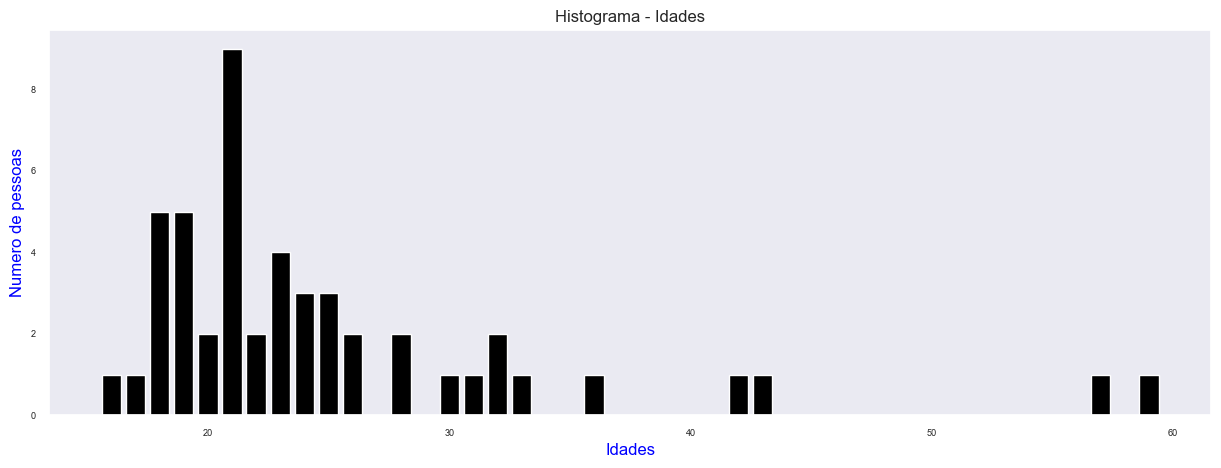

In [155]:
import matplotlib.pyplot as plt

eixo_X_features = dados_features_train.Idade.value_counts().sort_index().index
eixo_Y_features = dados_features_train.Idade.value_counts().sort_index().values

plt.figure(figsize=(15,5))

plt.bar(eixo_X_features, eixo_Y_features, color='Black')
plt.title('Histograma - Idades', fontsize=12)
plt.xlabel("Idades", fontsize = 12, color='blue')
plt.ylabel("Numero de pessoas", fontsize= 12, color='blue')
plt.grid()


## Análise Exploratória de Dados (EDA)

### Análise Univariada

#### **Variável Target**

... a principal feature (coluna) ou resultado que um modelo de machine learning tenta prever ou explicar.

No nosso caso:

`AnsiedadeRedes`, `PreocupaçãoNegativa` e `FrequenciaDepressão`

##### `AnsiedadeRedes`

In [156]:
dados_targets_train.AnsiedadeRedes.value_counts(normalize=True)

AnsiedadeRedes
Às vezes          0.354167
Raramente         0.250000
Sempre            0.166667
Nunca             0.145833
Frequentemente    0.083333
Name: proportion, dtype: float64

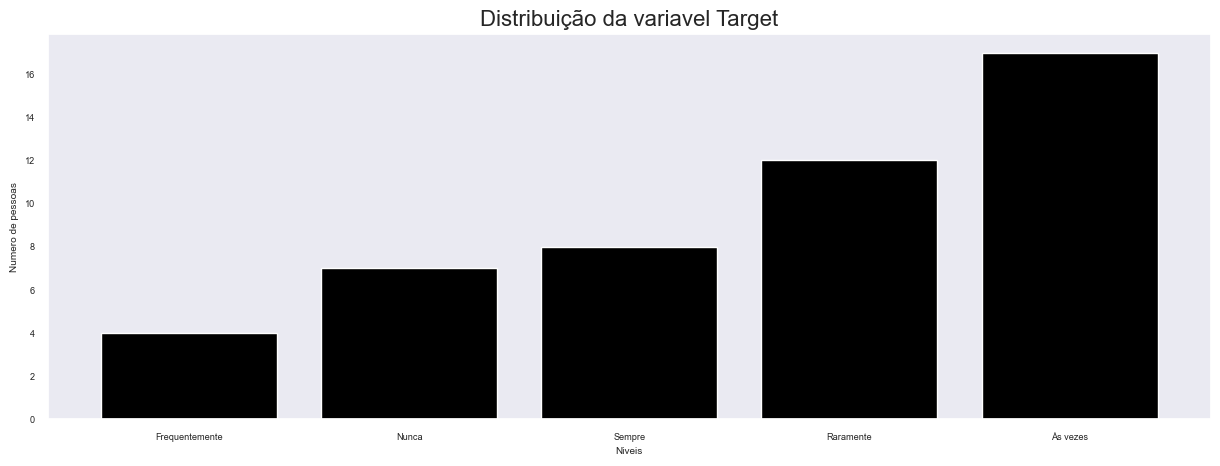

In [157]:
eixo_x = dados_targets_train.AnsiedadeRedes.value_counts().sort_values().index
eixo_y = dados_targets_train.AnsiedadeRedes.value_counts().sort_values().values

plt.figure(figsize=(15,5))

plt.bar(eixo_x, eixo_y, color='Black')
plt.title('Distribuição da variavel Target', fontsize=16)
plt.xlabel('Niveis')
plt.ylabel('Numero de pessoas')
plt.grid()

##### `PreocupaçãoNegativa`

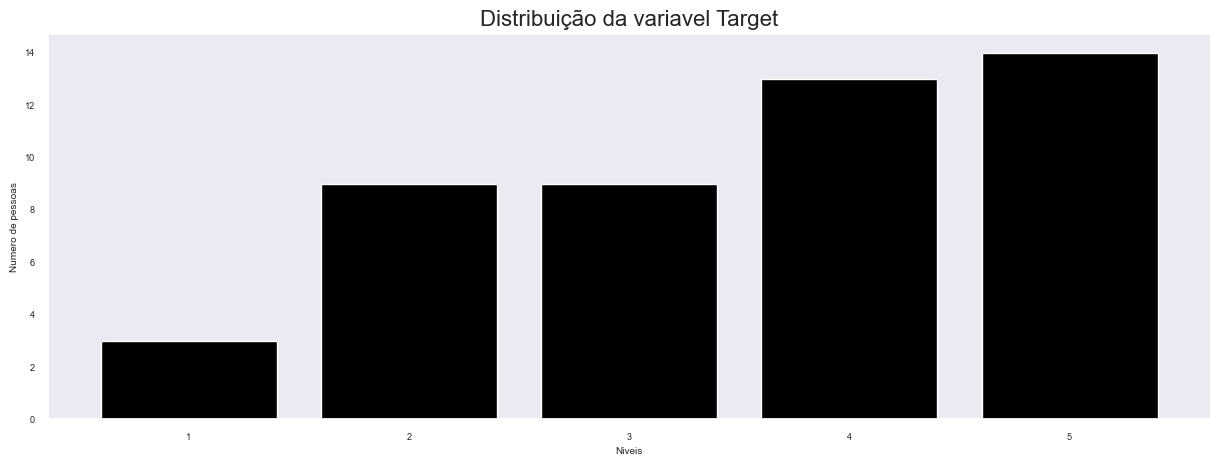

In [158]:
eixo_x = dados_targets_train.PreocupaçãoNegativa.value_counts().sort_values().index
eixo_y = dados_targets_train.PreocupaçãoNegativa.value_counts().sort_values().values

plt.figure(figsize=(15,5))

plt.bar(eixo_x, eixo_y, color='Black')
plt.title('Distribuição da variavel Target', fontsize=16)
plt.xlabel('Niveis')
plt.ylabel('Numero de pessoas')
plt.grid()

##### `FrequenciaDepressão`

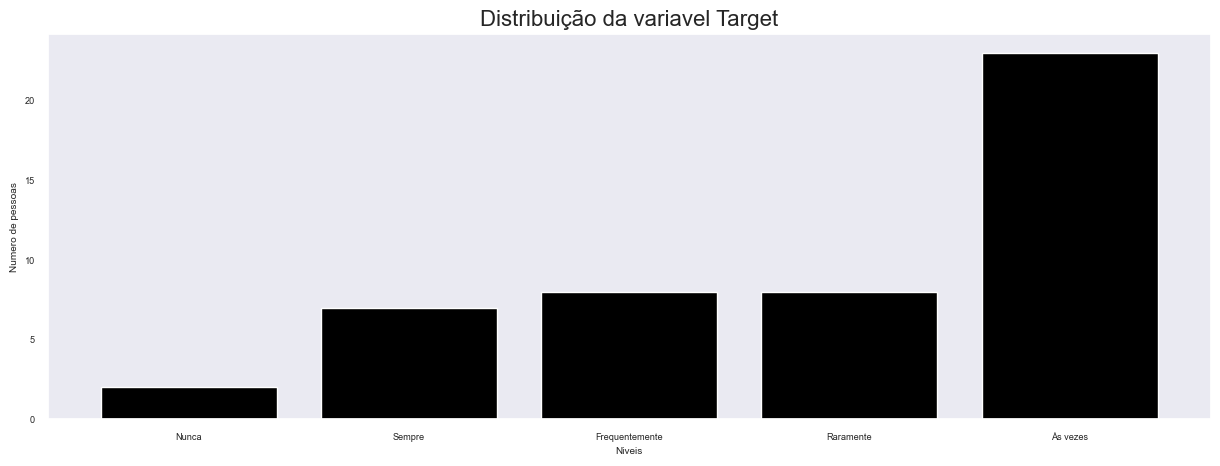

In [159]:
eixo_x = dados_targets_train.FrequenciaDepressão.value_counts().sort_values().index
eixo_y = dados_targets_train.FrequenciaDepressão.value_counts().sort_values().values

plt.figure(figsize=(15,5))

plt.bar(eixo_x, eixo_y, color='Black')
plt.title('Distribuição da variavel Target', fontsize=16)
plt.xlabel('Niveis')
plt.ylabel('Numero de pessoas')
plt.grid()

#### **Distribuição dos Dados**

In [160]:
import seaborn as sns

#função para plotar detalhadamente cada coluna
def plot_distribuicao(dados):
    plt.figure(figsize=(12,4))
    sns.histplot(dados, kde=True)
    plt.show()

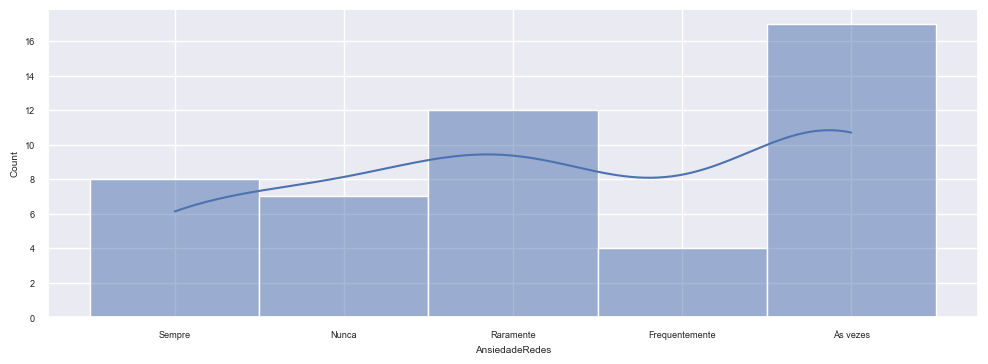

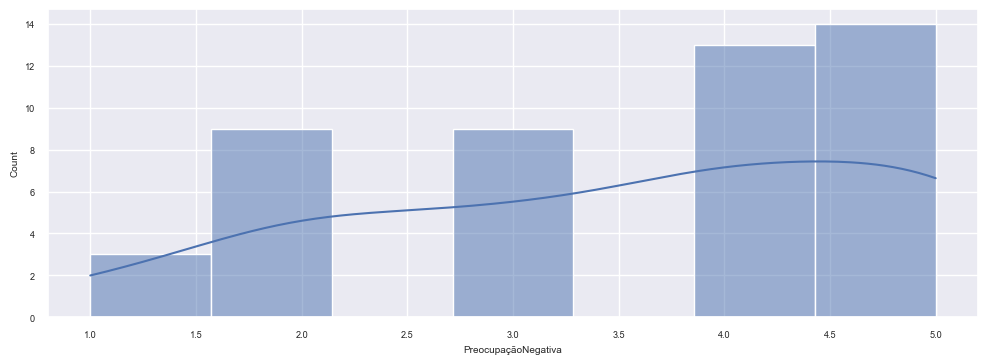

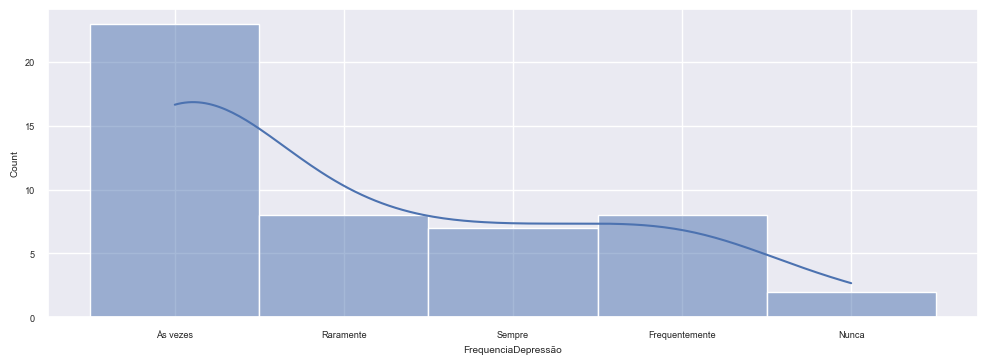

In [161]:
for coluna in dados_targets_train.columns:
    plot_distribuicao(dados_targets_train[coluna])

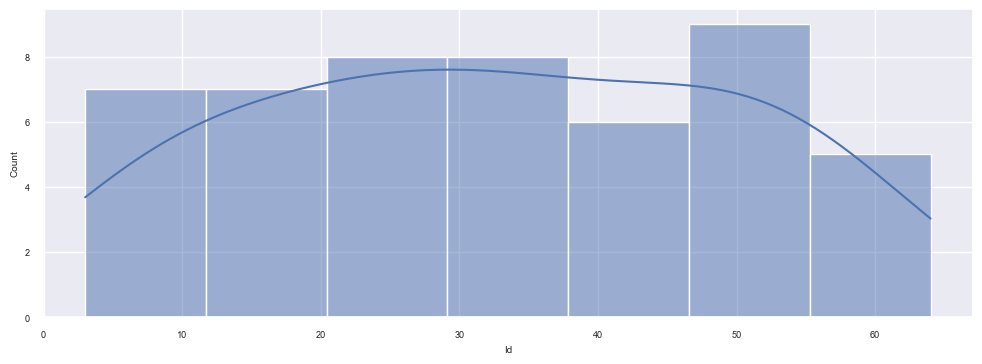

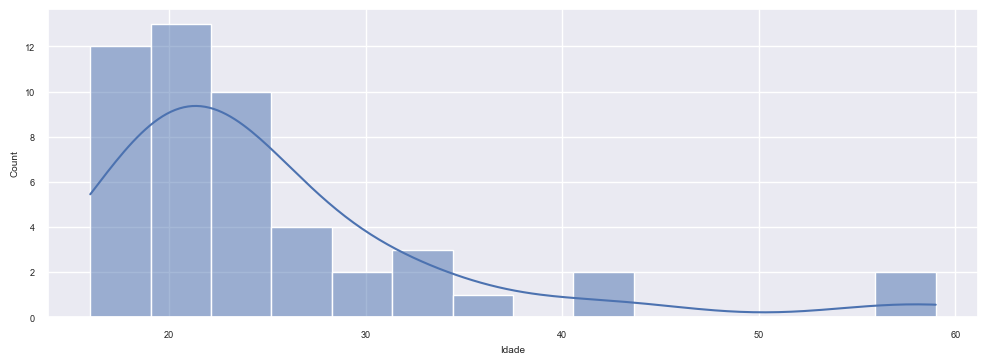

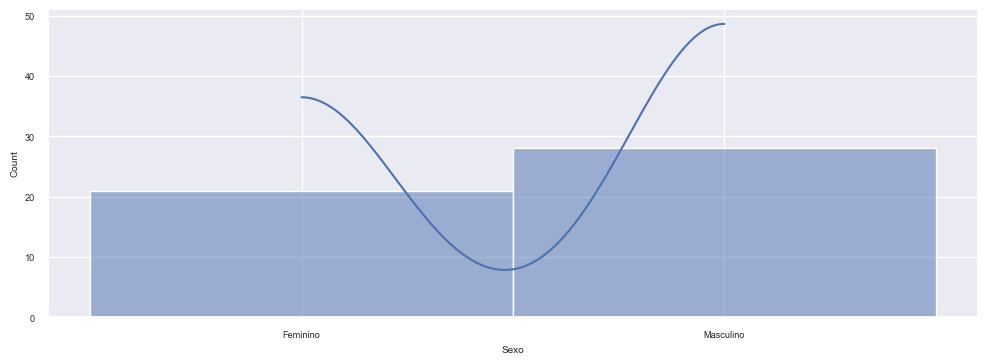

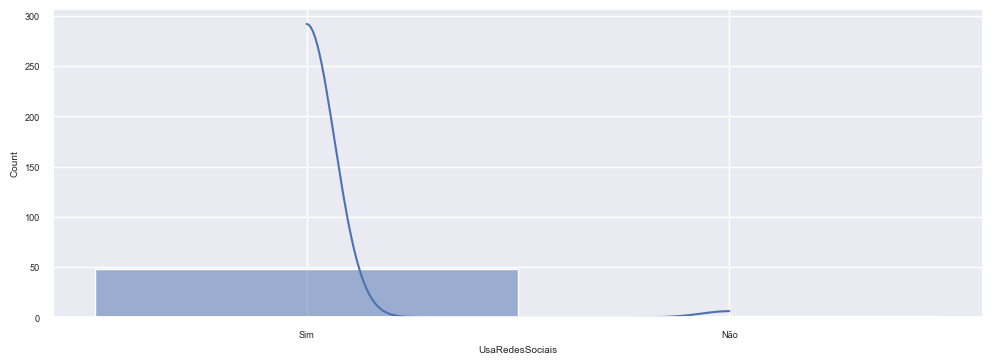

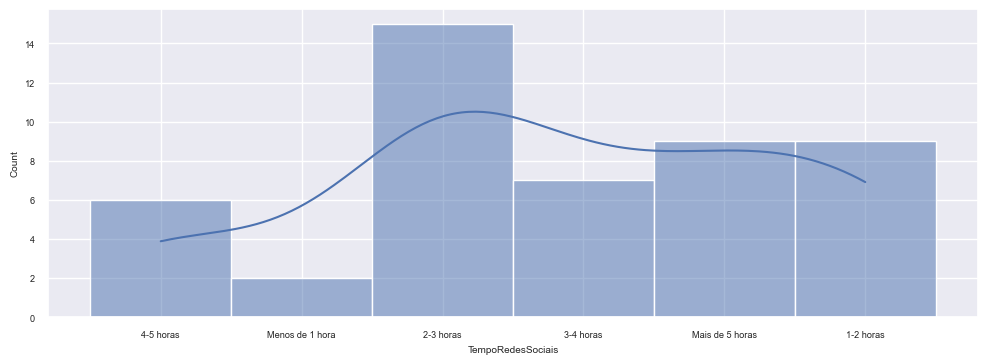

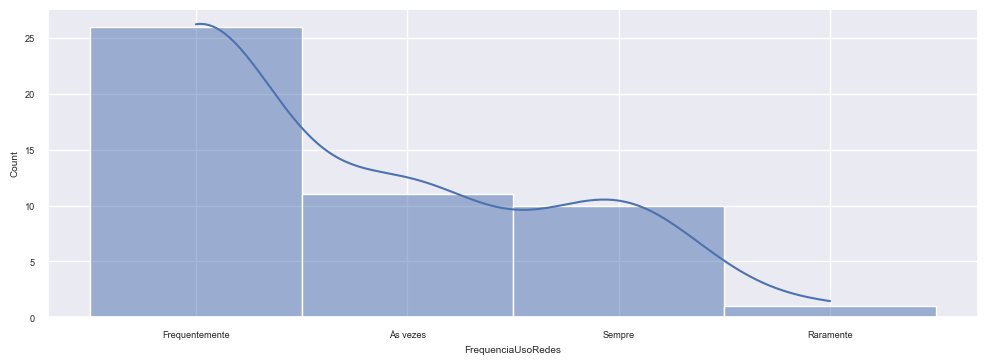

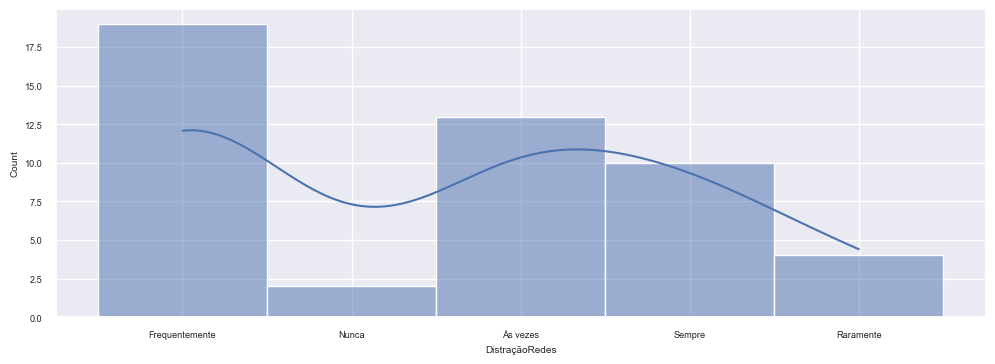

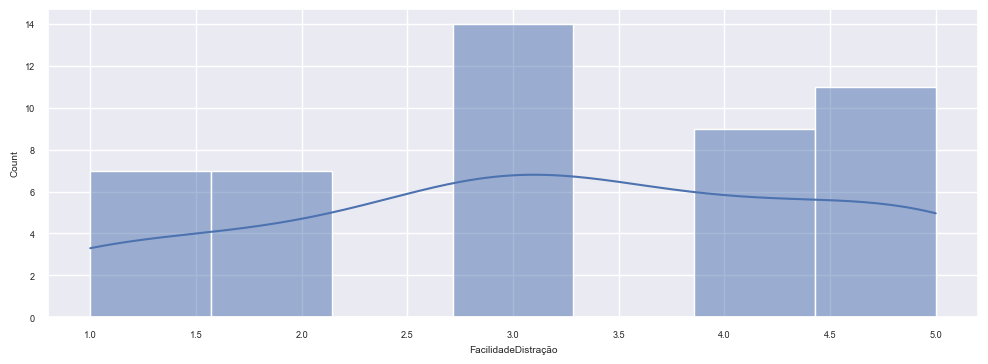

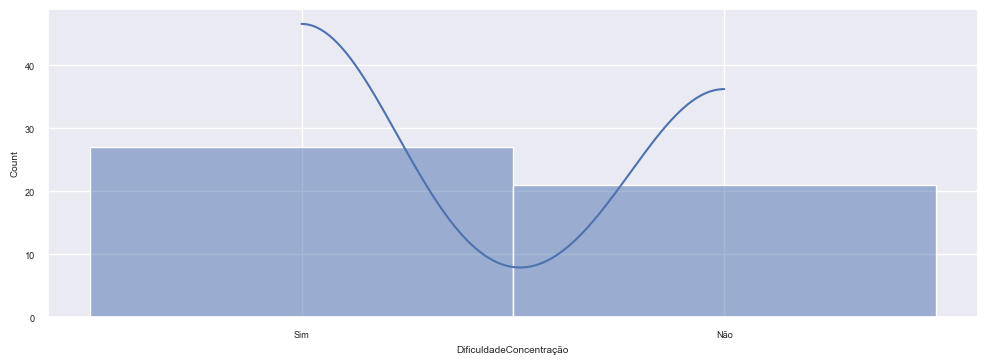

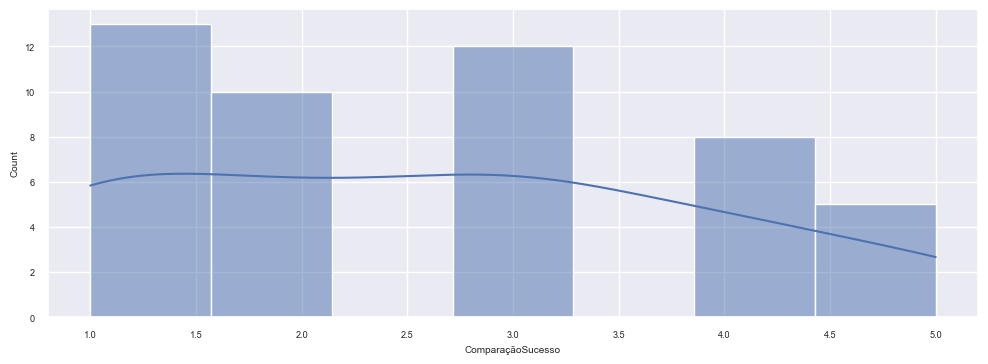

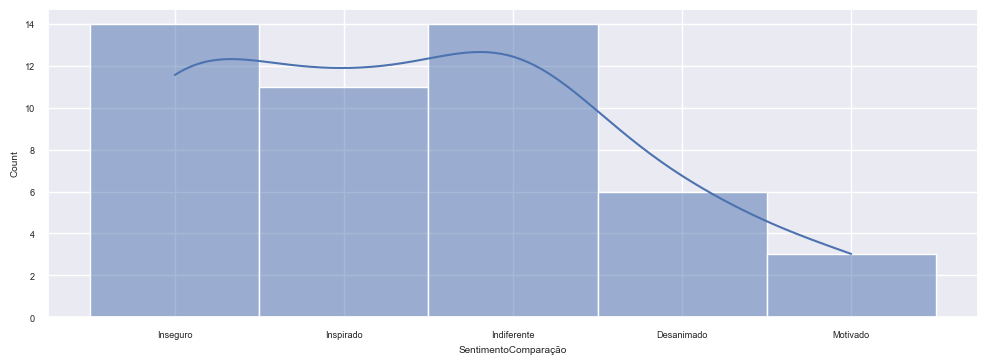

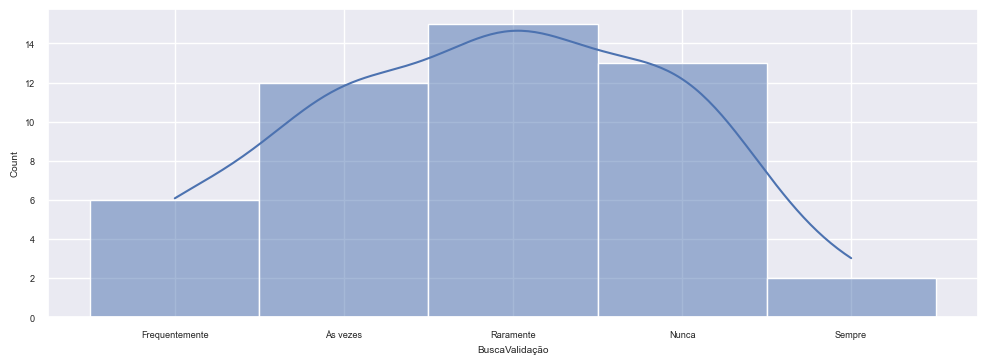

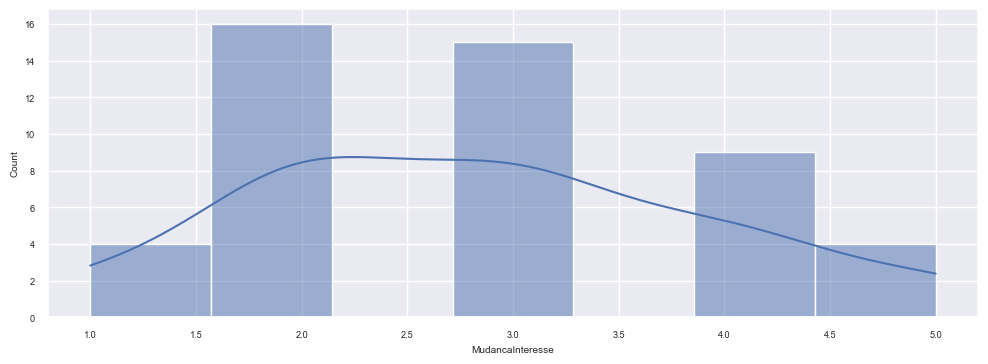

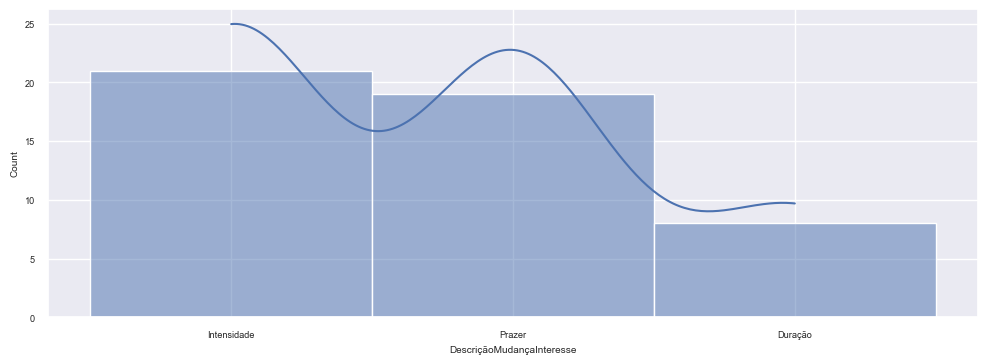

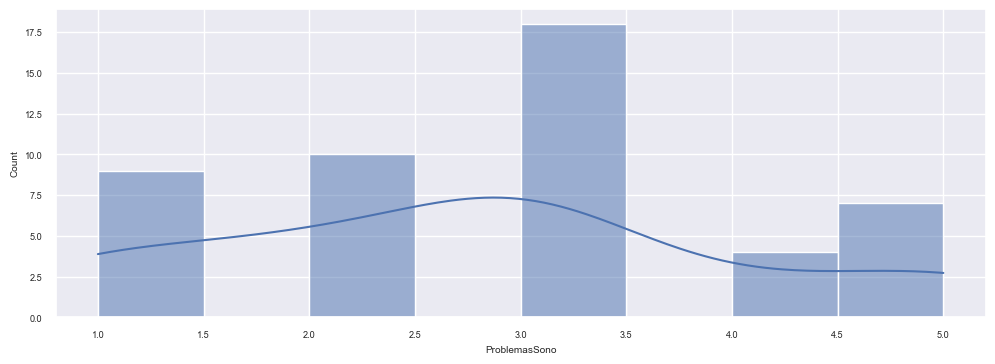

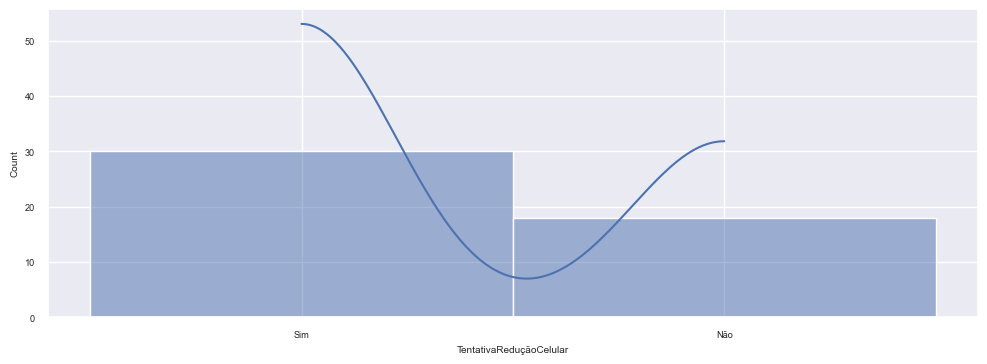

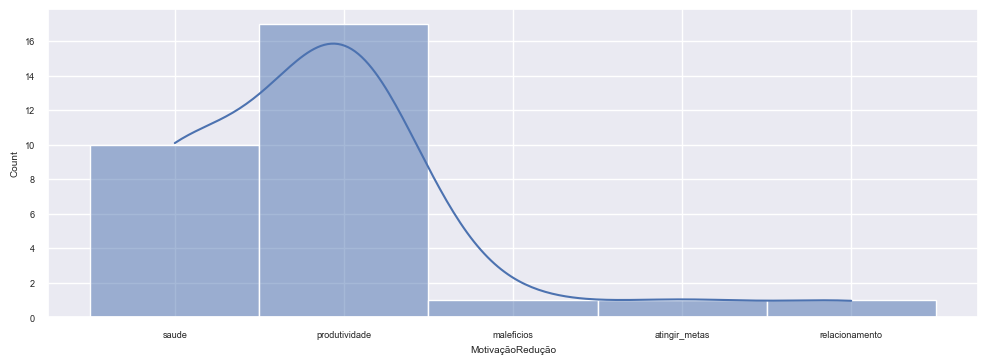

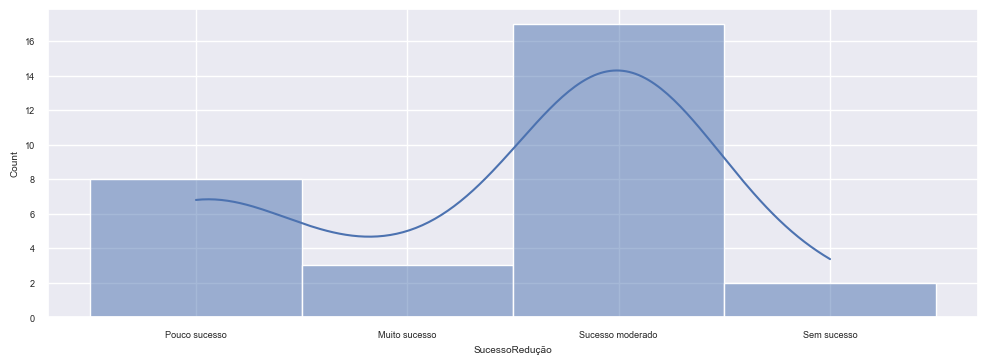

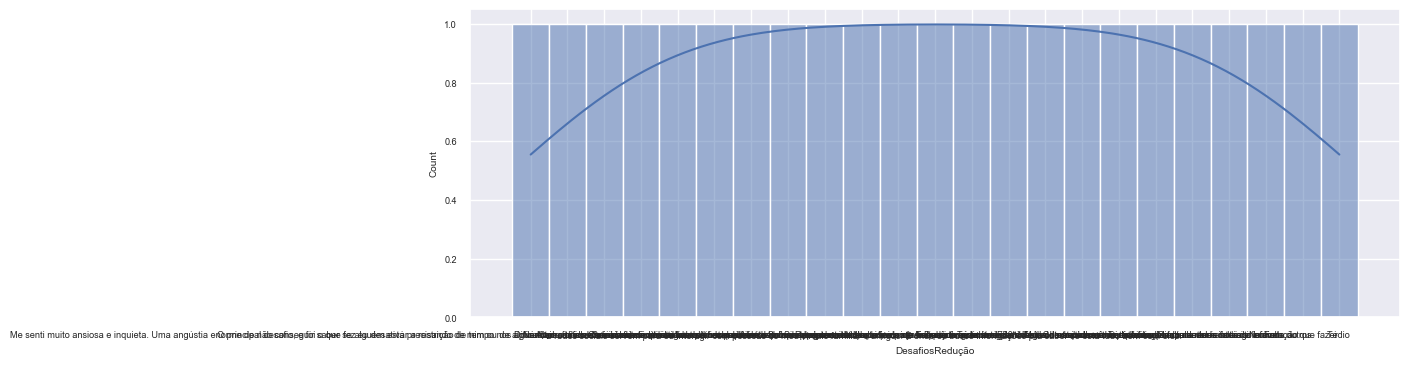

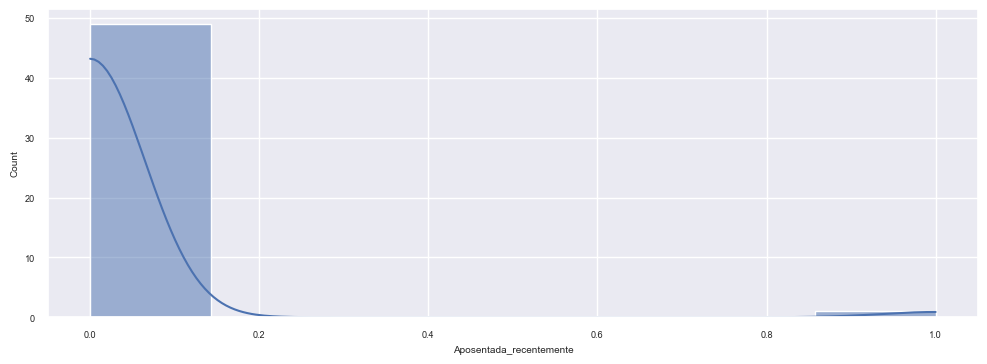

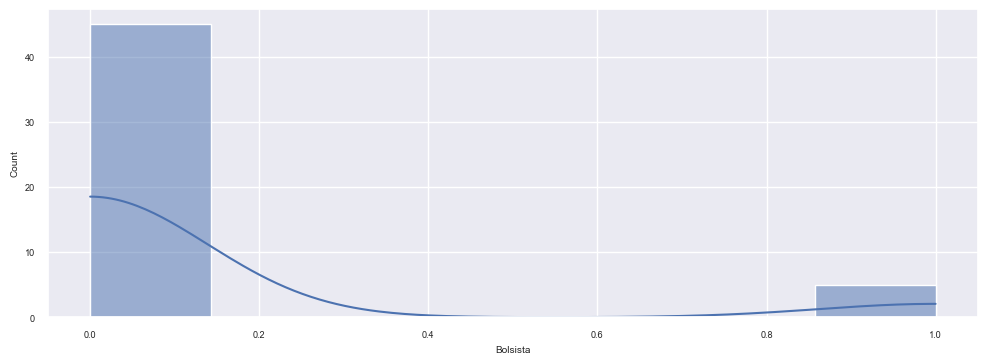

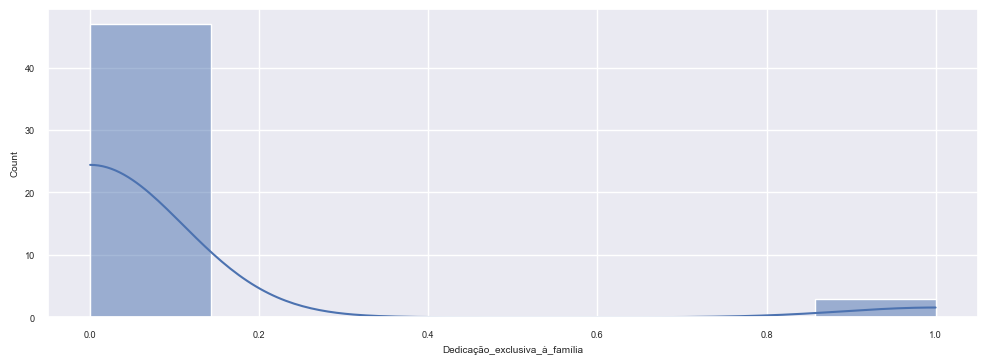

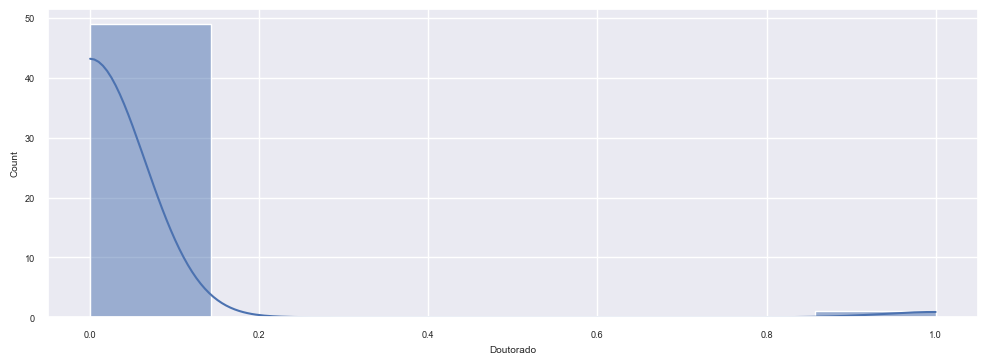

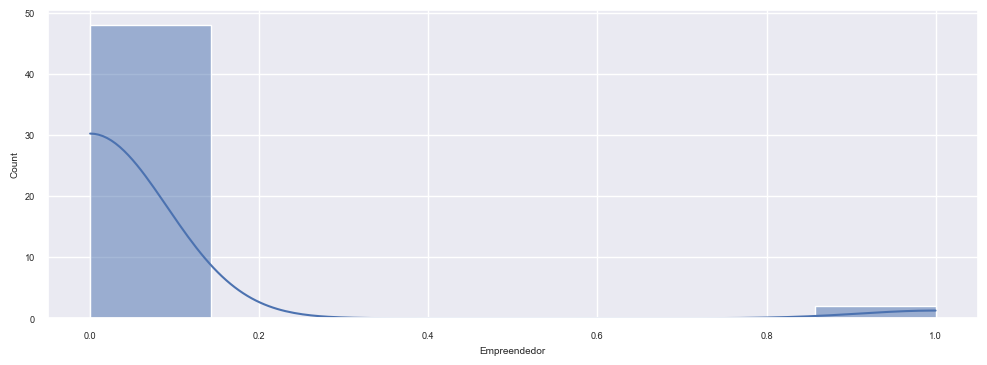

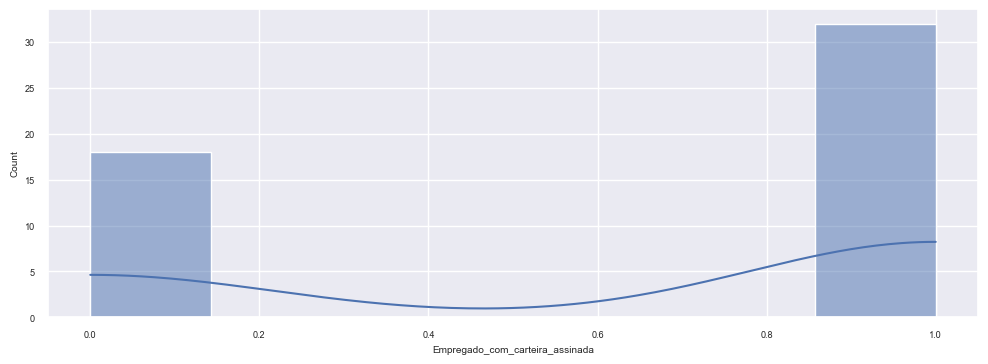

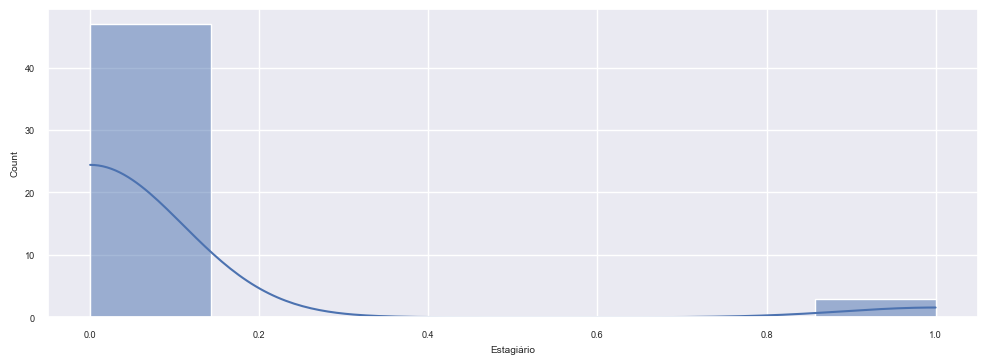

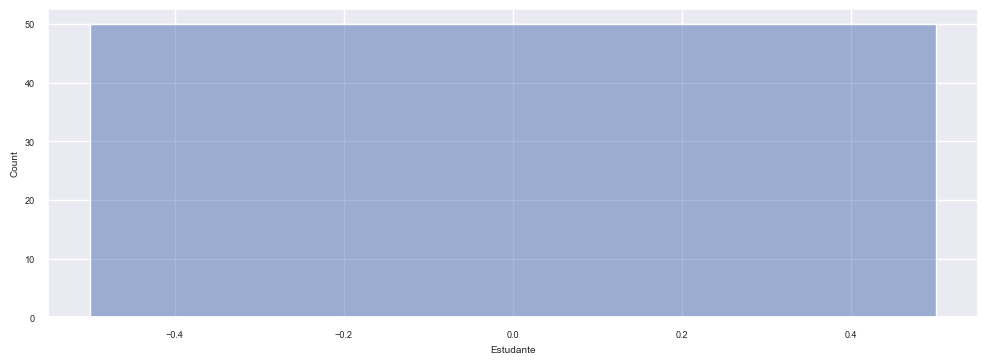

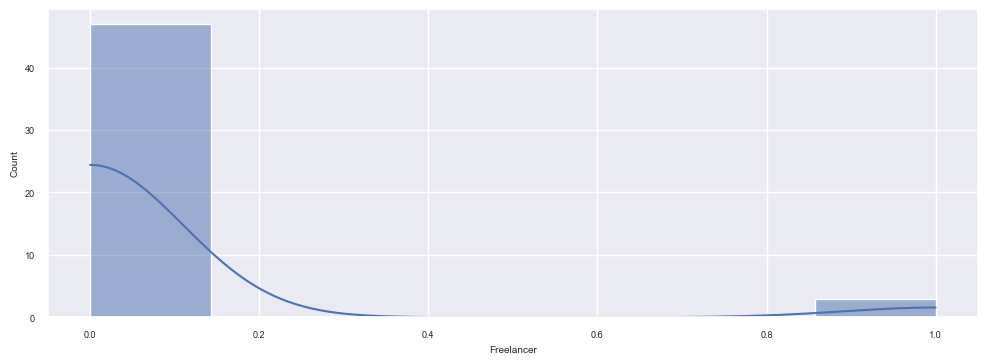

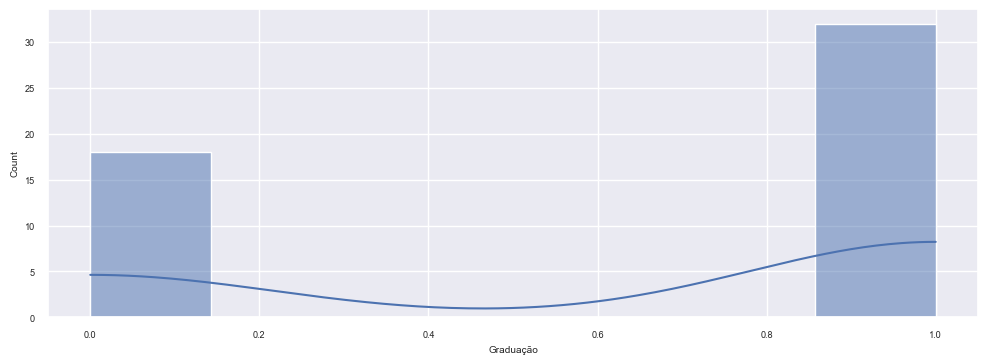

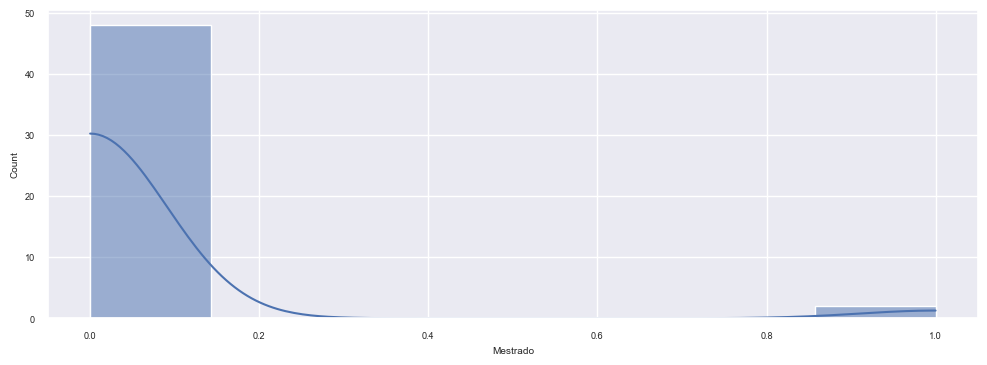

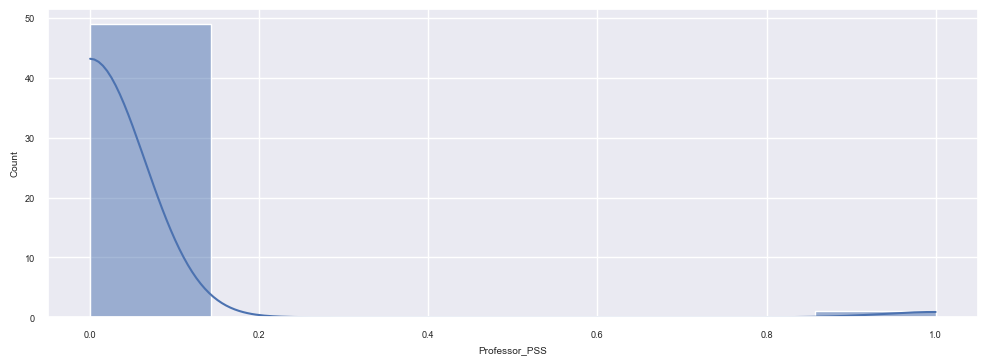

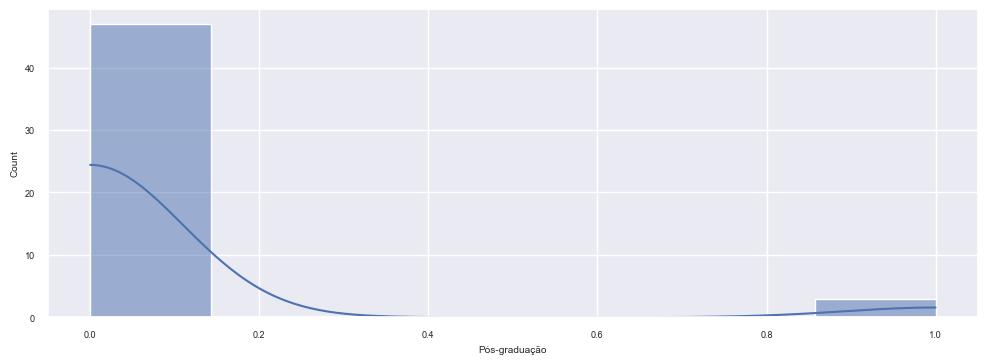

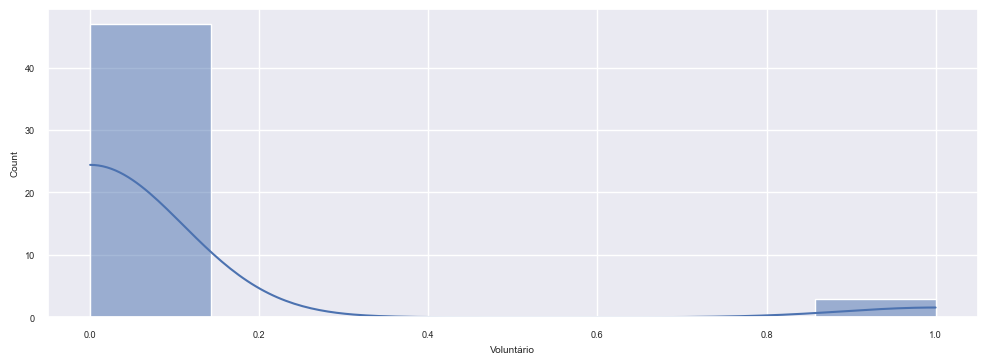

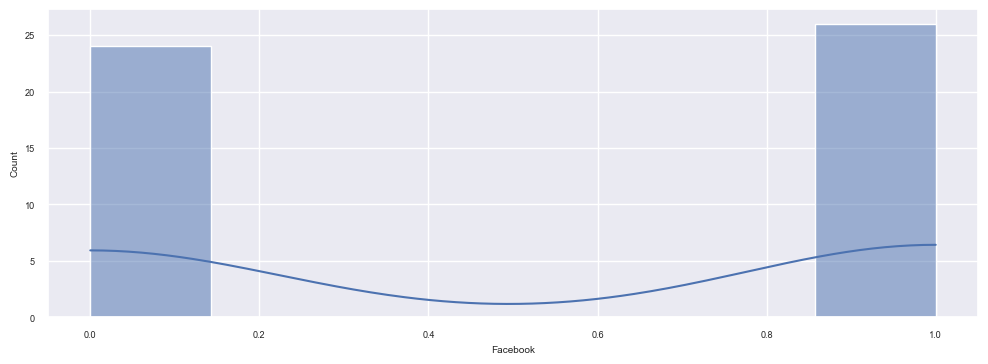

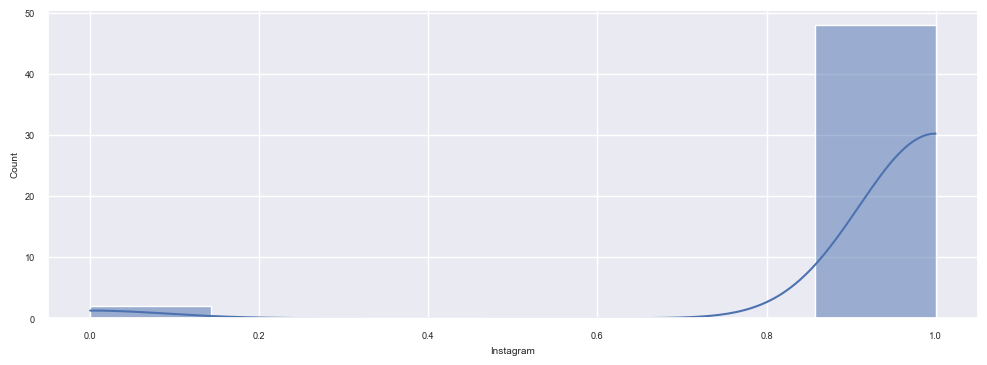

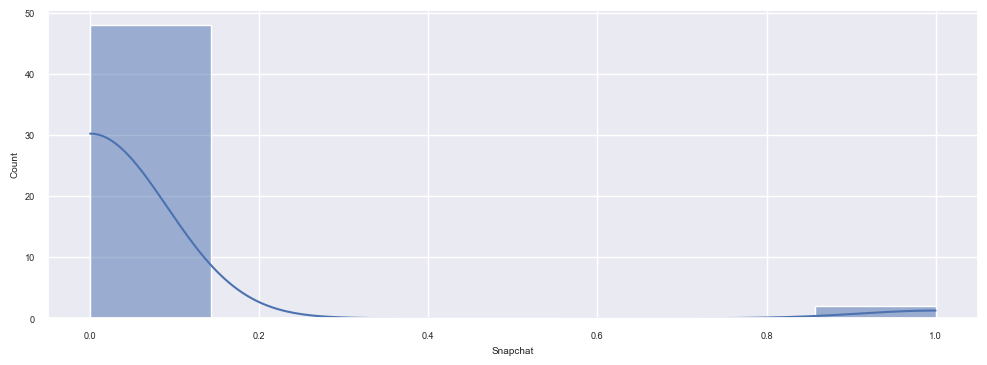

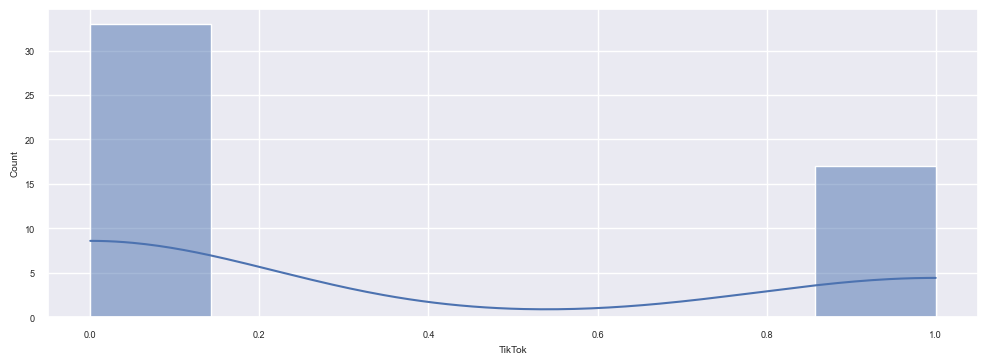

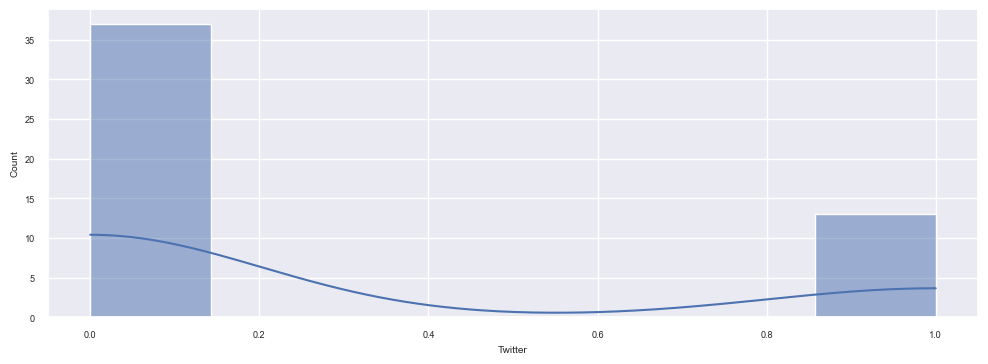

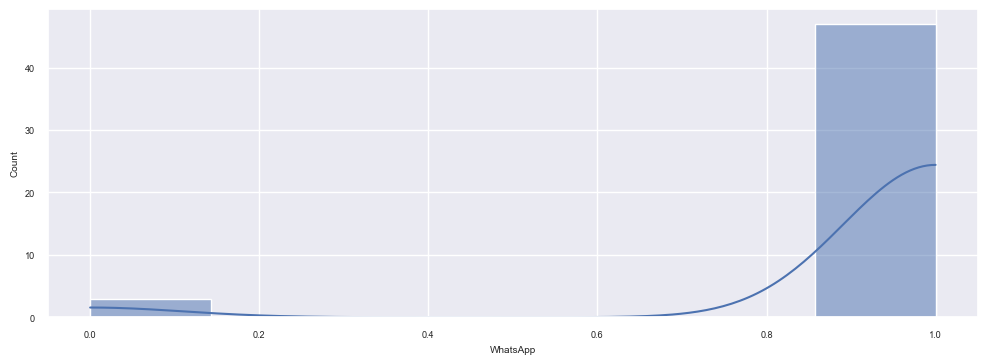

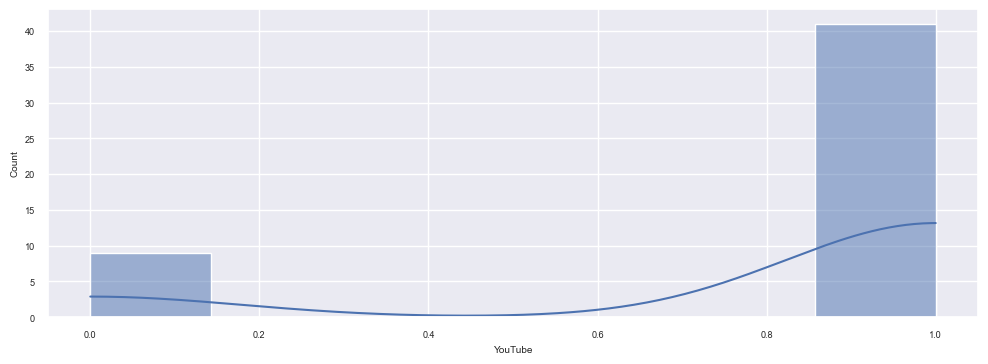

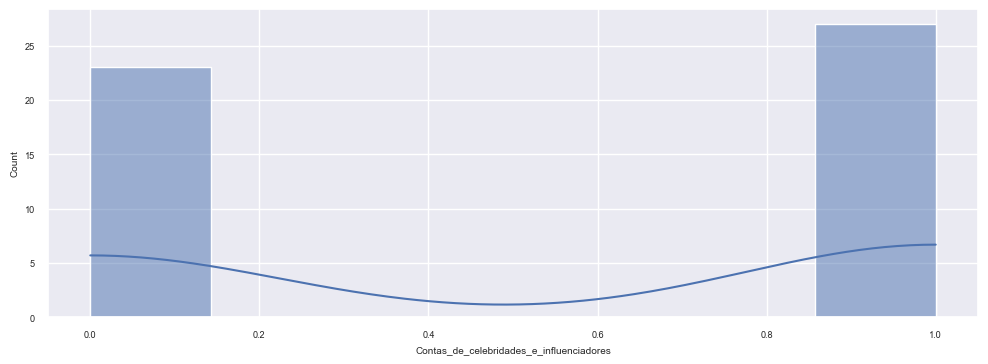

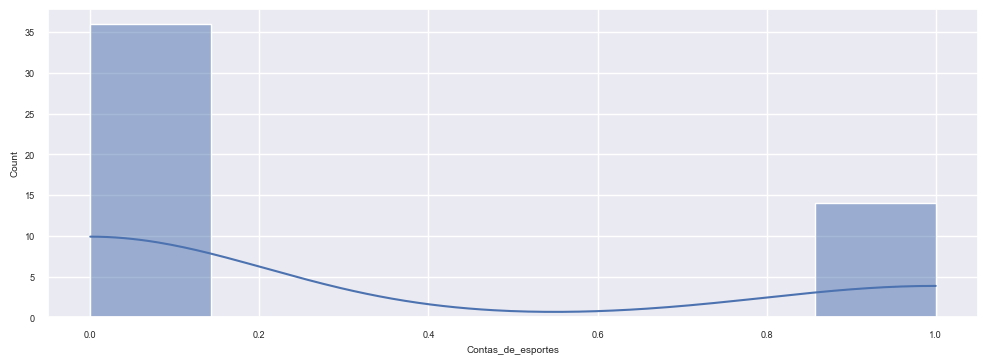

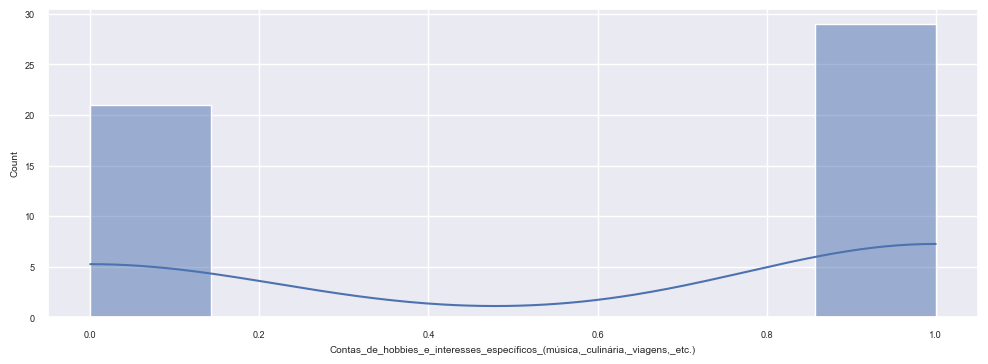

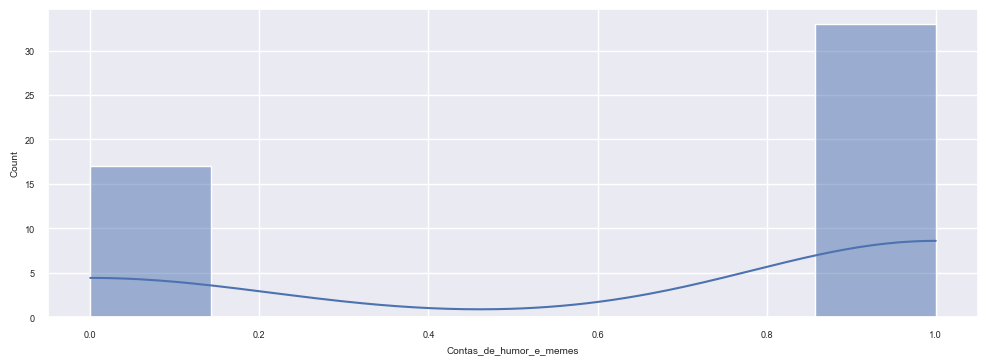

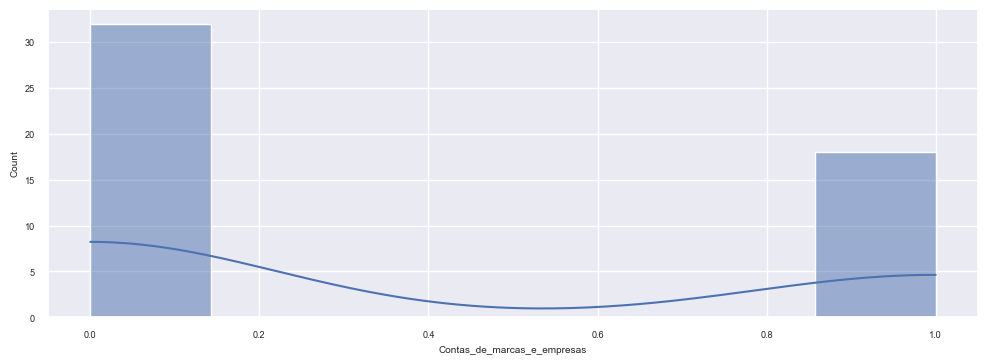

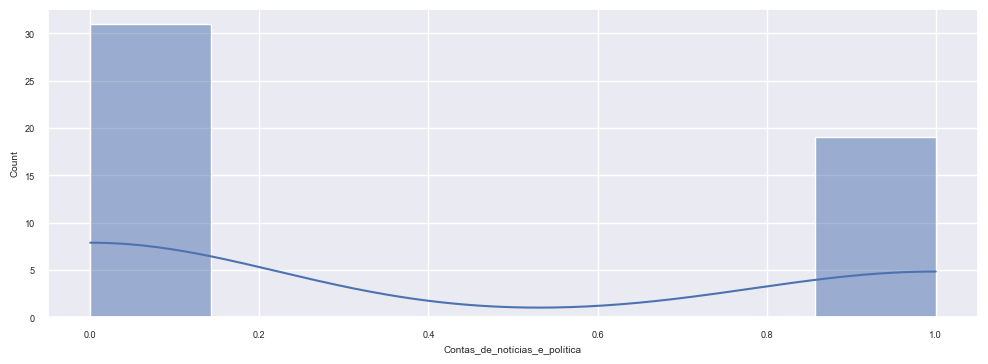

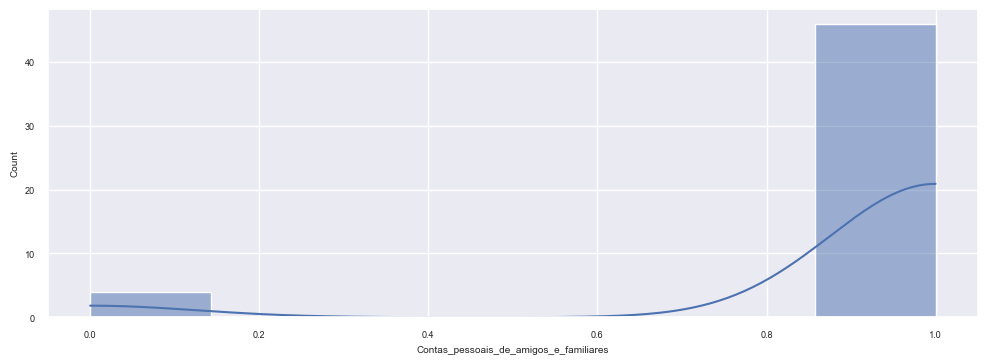

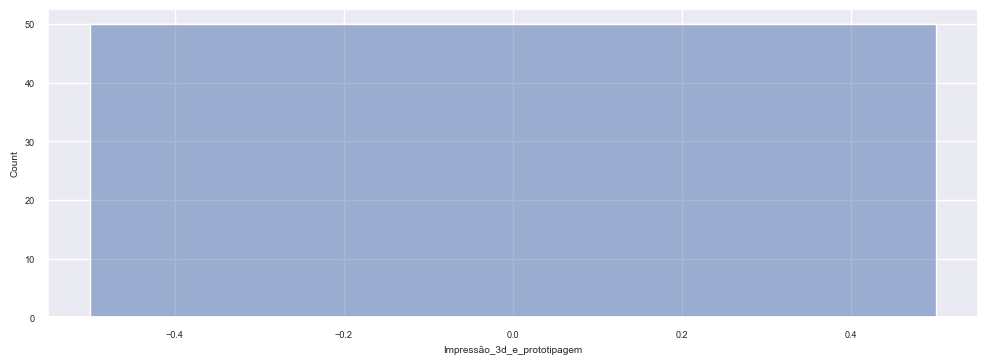

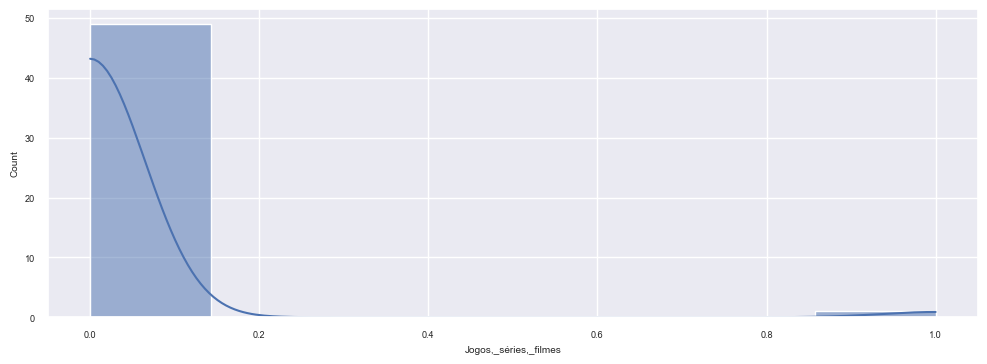

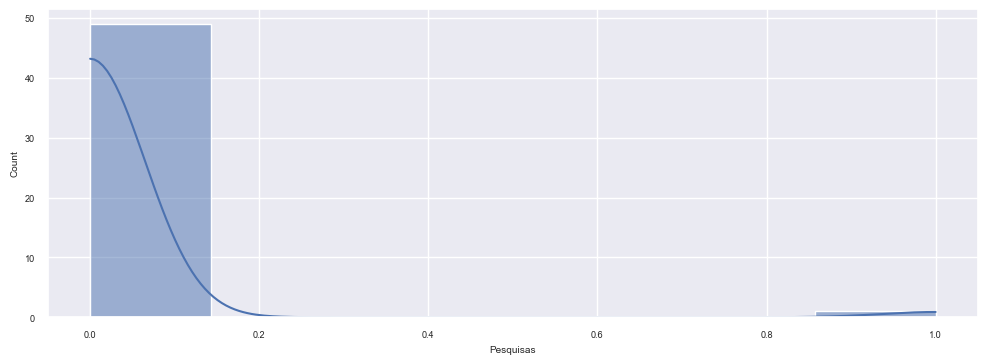

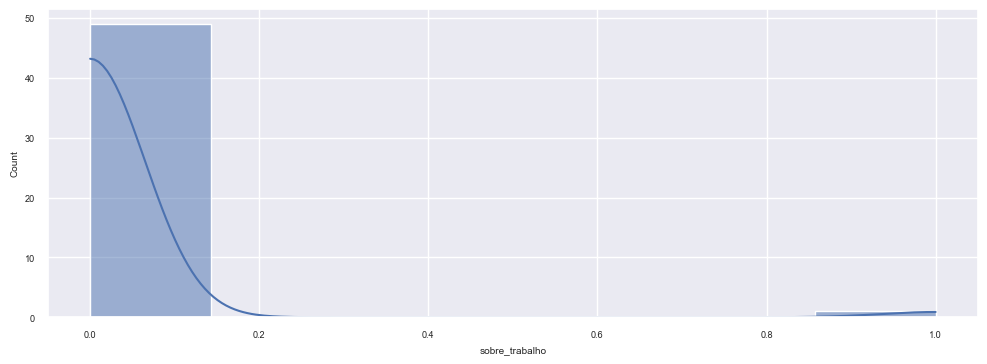

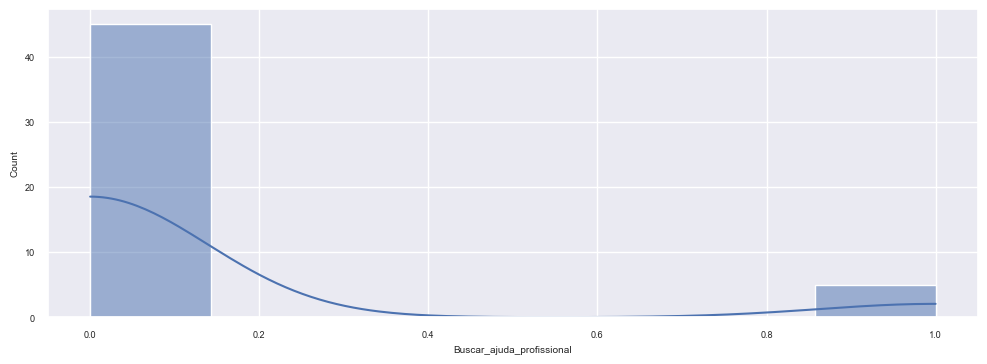

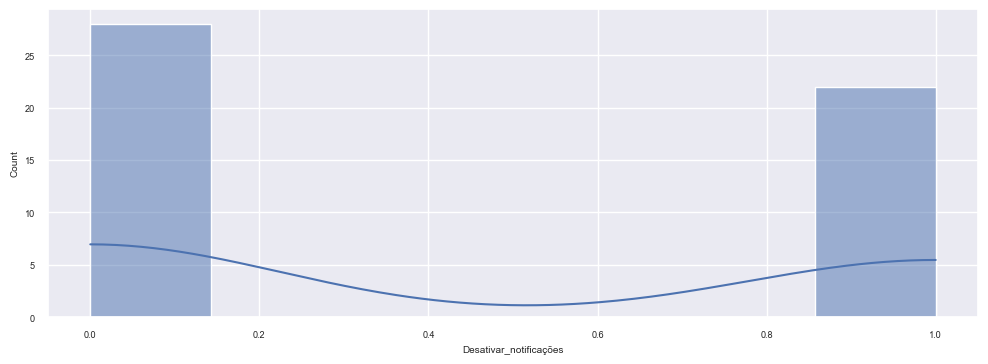

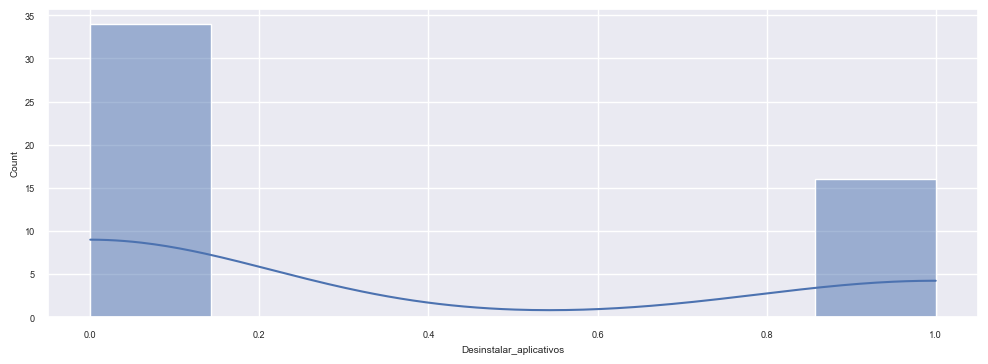

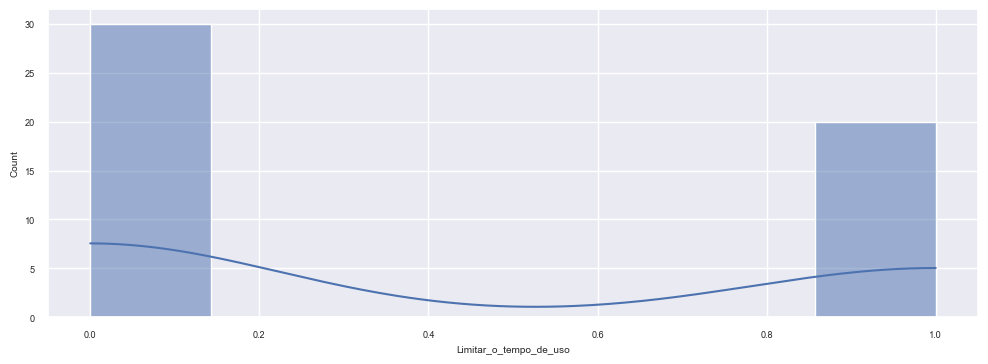

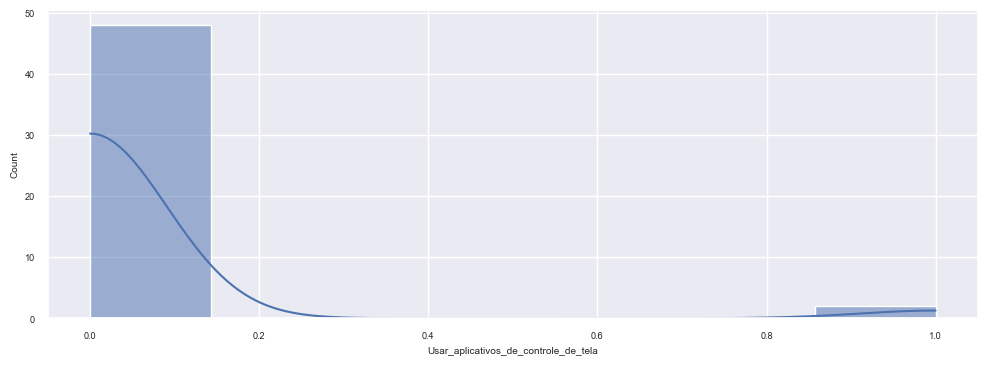

In [162]:
for coluna in dados_features_train.columns:
    plot_distribuicao(dados_features_train[coluna])

#### **Quantidade de Nulos**

In [163]:
dados_targets_train.isna().sum().sort_values()

AnsiedadeRedes         2
PreocupaçãoNegativa    2
FrequenciaDepressão    2
dtype: int64

In [164]:
dados_features_train.isna().sum().sort_values()

Id                                                                                0
Estagiário                                                                        0
Estudante                                                                         0
Pós-graduação                                                                     0
Freelancer                                                                        0
Professor_PSS                                                                     0
Mestrado                                                                          0
Graduação                                                                         0
Empregado_com_carteira_assinada                                                   0
Dedicação_exclusiva_à_família                                                     0
Doutorado                                                                         0
Empreendedor                                                                

#### **Outliers**

In [165]:
#Função para plotar os graficos repetidamente
def plota_boxplot(dados):
    plt.figure(figsize=(12,4))
    sns.boxplot(dados, orient='h')

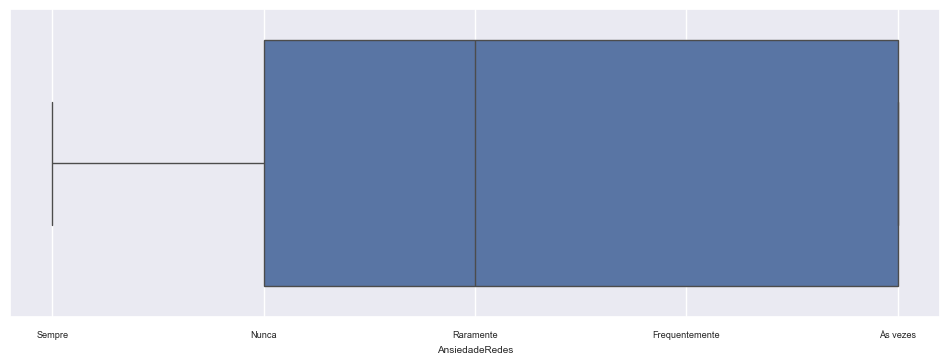

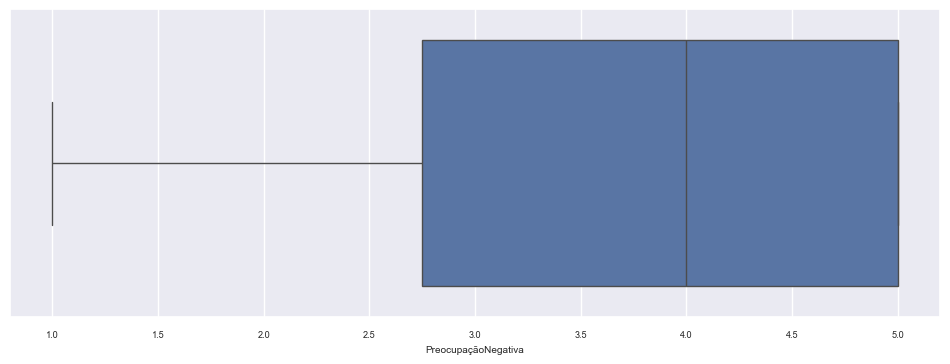

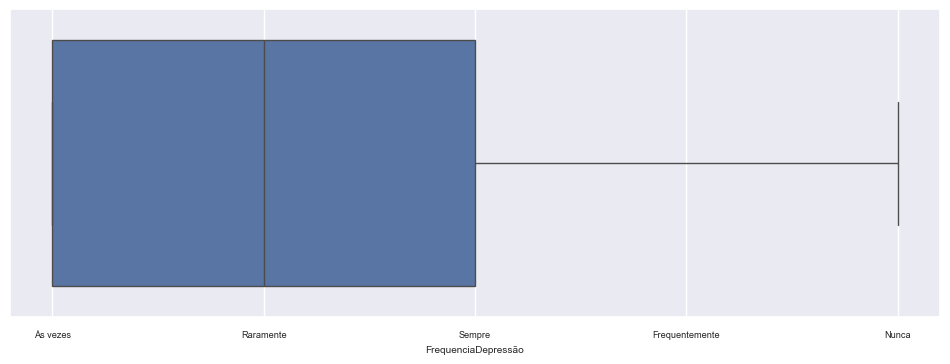

In [166]:
for coluna in dados_targets_train.columns:
    plota_boxplot(dados_targets_train[coluna])

C:\Users\Cosmo\AppData\Local\Temp\ipykernel_5872\3812976854.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,4))


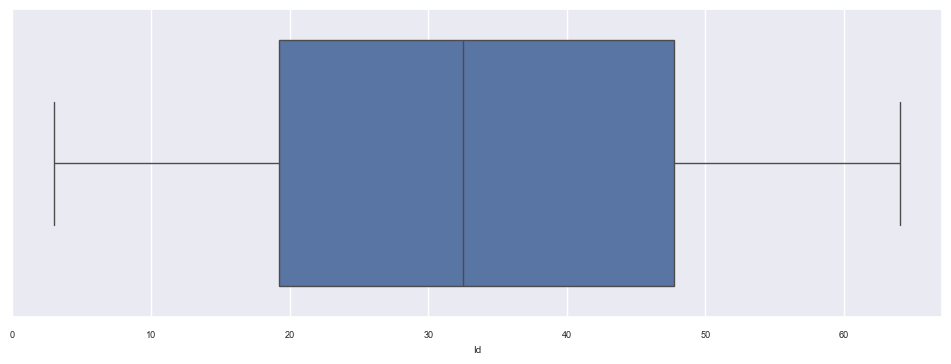

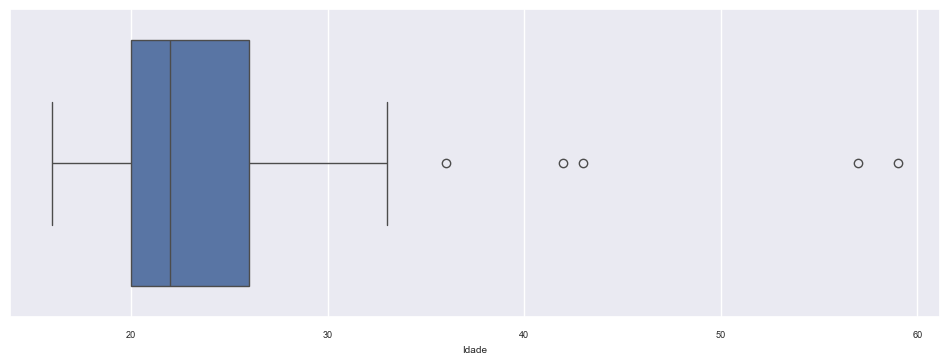

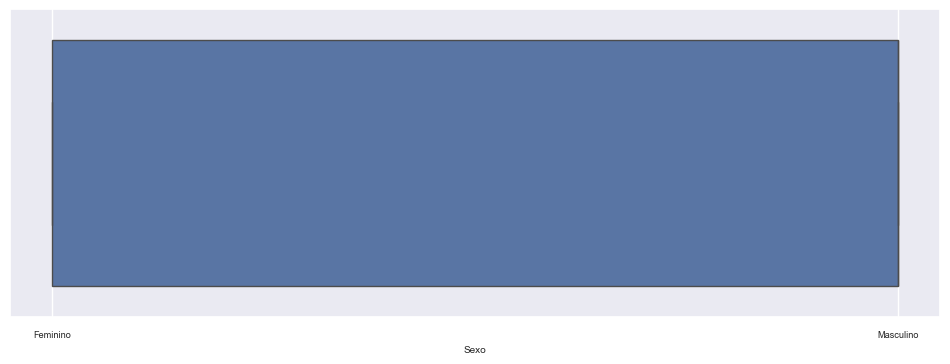

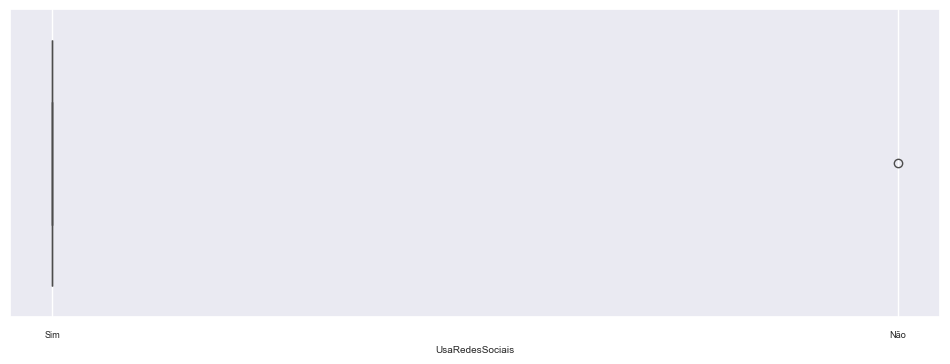

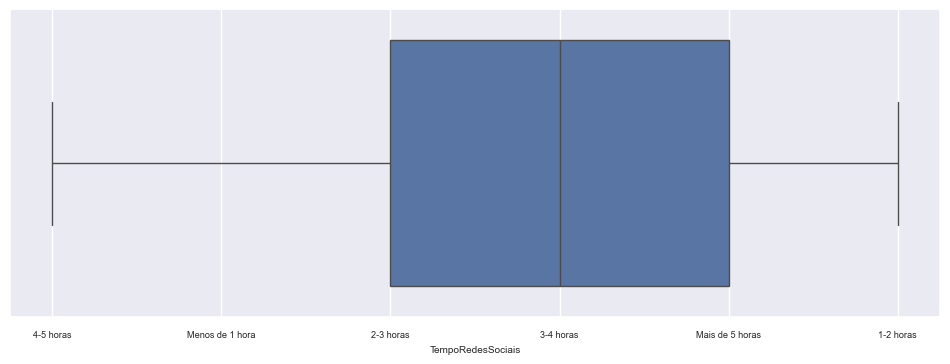

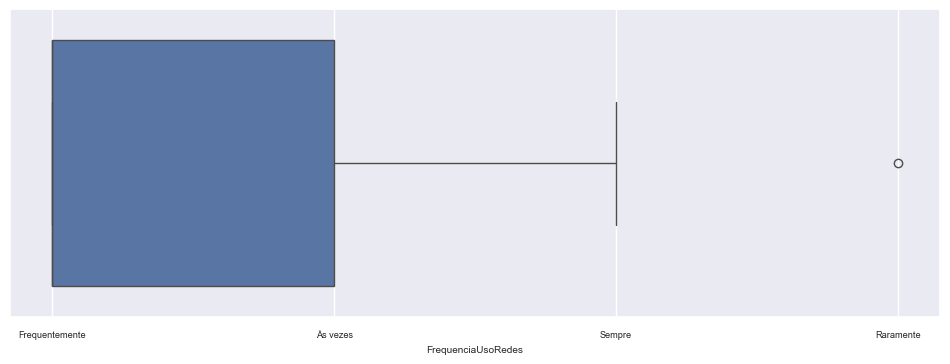

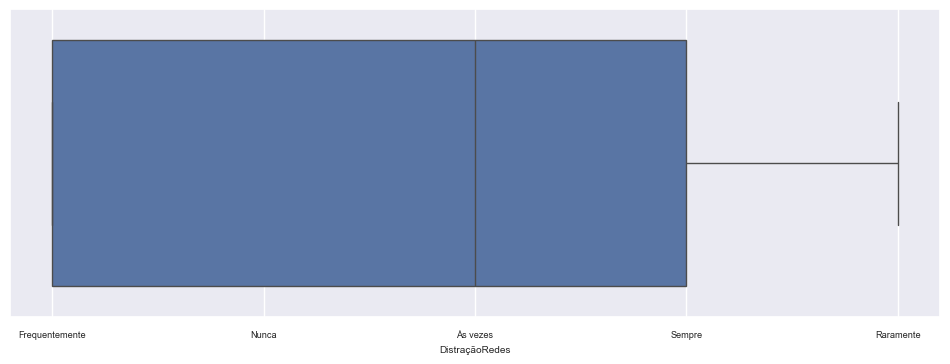

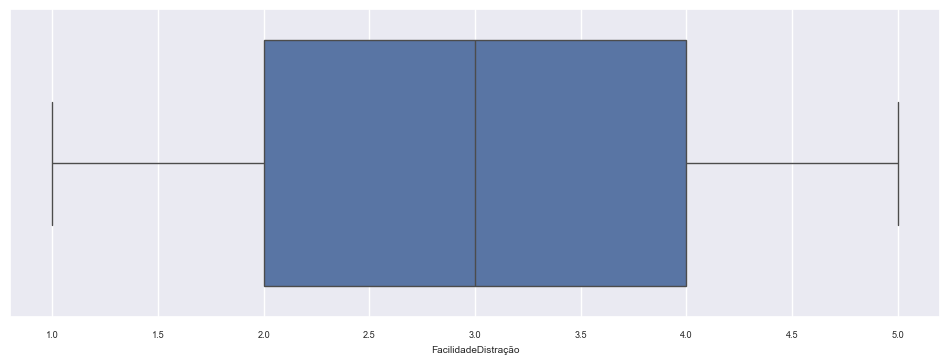

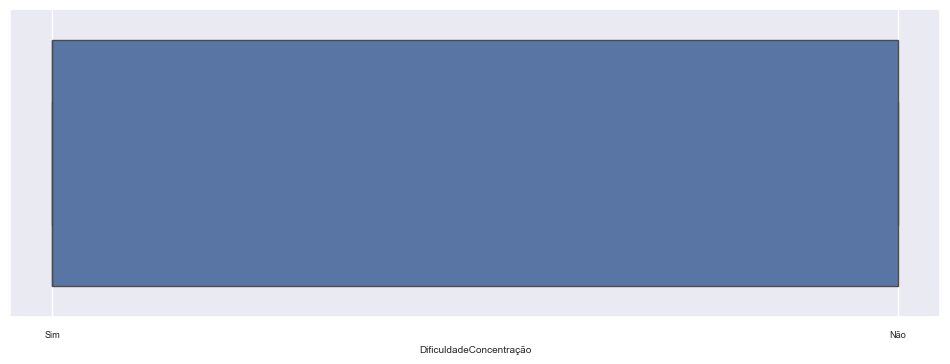

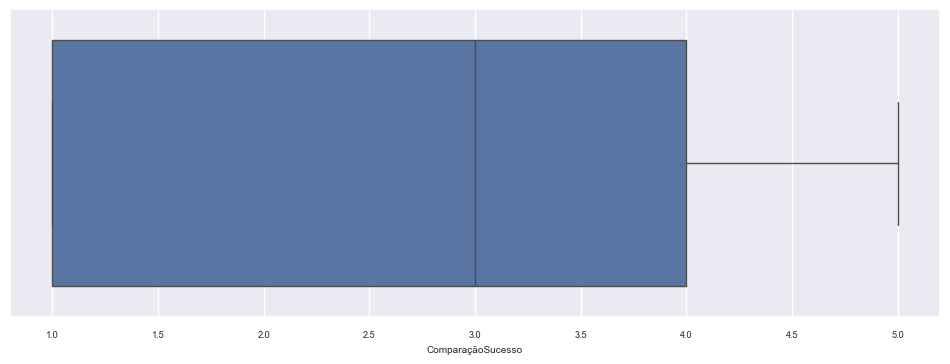

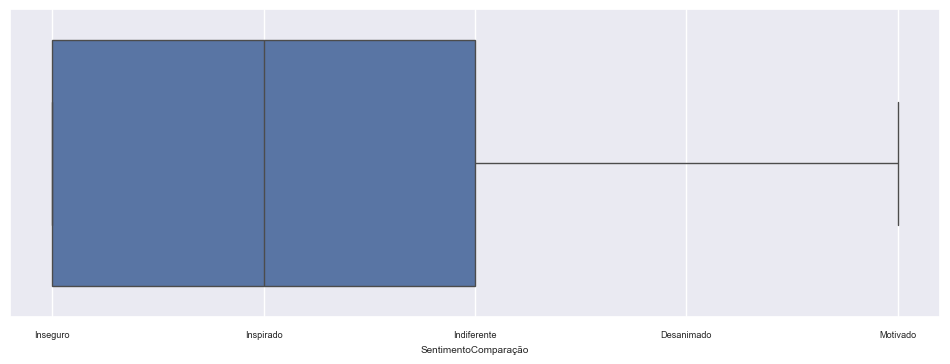

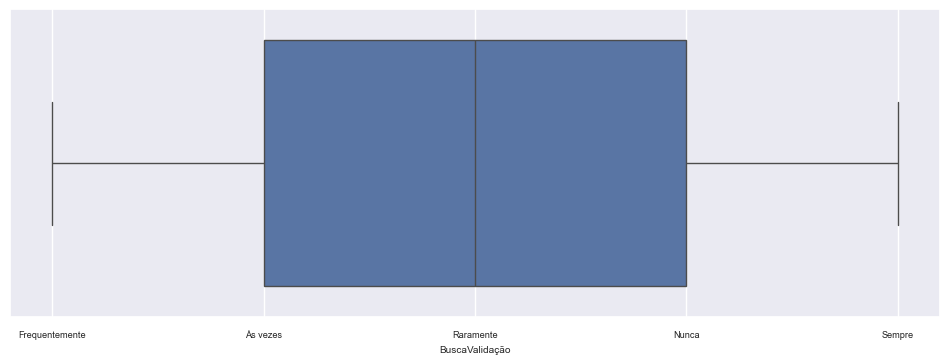

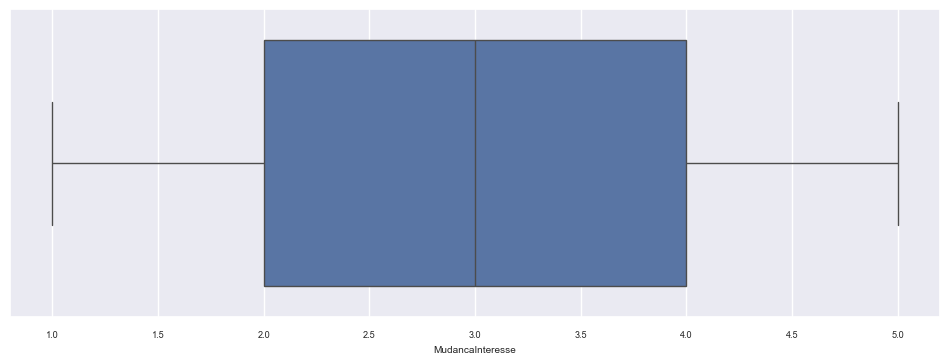

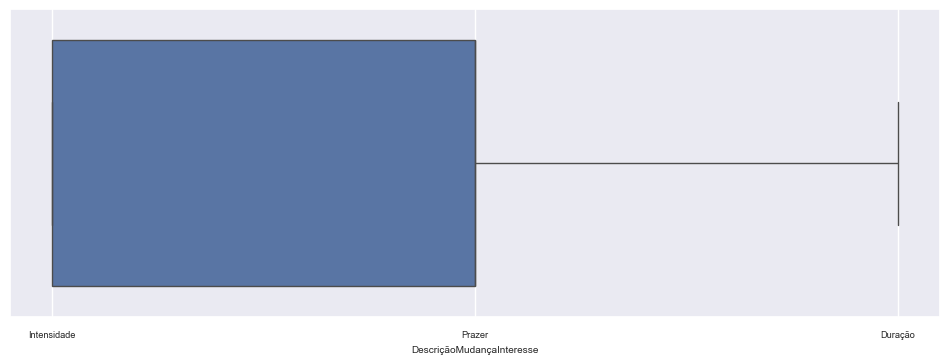

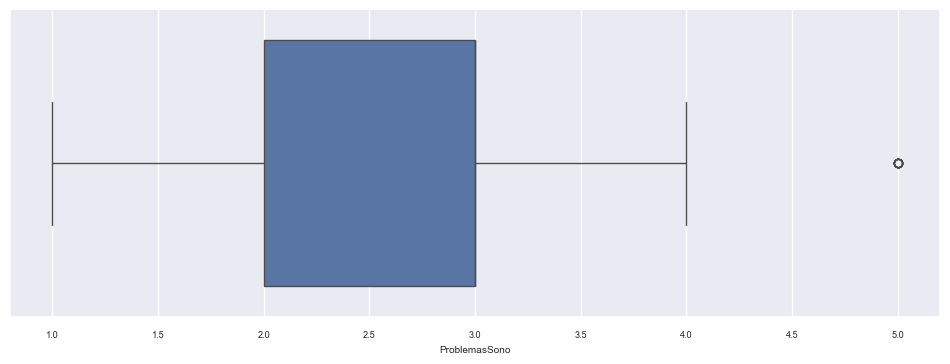

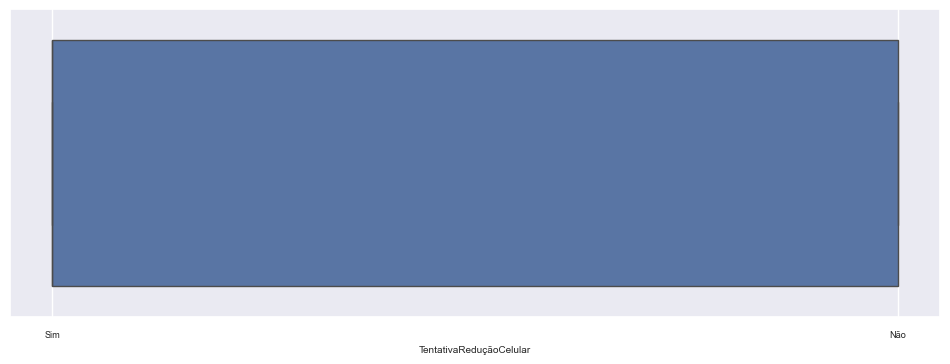

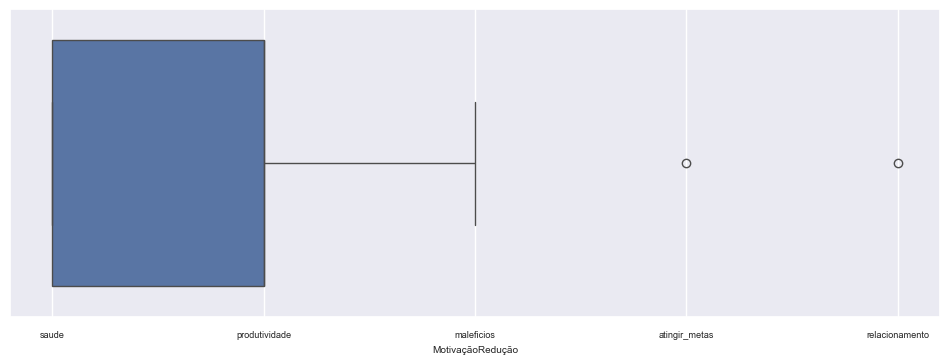

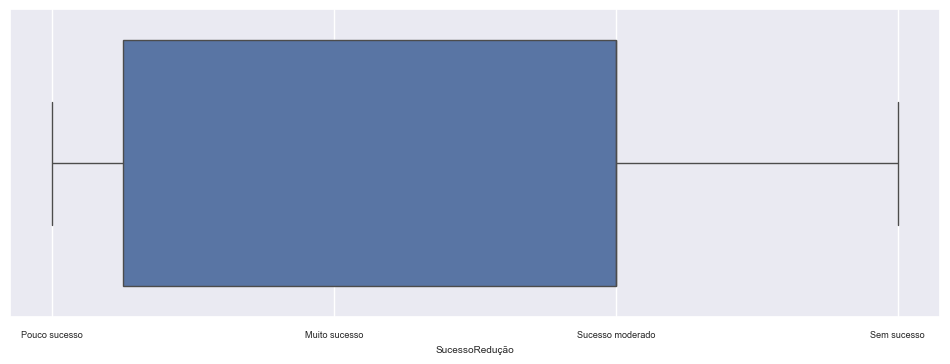

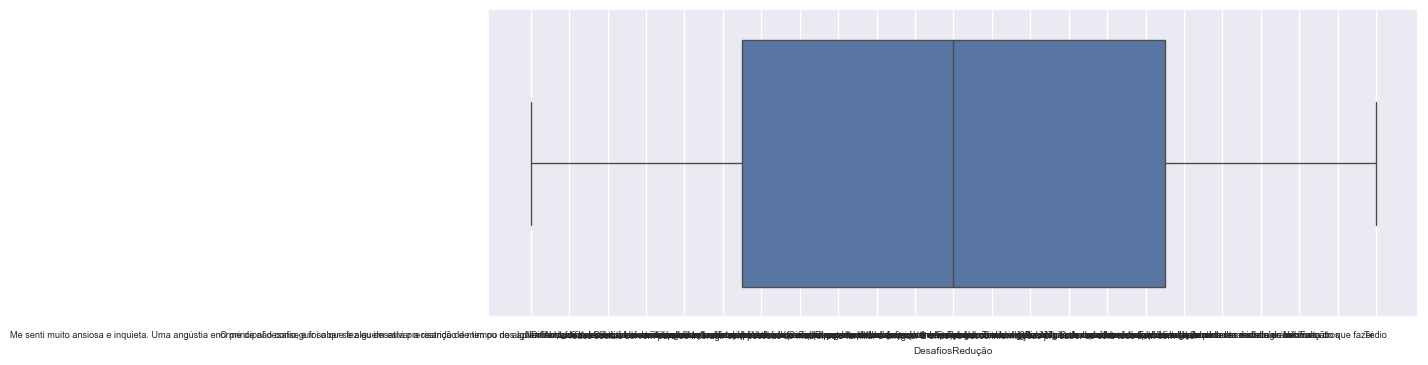

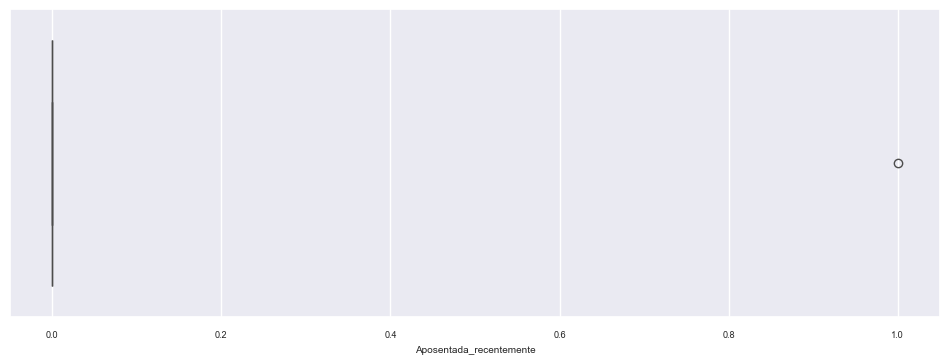

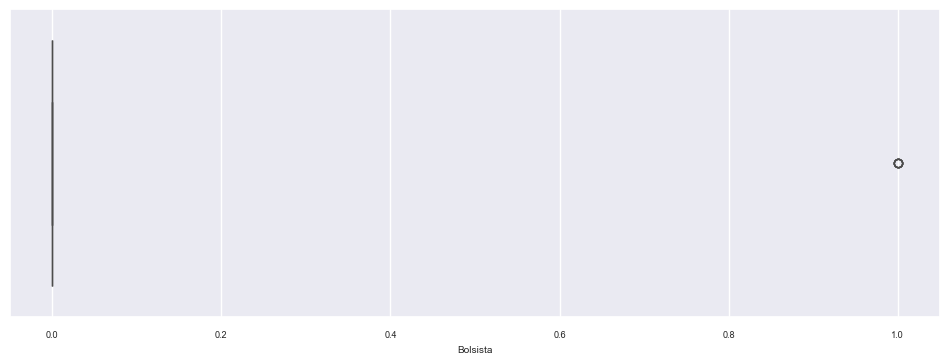

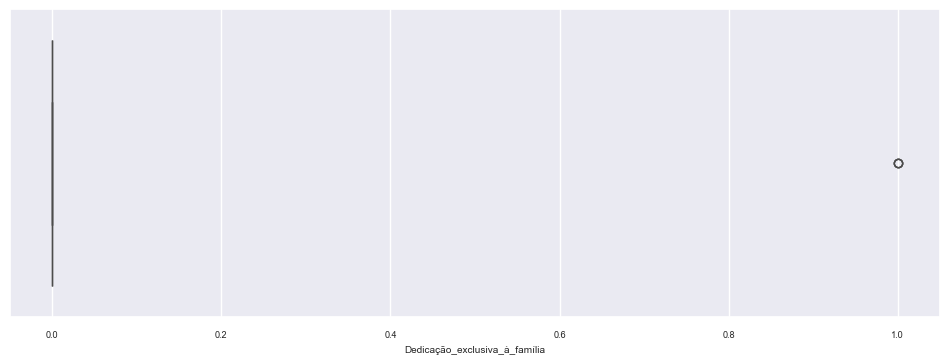

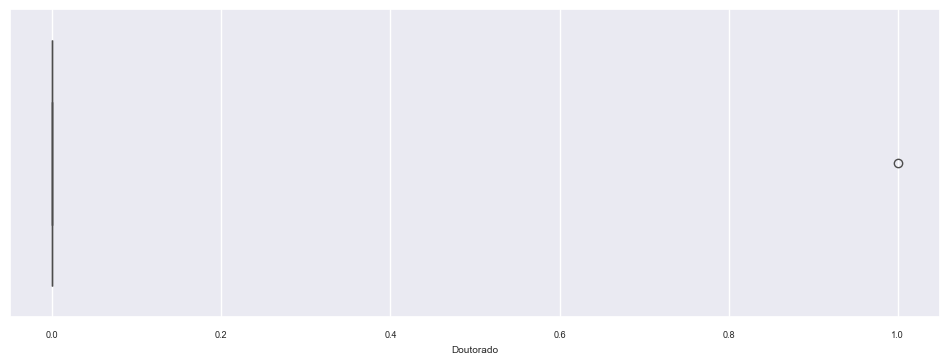

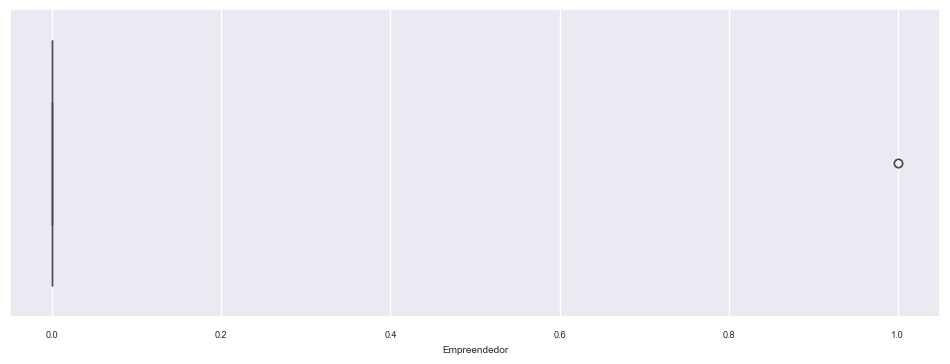

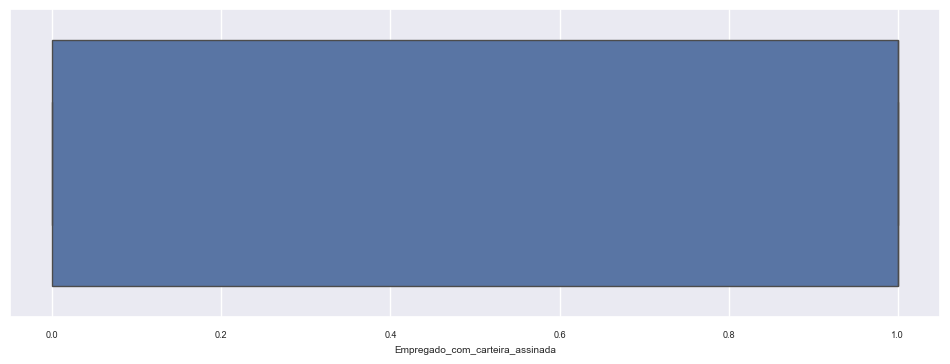

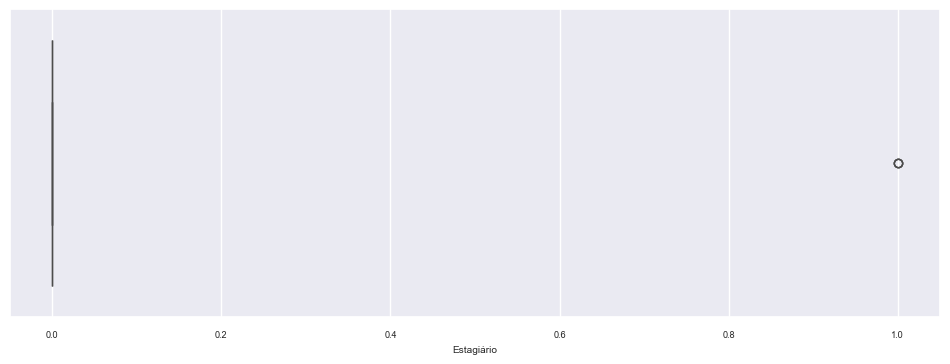

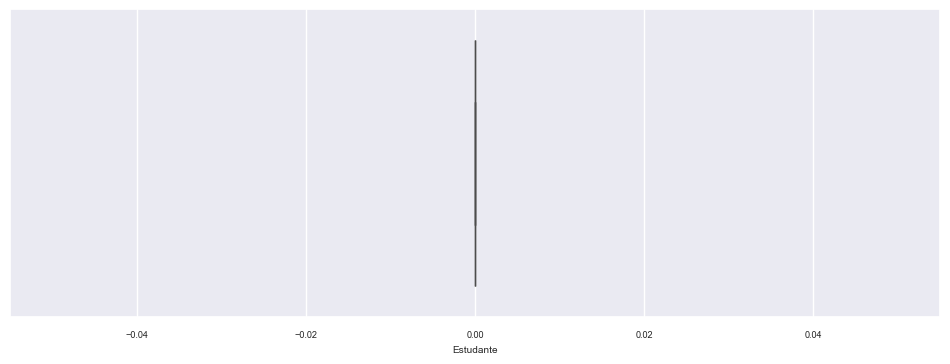

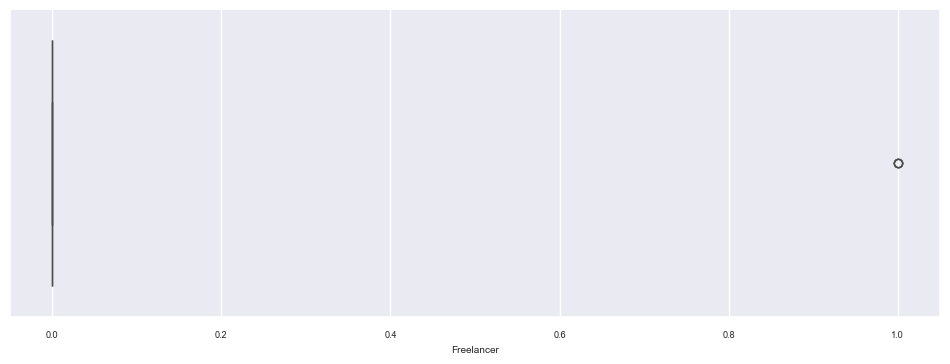

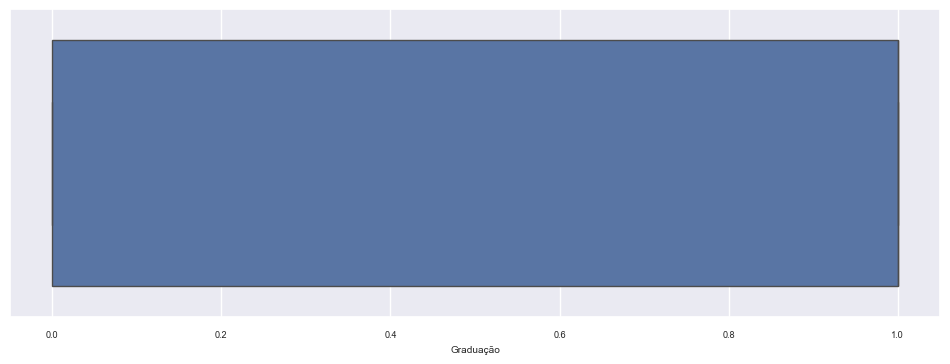

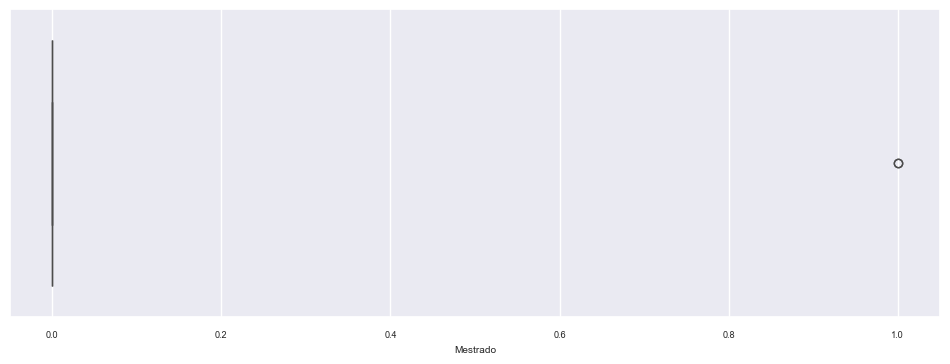

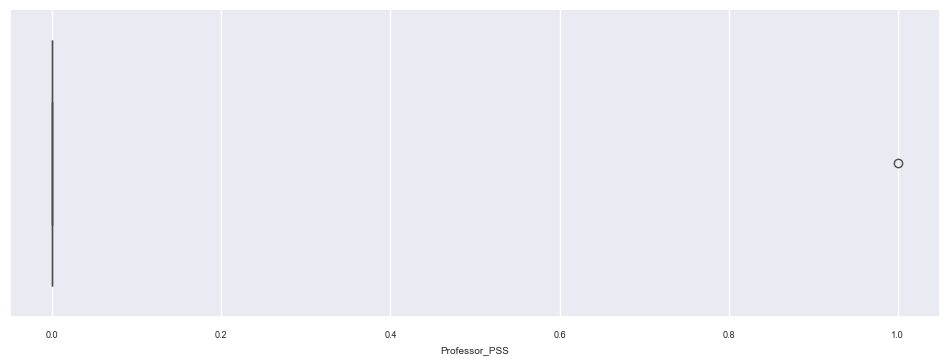

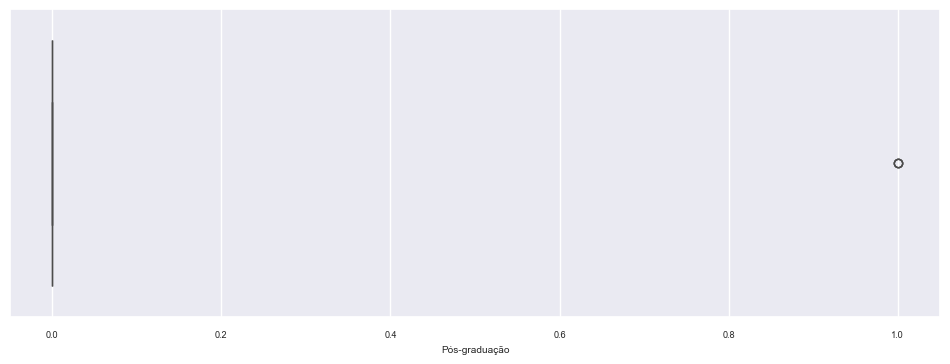

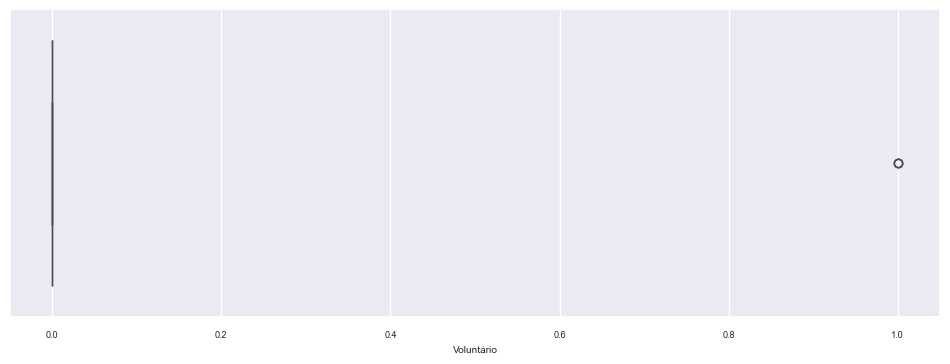

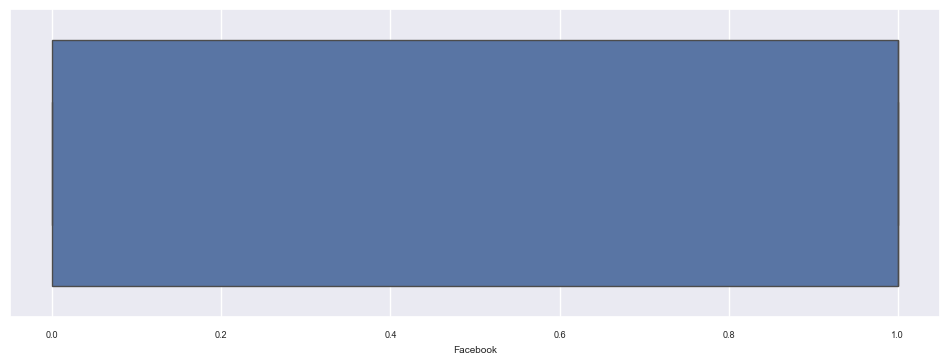

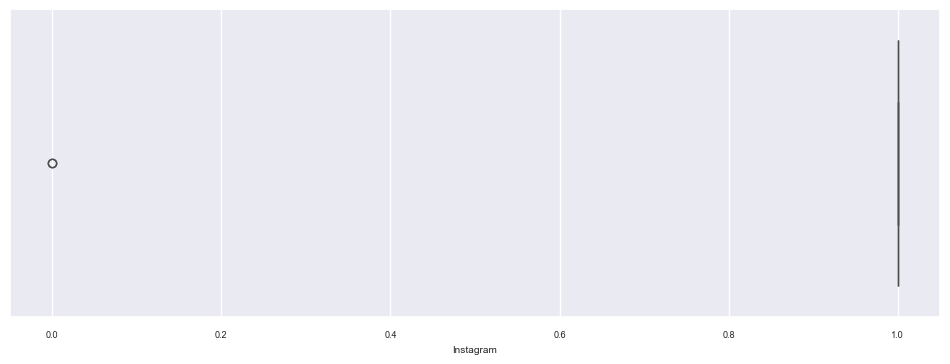

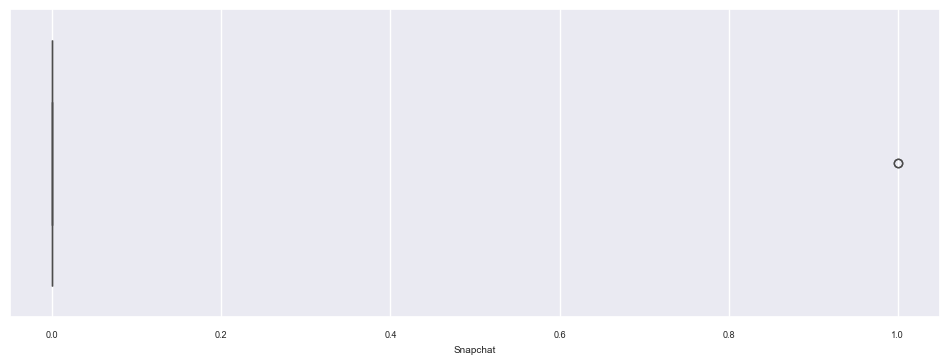

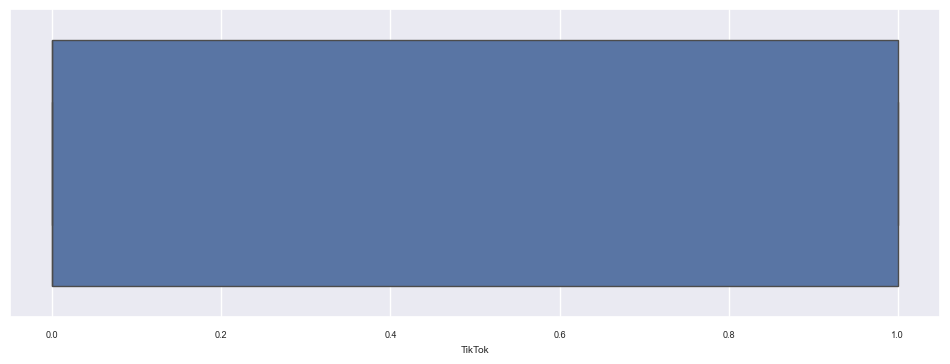

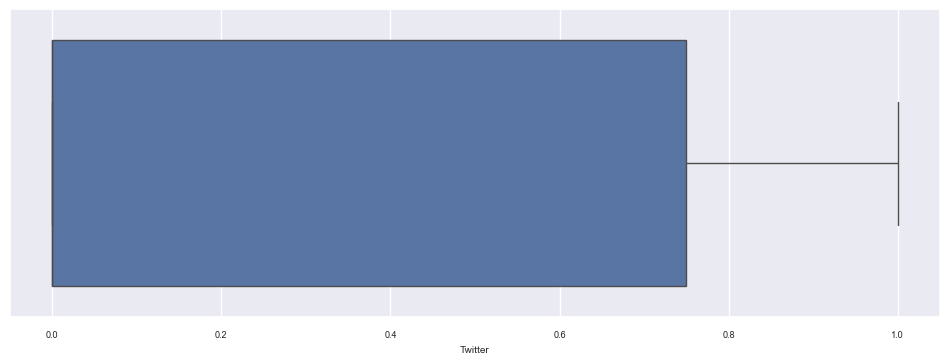

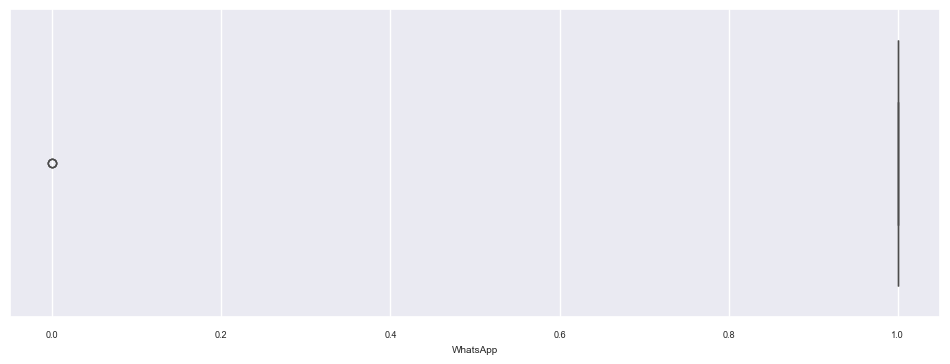

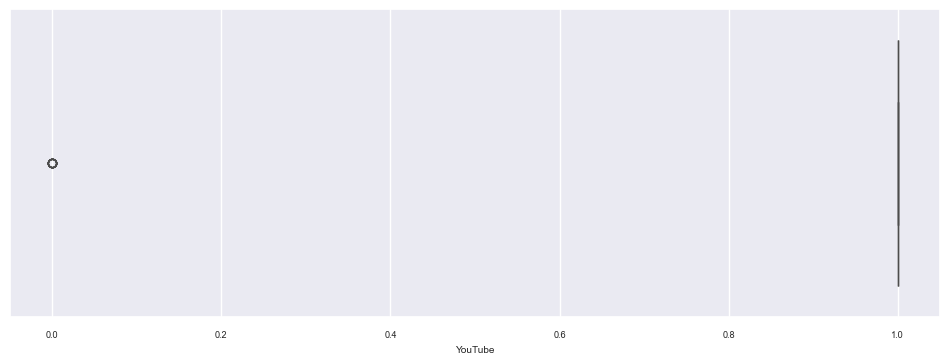

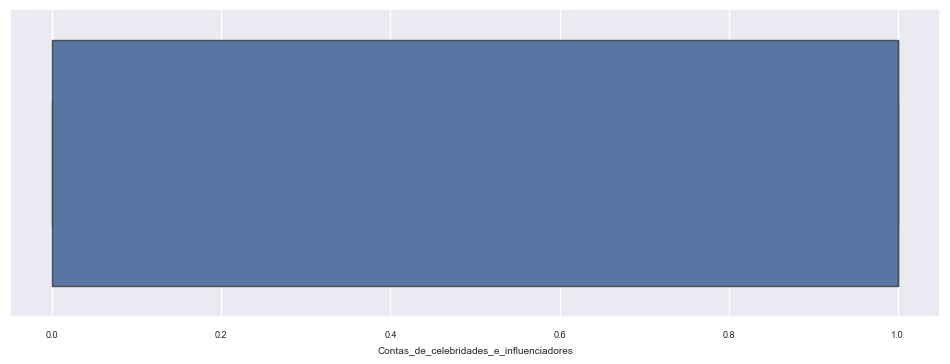

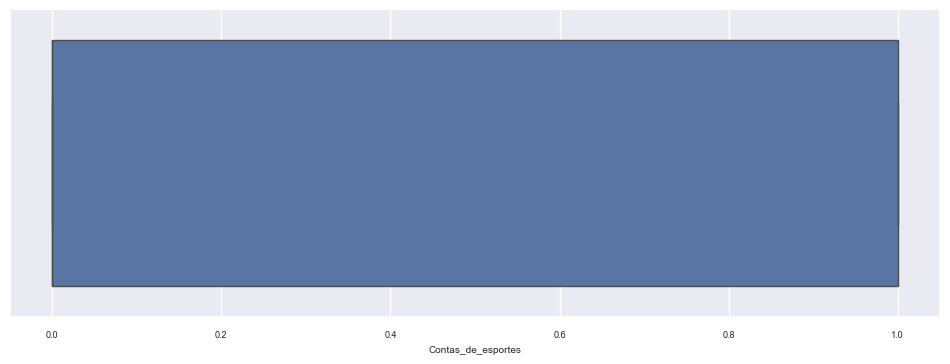

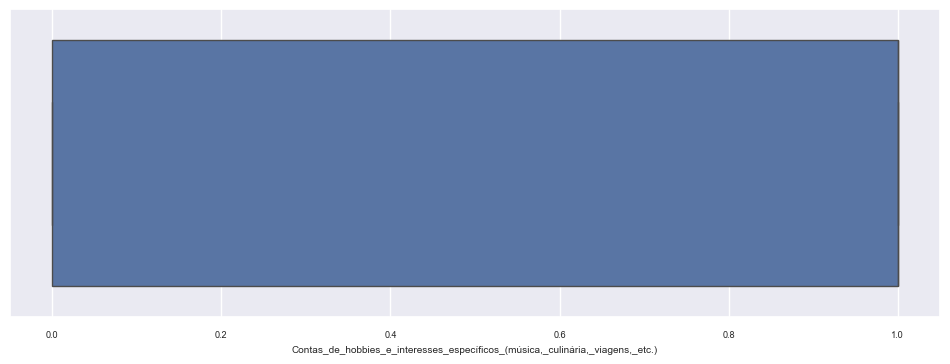

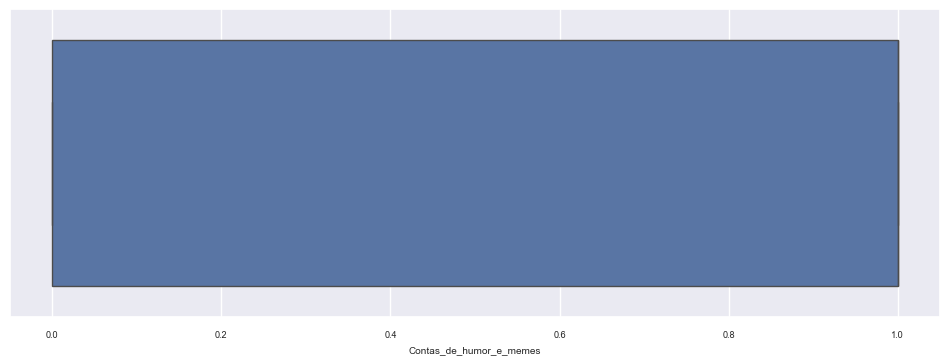

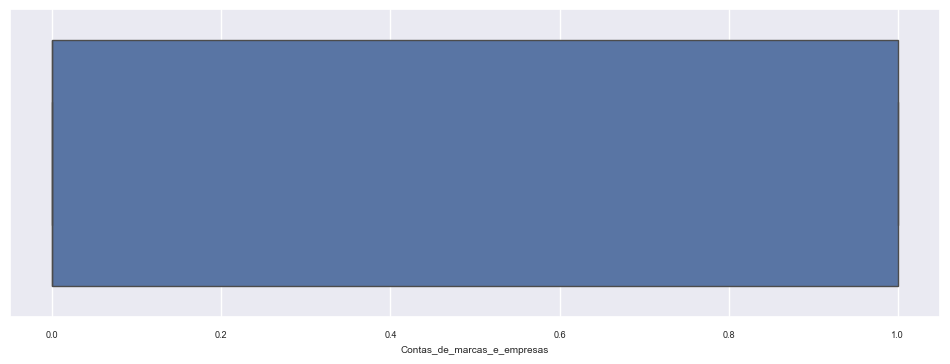

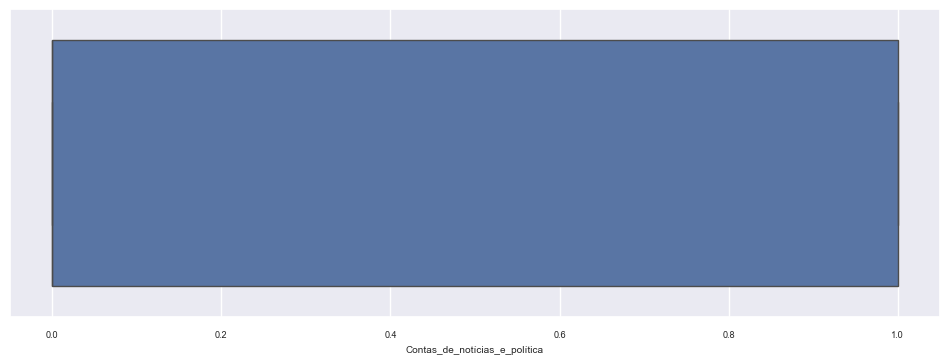

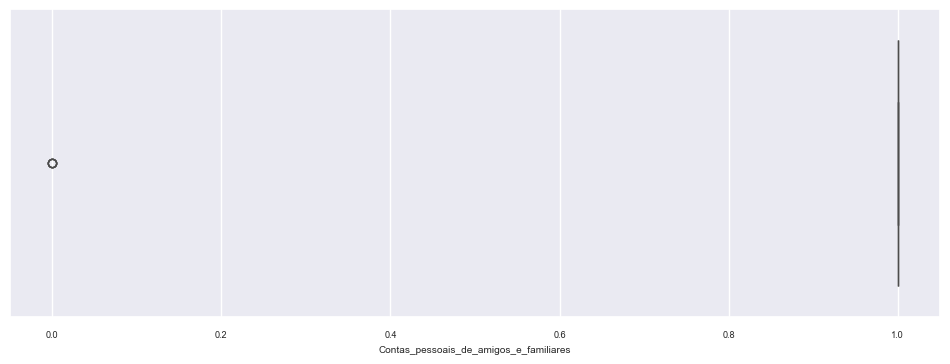

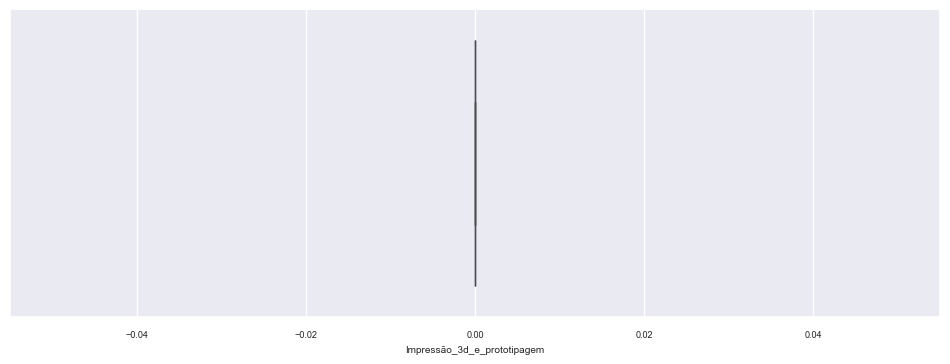

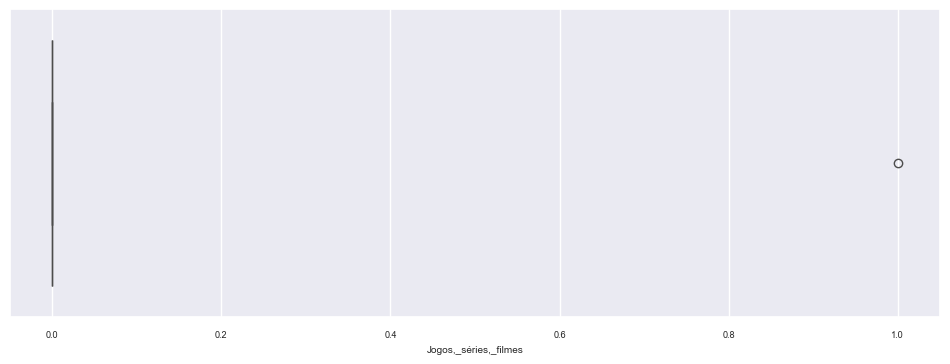

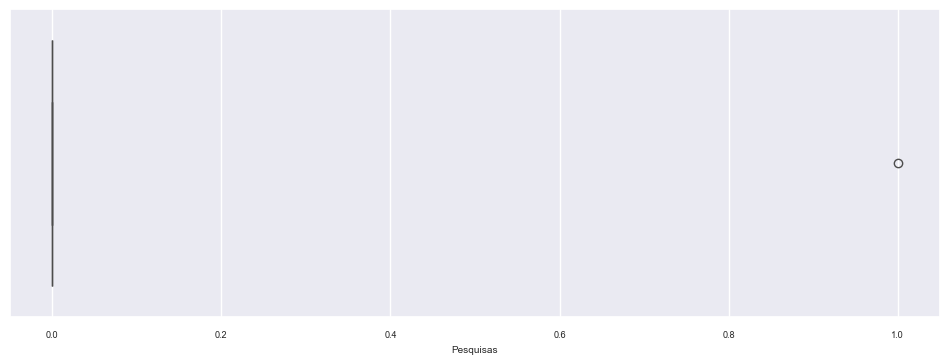

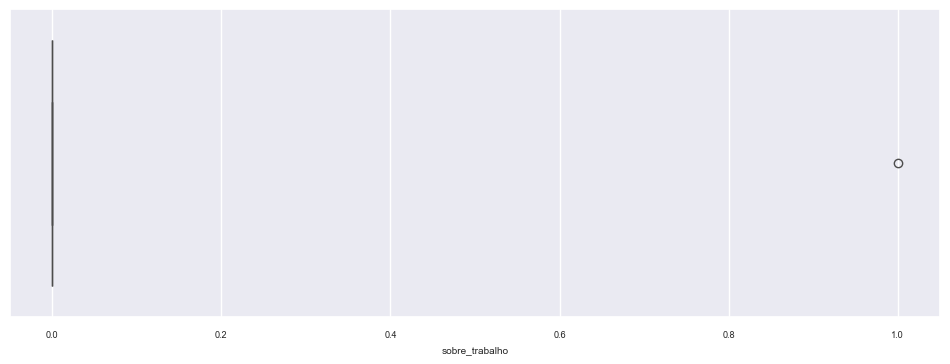

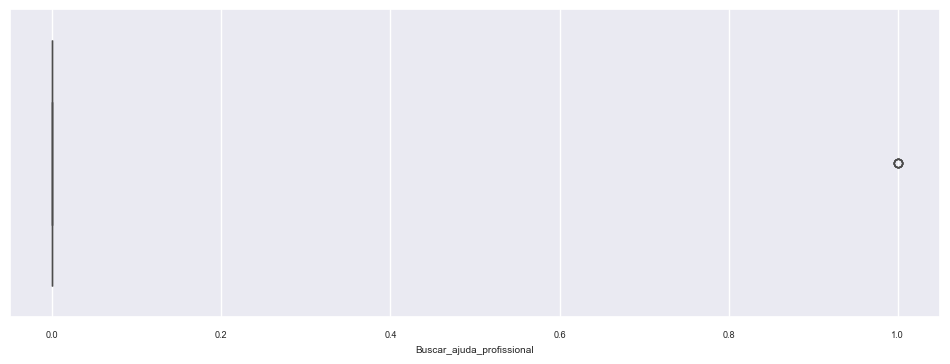

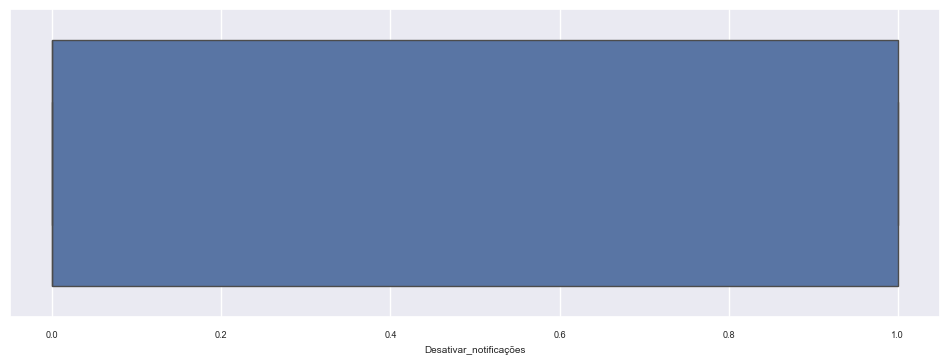

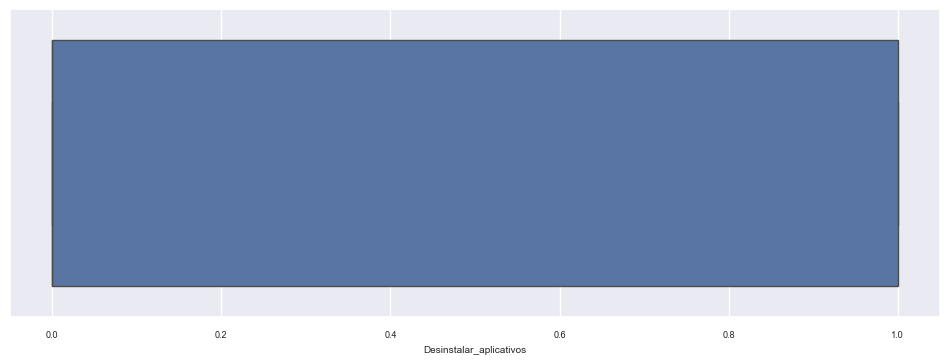

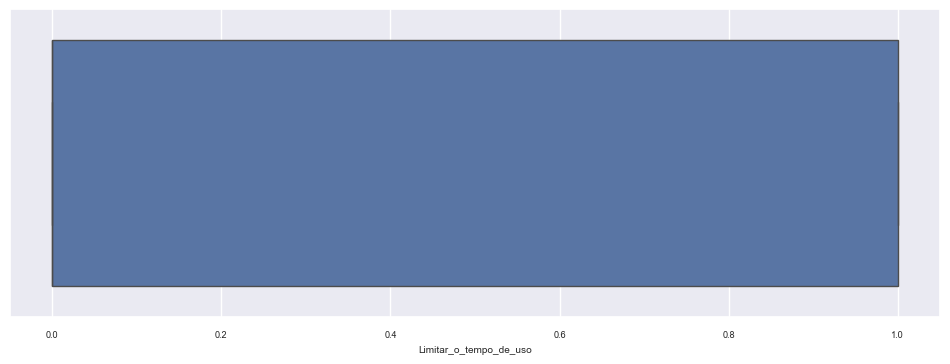

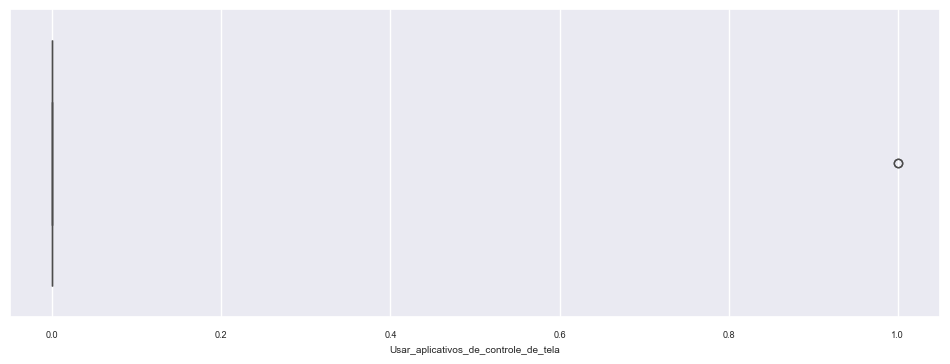

In [167]:
for coluna in dados_features_train.columns:
    plota_boxplot(dados_features_train[coluna])

## Limpeza e pré-processamento de Dados

> Tratamento de valores ausentes e outliers.

A presença de dados faltantes ou valores extremos pode distorcer significativamente as análises, comprometendo a qualidade e confiabilidade dos resultados.

> Conversão de tipos de dados.

Garantir que os tipos de dados sejam apropriados para a análise pretendida é fundamental para evitar erros e melhorar o desempenho dos modelos.

> Normalização de dados.

Diferenças significativas nas escalas de variáveis podem impactar negativamente algoritmos de aprendizado de máquina, levando a resultados distorcidos. A normalização permite padronizar as escalas, garantindo que todas as variáveis contribuam igualmente para a modelagem.

> Transformação de dados.

Essa técnica envolve a aplicação de funções matemáticas ou estatísticas aos dados existentes, resultando em novas características ou formatos. A transformação pode ser útil para normalizar distribuições, reduzir a dimensionalidade dos dados, ou mesmo para melhorar a adequação de modelos estatísticos.

> Codificação de variáveis categóricas

A representação adequada de variáveis categóricas assegura que algoritmos possam interpretar e utilizar essas características de maneira eficaz.

#### Tratamento de valores Ausentes

1. Variável target
2. Demais variáveis

> Como nossa base de dados deriva de uma pesquisa e a maioria das perguntas são obrigatorias, ou seja, um ambiente controlado, conseguimos identificar que são poucos os casos onde podem ocasionar em dados nulos

> Desse modo, é possivel indentificar que não há problemas para a nossa previsão no futuro ao excluir as linhas que possuem valores nulos`

In [168]:
dados_features_train.dropna(subset=["FrequenciaUsoRedes"], inplace=True)
dados_targets_train.dropna(inplace=True)

In [169]:
dados_targets_train.isna().sum().sort_values()

AnsiedadeRedes         0
PreocupaçãoNegativa    0
FrequenciaDepressão    0
dtype: int64

In [170]:
dados_features_train.isna().sum().sort_values()

Id                                                                                0
Idade                                                                             0
Sexo                                                                              0
UsaRedesSociais                                                                   0
TempoRedesSociais                                                                 0
FrequenciaUsoRedes                                                                0
DistraçãoRedes                                                                    0
FacilidadeDistração                                                               0
DificuldadeConcentração                                                           0
ComparaçãoSucesso                                                                 0
SentimentoComparação                                                              0
BuscaValidação                                                              

> Para as features `MotivaçãoRedução` e `SucessoRedução` e `DesafiosRedução` será imputado o valor `Não tentou reduzir` pois esses valores só poderiam ser preenchidos caso o entrevistado respondesse "Sim" para a pergunta 'Você já tentou reduzir o tempo que passa no celular?"

In [171]:
dados_features_train.loc[dados_features_train['TentativaReduçãoCelular'] == 'Não', ['MotivaçãoRedução', 'SucessoRedução', 'DesafiosRedução']] = dados_features_train.loc[dados_features_train['TentativaReduçãoCelular'] == 'Não', ['MotivaçãoRedução', 'SucessoRedução', 'DesafiosRedução']].fillna('Não se aplica')

> Para o restante dos valores nulos presentes na feature `DesafioRedução` será imputado o valor `não quis responder` pois se tratava de uma pergunta não obrigatoria.

In [172]:
dados_features_train['DesafiosRedução'].fillna('Não quis responder', inplace=True)

C:\Users\Cosmo\AppData\Local\Temp\ipykernel_5872\3879114434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_features_train['DesafiosRedução'].fillna('Não quis responder', inplace=True)


In [173]:
dados_features_train.isna().sum().sort_values()

Id                                                                               0
Idade                                                                            0
Sexo                                                                             0
UsaRedesSociais                                                                  0
TempoRedesSociais                                                                0
FrequenciaUsoRedes                                                               0
DistraçãoRedes                                                                   0
FacilidadeDistração                                                              0
DificuldadeConcentração                                                          0
ComparaçãoSucesso                                                                0
SentimentoComparação                                                             0
BuscaValidação                                                                   0
Muda

#### Tratamento de Outliers

> O outliers que foi encontrado corresponde a feature `DesafiosRedução` que possui inumeros valores categoricos diferentes, o que não permite uma visão significativa da distribuição dos dados dessa features.

> A solução encontrada para solucionar essa outlier é a criação de outras features para categorizar esses valores com base nas suas simialidades.

In [174]:
dados_features_train["DesafiosRedução"].unique()

array(['Me senti muito ansiosa e inquieta. Uma angústia enorme de não conseguir saber se alguém está precisando de mim ou de alguém ter curtido a minha foto no Instagram. A necessidade de olhar o celular o tempo todo como se eu estivesse com abstinência. ',
       'Nenhuma dificuldade ', 'Não quis responder',
       'O principal desafio, e foi o que fez eu desativar a restrição de tempo nos aplicativos, foi a necessidade de utiliza-las  quando realmente houvesse necessidade e o tempo ja tinha se esgotado.',
       'Não se aplica', 'Curiosidade e ansiedade. ',
       'Seria mais tédio em ficar sem o que fazer.',
       'Abrir as redes sociais sem nem ao menos notar que estava fazendo isso, no automático.',
       'buscar substitutos ao celular',
       'eu não tenho tanta dificuldade em reduzir o tempo no celular, as vzs ate esqueço. ',
       'Simplesmente tédio',
       'As redes sociais servem para eu interagir com pessoas do meu círculo familiar e amigos. É onde eu busco informações

In [175]:
def categorizar_desafio(valor):
    tédio = 0
    ansiedade = 0
    necessidade = 0
    adaptar_restrição_uso = 0
    falta_de_informações = 0
    nenhum = 0
    
    if "tédio" in valor.lower() or "Falta do que fazer" in valor.lower():
        tédio = 1
    elif "ansiedade" in valor.lower() or 'ansiosa' in valor.lower():
        ansiedade = 1
    elif "necessidade" in valor.lower() or "depender do celular" in valor.lower() or "interagir" in valor.lower() or "faculdade" in valor.lower():
        necessidade = 1
    elif "dificuldade de acostumar" in valor.lower() or "buscar substitutos ao celular" in valor.lower() or "cumprir tempo" in valor.lower():
        adaptar_restrição_uso = 1
    elif "falta de informação" in valor.lower() or "desconectado" in valor.lower():
        falta_de_informações = 1
    else:
        nenhum = 1
    
    return pd.Series([tédio, ansiedade, necessidade, adaptar_restrição_uso, falta_de_informações, nenhum])

# Aplicar a função a cada valor único da feature "DesafiosRedução"
df_categorizado = dados_features_train['DesafiosRedução'].apply(categorizar_desafio)
df_categorizado.columns = ['Desafios_Redução_Tedio', 'Desafios_Redução_Ansiedade', 'Desafios_Redução_Necessidade', 'Desafios_Redução_Adaptar_Restrição_Uso', 'Desafios_Redução_Falta_de_Informações', 'Desafios_Redução_Nenhum']

In [176]:
df_categorizado.head()

,Desafios_Redução_Tedio,Desafios_Redução_Ansiedade,Desafios_Redução_Necessidade,Desafios_Redução_Adaptar_Restrição_Uso,Desafios_Redução_Falta_de_Informações,Desafios_Redução_Nenhum
13,0,1,0,0,0,0
34,0,0,0,0,0,1
49,0,0,0,0,0,1
3,0,0,1,0,0,0
17,0,0,0,0,0,1


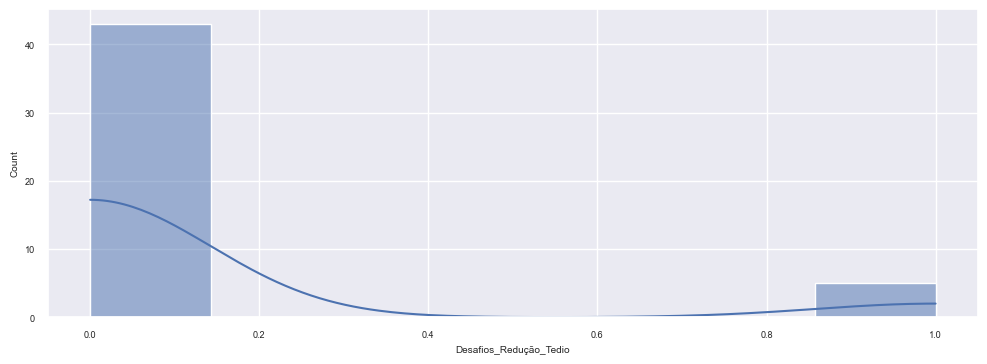

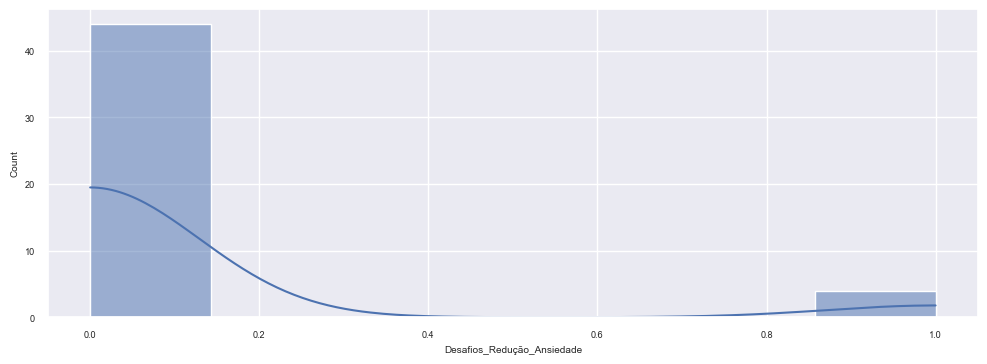

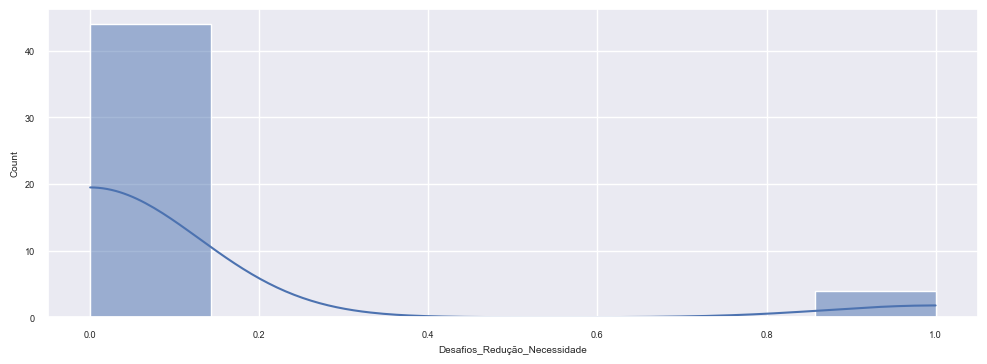

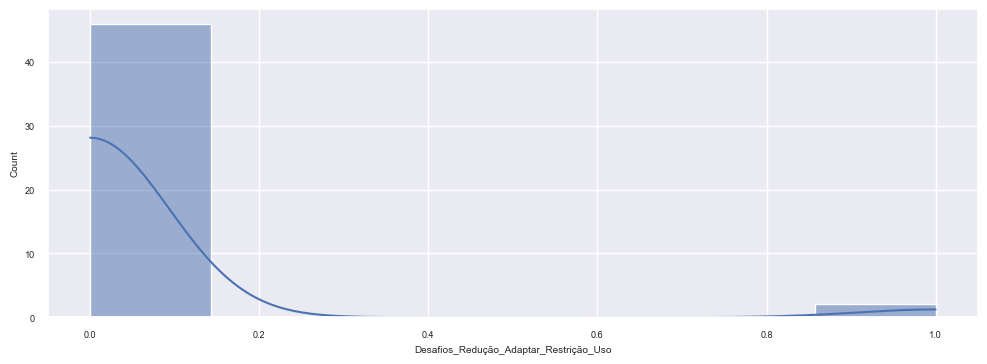

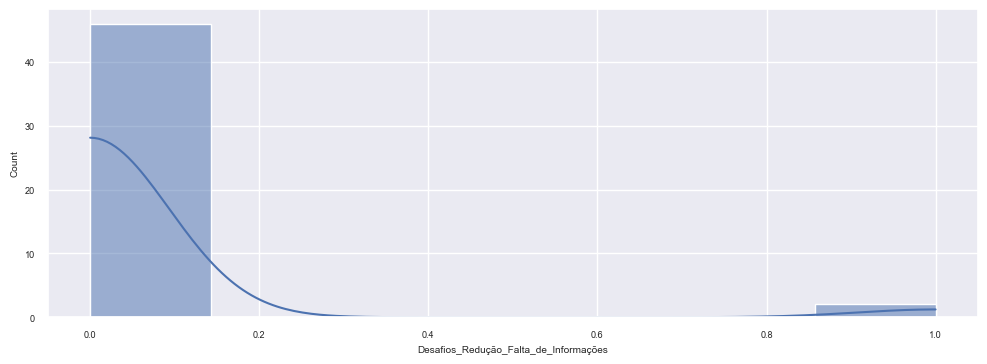

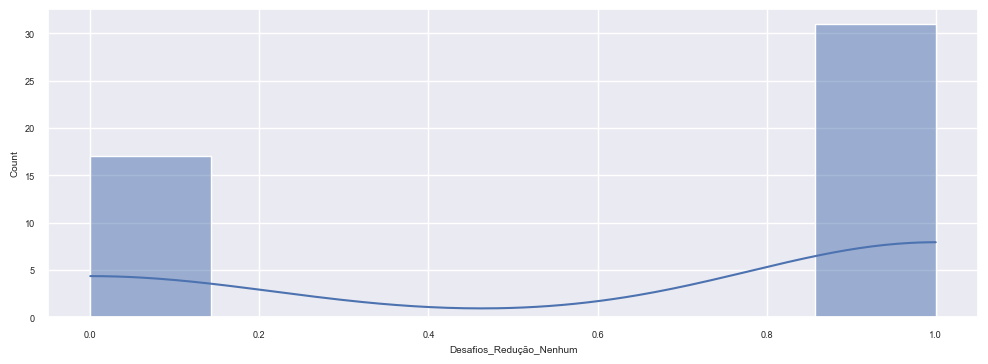

In [177]:
for coluna in df_categorizado.columns:
    plot_distribuicao(df_categorizado[coluna])

In [178]:
dados_features_train = pd.concat([dados_features_train, df_categorizado], axis=1)

dados_features_train.head()

,Id,Idade,Sexo,UsaRedesSociais,TempoRedesSociais,FrequenciaUsoRedes,DistraçãoRedes,FacilidadeDistração,DificuldadeConcentração,ComparaçãoSucesso,...,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela,Desafios_Redução_Tedio,Desafios_Redução_Ansiedade,Desafios_Redução_Necessidade,Desafios_Redução_Adaptar_Restrição_Uso,Desafios_Redução_Falta_de_Informações,Desafios_Redução_Nenhum
13,15,21.0,Feminino,Sim,4-5 horas,Frequentemente,Frequentemente,2.0,Sim,3.0,...,1,1,1,0,0,1,0,0,0,0
34,36,19.0,Masculino,Sim,Menos de 1 hora,Às vezes,Nunca,4.0,Não,1.0,...,0,0,1,0,0,0,0,0,0,1
49,51,18.0,Masculino,Sim,2-3 horas,Às vezes,Às vezes,3.0,Sim,1.0,...,0,1,1,0,0,0,0,0,0,1
3,5,23.0,Masculino,Sim,3-4 horas,Frequentemente,Frequentemente,2.0,Sim,1.0,...,1,0,1,0,0,0,1,0,0,0
17,19,25.0,Masculino,Sim,Mais de 5 horas,Sempre,Sempre,5.0,Não,5.0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
dados_features_train = dados_features_train.drop(columns='DesafiosRedução')

In [180]:
dados_features_train.columns

Index(['Id', 'Idade', 'Sexo', 'UsaRedesSociais', 'TempoRedesSociais',
       'FrequenciaUsoRedes', 'DistraçãoRedes', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'SentimentoComparação',
       'BuscaValidação', 'MudancaInteresse', 'DescriçãoMudançaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'MotivaçãoRedução',
       'SucessoRedução', 'Aposentada_recentemente', 'Bolsista',
       'Dedicação_exclusiva_à_família', 'Doutorado', 'Empreendedor',
       'Empregado_com_carteira_assinada', 'Estagiário', 'Estudante',
       'Freelancer', 'Graduação', 'Mestrado', 'Professor_PSS', 'Pós-graduação',
       'Voluntário', 'Facebook', 'Instagram', 'Snapchat', 'TikTok', 'Twitter',
       'WhatsApp', 'YouTube', 'Contas_de_celebridades_e_influenciadores',
       'Contas_de_esportes',
       'Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_etc.)',
       'Contas_de_humor_e_memes', 'Contas_de_marcas_e_empresas',
       'Contas_de_n

#### Conversão de tipos de dados.

A Pandas automaticamente atribuiu os tipos de dados no momento de carregar. Entretanto, podemos economizar memória e otimizar resultados de alguns modelos se ajustarmos os tipos de dados às reais necessidades do dataset.



In [181]:
dados_targets_train.head()

,AnsiedadeRedes,PreocupaçãoNegativa,FrequenciaDepressão
13,Sempre,4.0,Às vezes
34,Nunca,2.0,Às vezes
49,Raramente,2.0,Às vezes
3,Nunca,3.0,Raramente
17,Nunca,5.0,Sempre


In [182]:
dados_features_train.head(3)

,Id,Idade,Sexo,UsaRedesSociais,TempoRedesSociais,FrequenciaUsoRedes,DistraçãoRedes,FacilidadeDistração,DificuldadeConcentração,ComparaçãoSucesso,...,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela,Desafios_Redução_Tedio,Desafios_Redução_Ansiedade,Desafios_Redução_Necessidade,Desafios_Redução_Adaptar_Restrição_Uso,Desafios_Redução_Falta_de_Informações,Desafios_Redução_Nenhum
13,15,21.0,Feminino,Sim,4-5 horas,Frequentemente,Frequentemente,2.0,Sim,3.0,...,1,1,1,0,0,1,0,0,0,0
34,36,19.0,Masculino,Sim,Menos de 1 hora,Às vezes,Nunca,4.0,Não,1.0,...,0,0,1,0,0,0,0,0,0,1
49,51,18.0,Masculino,Sim,2-3 horas,Às vezes,Às vezes,3.0,Sim,1.0,...,0,1,1,0,0,0,0,0,0,1


In [183]:
dados_features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 61 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Id                                                                             48 non-null     int64  
 1   Idade                                                                          48 non-null     float64
 2   Sexo                                                                           48 non-null     object 
 3   UsaRedesSociais                                                                48 non-null     object 
 4   TempoRedesSociais                                                              48 non-null     object 
 5   FrequenciaUsoRedes                                                             48 non-null     object 
 6   DistraçãoRedes                  

In [184]:
dados_targets_train.PreocupaçãoNegativa = dados_targets_train.PreocupaçãoNegativa.astype(int)

In [185]:
dados_targets_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AnsiedadeRedes       48 non-null     object
 1   PreocupaçãoNegativa  48 non-null     int64 
 2   FrequenciaDepressão  48 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [186]:
dados_features_train.Idade = dados_features_train.Idade.astype(int)
dados_features_train.FacilidadeDistração = dados_features_train.FacilidadeDistração.astype(int)
dados_features_train.MudancaInteresse = dados_features_train.MudancaInteresse.astype(int)
dados_features_train.ComparaçãoSucesso = dados_features_train.ComparaçãoSucesso.astype(int)
dados_features_train.ProblemasSono = dados_features_train.ProblemasSono.astype(int)


In [187]:
dados_features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 61 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Id                                                                             48 non-null     int64 
 1   Idade                                                                          48 non-null     int64 
 2   Sexo                                                                           48 non-null     object
 3   UsaRedesSociais                                                                48 non-null     object
 4   TempoRedesSociais                                                              48 non-null     object
 5   FrequenciaUsoRedes                                                             48 non-null     object
 6   DistraçãoRedes                          

In [188]:
dados_targets_train.AnsiedadeRedes = dados_targets_train.AnsiedadeRedes.astype('category')
dados_targets_train.FrequenciaDepressão = dados_targets_train.FrequenciaDepressão.astype('category')


dados_features_train.UsaRedesSociais = dados_features_train.UsaRedesSociais.astype('category')
dados_features_train.TempoRedesSociais = dados_features_train.TempoRedesSociais.astype('category')
dados_features_train.FrequenciaUsoRedes = dados_features_train.FrequenciaUsoRedes.astype('category')
dados_features_train.DistraçãoRedes = dados_features_train.DistraçãoRedes.astype('category')
dados_features_train.DificuldadeConcentração = dados_features_train.DificuldadeConcentração.astype('category')
dados_features_train.SentimentoComparação = dados_features_train.SentimentoComparação.astype('category')
dados_features_train.DescriçãoMudançaInteresse = dados_features_train.DescriçãoMudançaInteresse.astype('category')
dados_features_train.TentativaReduçãoCelular = dados_features_train.TentativaReduçãoCelular.astype('category')
dados_features_train.MotivaçãoRedução = dados_features_train.MotivaçãoRedução.astype('category')
dados_features_train.SucessoRedução = dados_features_train.SucessoRedução.astype('category')
dados_features_train.Sexo = dados_features_train.Sexo.astype('category')
dados_features_train.BuscaValidação = dados_features_train.BuscaValidação.astype('category')



#### Tratamento de variáveis categóricas

In [189]:
dados_targets_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AnsiedadeRedes       48 non-null     category
 1   PreocupaçãoNegativa  48 non-null     int64   
 2   FrequenciaDepressão  48 non-null     category
dtypes: category(2), int64(1)
memory usage: 1.3 KB


In [190]:
dados_features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 61 columns):
 #   Column                                                                         Non-Null Count  Dtype   
---  ------                                                                         --------------  -----   
 0   Id                                                                             48 non-null     int64   
 1   Idade                                                                          48 non-null     int64   
 2   Sexo                                                                           48 non-null     category
 3   UsaRedesSociais                                                                48 non-null     category
 4   TempoRedesSociais                                                              48 non-null     category
 5   FrequenciaUsoRedes                                                             48 non-null     category
 6   DistraçãoRedes          

In [191]:
for coluna in dados_targets_train.select_dtypes('category').columns:
    print(coluna)
    print(dados_targets_train[coluna].unique())
    print("===================")

AnsiedadeRedes
['Sempre', 'Nunca', 'Raramente', 'Frequentemente', 'Às vezes']
Categories (5, object): ['Frequentemente', 'Nunca', 'Raramente', 'Sempre', 'Às vezes']
FrequenciaDepressão
['Às vezes', 'Raramente', 'Sempre', 'Frequentemente', 'Nunca']
Categories (5, object): ['Frequentemente', 'Nunca', 'Raramente', 'Sempre', 'Às vezes']


In [192]:
dic_targets= {
    'Nunca': 0,
    'Raramente': 1,
    'Às vezes': 2,
    'Frequentemente':3,
    'Sempre': 4
}

dados_targets_train['AnsiedadeRedes'] = dados_targets_train['AnsiedadeRedes'].map(dic_targets).astype(int)
dados_targets_train['FrequenciaDepressão'] = dados_targets_train['FrequenciaDepressão'].map(dic_targets).astype(int)


In [193]:
dados_targets_train.head()

,AnsiedadeRedes,PreocupaçãoNegativa,FrequenciaDepressão
13,4,4,2
34,0,2,2
49,1,2,2
3,0,3,1
17,0,5,4


In [194]:
for coluna in dados_features_train.select_dtypes('category').columns:
    print(coluna)
    print(dados_features_train[coluna].unique())
    print("===================")

Sexo
['Feminino', 'Masculino']
Categories (2, object): ['Feminino', 'Masculino']
UsaRedesSociais
['Sim']
Categories (1, object): ['Sim']
TempoRedesSociais
['4-5 horas', 'Menos de 1 hora', '2-3 horas', '3-4 horas', 'Mais de 5 horas', '1-2 horas']
Categories (6, object): ['1-2 horas', '2-3 horas', '3-4 horas', '4-5 horas', 'Mais de 5 horas', 'Menos de 1 hora']
FrequenciaUsoRedes
['Frequentemente', 'Às vezes', 'Sempre', 'Raramente']
Categories (4, object): ['Frequentemente', 'Raramente', 'Sempre', 'Às vezes']
DistraçãoRedes
['Frequentemente', 'Nunca', 'Às vezes', 'Sempre', 'Raramente']
Categories (5, object): ['Frequentemente', 'Nunca', 'Raramente', 'Sempre', 'Às vezes']
DificuldadeConcentração
['Sim', 'Não']
Categories (2, object): ['Não', 'Sim']
SentimentoComparação
['Inseguro', 'Inspirado', 'Indiferente', 'Desanimado', 'Motivado']
Categories (5, object): ['Desanimado', 'Indiferente', 'Inseguro', 'Inspirado', 'Motivado']
BuscaValidação
['Frequentemente', 'Às vezes', 'Raramente', 'Nunca'

In [195]:
dic_on_off = {
    'Não': 0,
    "Sim": 1}

dados_features_train['DificuldadeConcentração'] = dados_features_train['DificuldadeConcentração'].map(dic_on_off).astype(int)
dados_features_train['TentativaReduçãoCelular'] = dados_features_train['TentativaReduçãoCelular'].map(dic_on_off).astype(int)
dados_features_train['UsaRedesSociais'] = dados_features_train['UsaRedesSociais'].map(dic_on_off).astype(int)



In [196]:
dic_masculino_feminino = {
    'Masculino': 0,
    'Feminino': 1
}
dados_features_train['Sexo'] = dados_features_train['Sexo'].map(dic_masculino_feminino).astype(int)

In [197]:
dados_features_train.head(3)

,Id,Idade,Sexo,UsaRedesSociais,TempoRedesSociais,FrequenciaUsoRedes,DistraçãoRedes,FacilidadeDistração,DificuldadeConcentração,ComparaçãoSucesso,...,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela,Desafios_Redução_Tedio,Desafios_Redução_Ansiedade,Desafios_Redução_Necessidade,Desafios_Redução_Adaptar_Restrição_Uso,Desafios_Redução_Falta_de_Informações,Desafios_Redução_Nenhum
13,15,21,1,1,4-5 horas,Frequentemente,Frequentemente,2,1,3,...,1,1,1,0,0,1,0,0,0,0
34,36,19,0,1,Menos de 1 hora,Às vezes,Nunca,4,0,1,...,0,0,1,0,0,0,0,0,0,1
49,51,18,0,1,2-3 horas,Às vezes,Às vezes,3,1,1,...,0,1,1,0,0,0,0,0,0,1


In [198]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder



df = pd.DataFrame(dados_features_train)
df = pd.concat([df, dados_targets_train], axis=1)

df.set_index(dados_features_train.index)

# Inicializar o codificador alvo agrupado
te = TargetEncoder(cols=['TempoRedesSociais','FrequenciaUsoRedes', 'DistraçãoRedes', 'SentimentoComparação', 'BuscaValidação', 'DescriçãoMudançaInteresse', 'MotivaçãoRedução','SucessoRedução' ])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

df_encoded = pd.DataFrame(index=df.index)  # Inicializar DataFrame com os mesmos índices

# Iterar sobre as variáveis target
for target_col in ['AnsiedadeRedes', 'PreocupaçãoNegativa', 'FrequenciaDepressão']:
    for train_index, test_index in kf.split(df):
        X_train, X_test = df[['TempoRedesSociais','FrequenciaUsoRedes', 'DistraçãoRedes', 'SentimentoComparação', 'BuscaValidação', 'DescriçãoMudançaInteresse', 'MotivaçãoRedução','SucessoRedução' ]].iloc[train_index], \
        df[['TempoRedesSociais','FrequenciaUsoRedes', 'DistraçãoRedes', 'SentimentoComparação', 'BuscaValidação', 'DescriçãoMudançaInteresse', 'MotivaçãoRedução','SucessoRedução' ]].iloc[test_index]
        y_train, y_test = df[target_col].iloc[train_index], df[target_col].iloc[test_index]

        te.fit(X_train, y_train)
        X_test_encoded = te.transform(X_test)

        # Preencher os dados codificados diretamente nos índices corretos
        df_encoded.loc[X_test_encoded.index, X_test_encoded.columns] = X_test_encoded

# Juntar os DataFrames codificados com o DataFrame original por índice
df =  df_encoded.add_suffix('_encoded')


print(df)

    TempoRedesSociais_encoded  FrequenciaUsoRedes_encoded  \
13                   2.321248                    2.137502   
34                   2.460961                    2.089562   
49                   2.205245                    2.089562   
3                    2.392239                    2.379607   
17                   2.096300                    2.064545   
48                   2.104687                    2.137502   
8                    2.392239                    2.379607   
6                    2.164551                    2.067349   
33                   2.425637                    2.379607   
4                    2.436523                    2.379607   
46                   2.298126                    2.184617   
19                   2.104687                    2.137502   
53                   2.157814                    2.137498   
41                   2.297594                    2.342105   
54                   2.119558                    2.067349   
31                   2.3

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TempoRedesSociais_encoded          48 non-null     float64
 1   FrequenciaUsoRedes_encoded         48 non-null     float64
 2   DistraçãoRedes_encoded             48 non-null     float64
 3   SentimentoComparação_encoded       48 non-null     float64
 4   BuscaValidação_encoded             48 non-null     float64
 5   DescriçãoMudançaInteresse_encoded  48 non-null     float64
 6   MotivaçãoRedução_encoded           48 non-null     float64
 7   SucessoRedução_encoded             48 non-null     float64
dtypes: float64(8)
memory usage: 4.4 KB


In [200]:
dados_features_train = dados_features_train.join(df)

dados_features_train = dados_features_train.drop(['TempoRedesSociais','FrequenciaUsoRedes', 'DistraçãoRedes', \
                                                  'SentimentoComparação', 'BuscaValidação', 'DescriçãoMudançaInteresse', 'MotivaçãoRedução','SucessoRedução'], axis=1)

dados_features_train.head()


,Id,Idade,Sexo,UsaRedesSociais,FacilidadeDistração,DificuldadeConcentração,ComparaçãoSucesso,MudancaInteresse,ProblemasSono,TentativaReduçãoCelular,...,Desafios_Redução_Falta_de_Informações,Desafios_Redução_Nenhum,TempoRedesSociais_encoded,FrequenciaUsoRedes_encoded,DistraçãoRedes_encoded,SentimentoComparação_encoded,BuscaValidação_encoded,DescriçãoMudançaInteresse_encoded,MotivaçãoRedução_encoded,SucessoRedução_encoded
13,15,21,1,1,2,1,3,4,2,1,...,0,0,2.321248,2.137502,2.296109,2.288628,2.207245,2.235695,2.297734,2.236544
34,36,19,0,1,4,0,1,2,2,1,...,0,1,2.460961,2.089562,1.940527,2.195600,2.164065,2.213405,2.350958,2.339885
49,51,18,0,1,3,1,1,3,2,1,...,0,1,2.205245,2.089562,2.141812,2.061129,2.052101,2.332826,2.098377,2.143644
3,5,23,0,1,2,1,1,2,1,1,...,0,0,2.392239,2.379607,2.473985,2.373339,2.468563,2.414302,2.256668,2.276993
17,19,25,0,1,5,0,5,5,3,0,...,0,1,2.096300,2.064545,2.096300,1.872186,2.114729,2.025663,2.025663,2.025663


In [201]:
dados_features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 61 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Id                                                                             48 non-null     int64  
 1   Idade                                                                          48 non-null     int64  
 2   Sexo                                                                           48 non-null     int64  
 3   UsaRedesSociais                                                                48 non-null     int64  
 4   FacilidadeDistração                                                            48 non-null     int64  
 5   DificuldadeConcentração                                                        48 non-null     int64  
 6   ComparaçãoSucesso               

In [202]:
dados_features_train.columns

Index(['Id', 'Idade', 'Sexo', 'UsaRedesSociais', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'MudancaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'Aposentada_recentemente',
       'Bolsista', 'Dedicação_exclusiva_à_família', 'Doutorado',
       'Empreendedor', 'Empregado_com_carteira_assinada', 'Estagiário',
       'Estudante', 'Freelancer', 'Graduação', 'Mestrado', 'Professor_PSS',
       'Pós-graduação', 'Voluntário', 'Facebook', 'Instagram', 'Snapchat',
       'TikTok', 'Twitter', 'WhatsApp', 'YouTube',
       'Contas_de_celebridades_e_influenciadores', 'Contas_de_esportes',
       'Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_etc.)',
       'Contas_de_humor_e_memes', 'Contas_de_marcas_e_empresas',
       'Contas_de_notícias_e_política',
       'Contas_pessoais_de_amigos_e_familiares', 'Impressão_3d_e_prototipagem',
       'Jogos,_séries,_filmes', 'Pesquisas', 'sobre_trabalho',
       'Buscar_ajuda_profis

## Feature Engineering

Impacto no Sono = Multiplicar as features `ProblemasSono` e `TempoRedesSociais_encoded`

Nível De Distração = Media entre as features `FacilidadeDistração`, `DificuldadeConcentração`, `DistraçãoRedes_encoded`

Uso Médio de Redes Sociais = Cálculo do tempo médio gasto em redes sociais utilizando as features `TempoRedesSociais_encoded` e `FrequenciaUsoRedes_encoded`

In [203]:
dados_features_train['ImpactoNoSono'] = dados_features_train['ProblemasSono'] * dados_features_train['TempoRedesSociais_encoded']


dados_features_train['NivelDeDistracao'] = dados_features_train[['FacilidadeDistração', 'DificuldadeConcentração', 'DistraçãoRedes_encoded']].mean(axis=1)


dados_features_train['UsoMedioRedesSociais'] = (dados_features_train['TempoRedesSociais_encoded'] + dados_features_train['FrequenciaUsoRedes_encoded']) / 2


In [204]:
dados_features_train.info(2)

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 64 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Id                                                                             48 non-null     int64  
 1   Idade                                                                          48 non-null     int64  
 2   Sexo                                                                           48 non-null     int64  
 3   UsaRedesSociais                                                                48 non-null     int64  
 4   FacilidadeDistração                                                            48 non-null     int64  
 5   DificuldadeConcentração                                                        48 non-null     int64  
 6   ComparaçãoSucesso               

## Analise Bivariada

### Variável X variével

In [205]:
dados_completos = pd.concat([dados_features_train, dados_targets_train], axis=1)

In [206]:
dados_completos.corr()

,Id,Idade,Sexo,UsaRedesSociais,FacilidadeDistração,DificuldadeConcentração,ComparaçãoSucesso,MudancaInteresse,ProblemasSono,TentativaReduçãoCelular,...,BuscaValidação_encoded,DescriçãoMudançaInteresse_encoded,MotivaçãoRedução_encoded,SucessoRedução_encoded,ImpactoNoSono,NivelDeDistracao,UsoMedioRedesSociais,AnsiedadeRedes,PreocupaçãoNegativa,FrequenciaDepressão
Id,1.000000,-0.158626,-0.100634,NaN,-0.036565,-0.044861,-0.140669,-0.205890,0.295250,-0.009939,...,0.156265,0.119866,-0.175463,-0.071348,0.263368,-0.052754,-0.240084,-0.043234,0.151770,0.211547
Idade,-0.158626,1.000000,0.064496,NaN,0.175950,-0.157464,-0.116878,-0.228388,-0.104668,-0.084546,...,-0.090051,0.056694,0.246428,0.115610,-0.092540,0.128914,0.187077,-0.085179,-0.268775,-0.329955
Sexo,-0.100634,0.064496,1.000000,NaN,0.051009,-0.068783,-0.003986,0.041319,-0.020871,0.075903,...,0.114950,-0.012322,0.116008,0.272484,0.005514,0.054916,0.241956,0.121586,0.087658,-0.056625
UsaRedesSociais,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FacilidadeDistração,-0.036565,0.175950,0.051009,NaN,1.000000,-0.207958,0.032516,-0.137585,-0.060878,-0.104537,...,-0.191291,-0.429728,-0.159962,-0.229104,-0.101401,0.910989,-0.147022,0.027983,-0.116598,-0.138702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NivelDeDistracao,-0.052754,0.128914,0.054916,NaN,0.910989,0.201012,0.118765,-0.138332,-0.094050,-0.007285,...,-0.115645,-0.360662,-0.121438,-0.252745,-0.137613,1.000000,-0.145038,0.133949,-0.081934,0.020426
UsoMedioRedesSociais,-0.240084,0.187077,0.241956,NaN,-0.147022,-0.124088,-0.175114,-0.175922,-0.160724,0.120258,...,0.285684,0.579756,0.374027,0.672713,-0.029030,-0.145038,1.000000,0.092119,-0.124883,-0.288836
AnsiedadeRedes,-0.043234,-0.085179,0.121586,NaN,0.027983,0.247365,0.363239,-0.152150,-0.042999,0.060146,...,-0.000005,-0.206106,0.212906,-0.015391,-0.021298,0.133949,0.092119,1.000000,0.254688,0.265141
PreocupaçãoNegativa,0.151770,-0.268775,0.087658,NaN,-0.116598,0.079309,0.437113,0.364958,0.413831,-0.111209,...,0.285471,-0.129288,-0.061074,-0.077972,0.421909,-0.081934,-0.124883,0.254688,1.000000,0.594281


<Axes: >

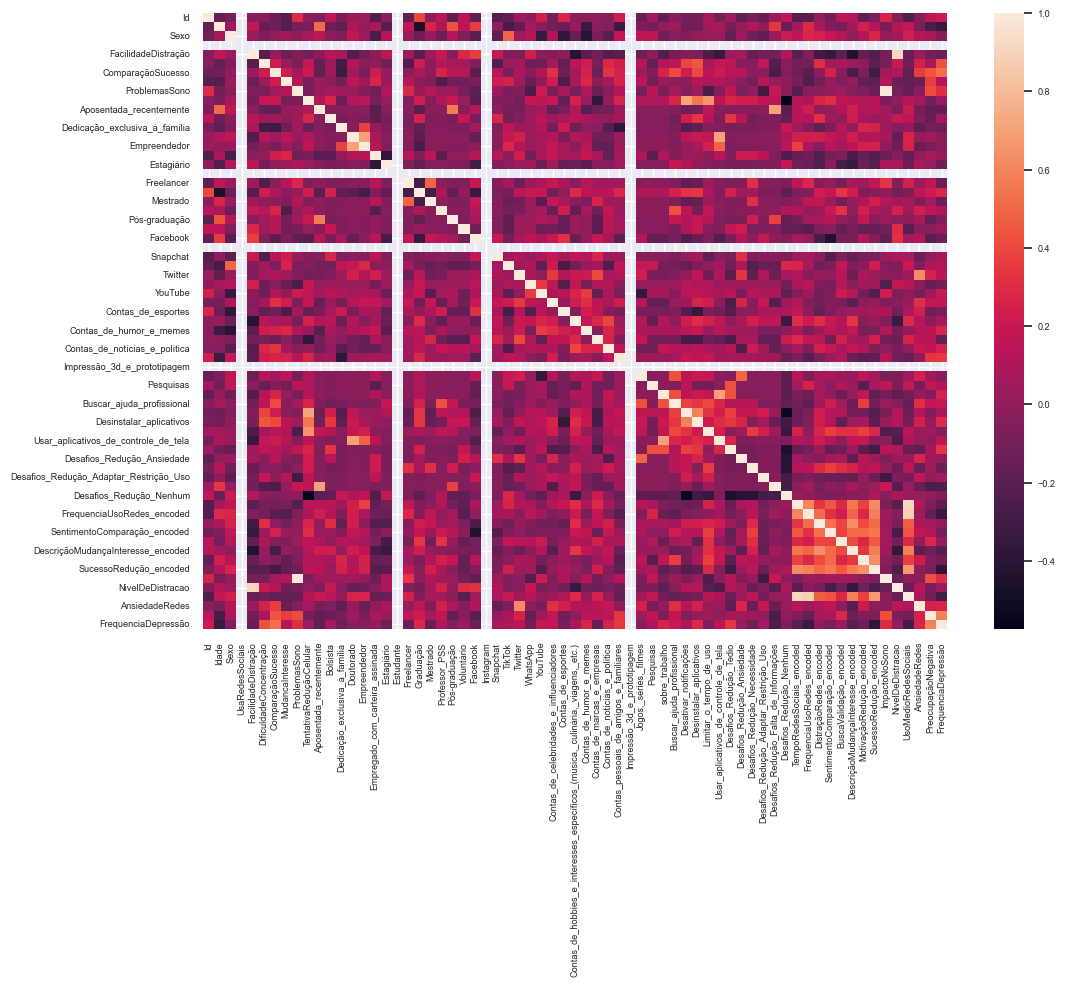

In [207]:
plt.figure(figsize=(12,8))

sns.heatmap(dados_completos.corr())

In [208]:
dados_completos.columns

Index(['Id', 'Idade', 'Sexo', 'UsaRedesSociais', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'MudancaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'Aposentada_recentemente',
       'Bolsista', 'Dedicação_exclusiva_à_família', 'Doutorado',
       'Empreendedor', 'Empregado_com_carteira_assinada', 'Estagiário',
       'Estudante', 'Freelancer', 'Graduação', 'Mestrado', 'Professor_PSS',
       'Pós-graduação', 'Voluntário', 'Facebook', 'Instagram', 'Snapchat',
       'TikTok', 'Twitter', 'WhatsApp', 'YouTube',
       'Contas_de_celebridades_e_influenciadores', 'Contas_de_esportes',
       'Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_etc.)',
       'Contas_de_humor_e_memes', 'Contas_de_marcas_e_empresas',
       'Contas_de_notícias_e_política',
       'Contas_pessoais_de_amigos_e_familiares', 'Impressão_3d_e_prototipagem',
       'Jogos,_séries,_filmes', 'Pesquisas', 'sobre_trabalho',
       'Buscar_ajuda_profis

<Axes: >

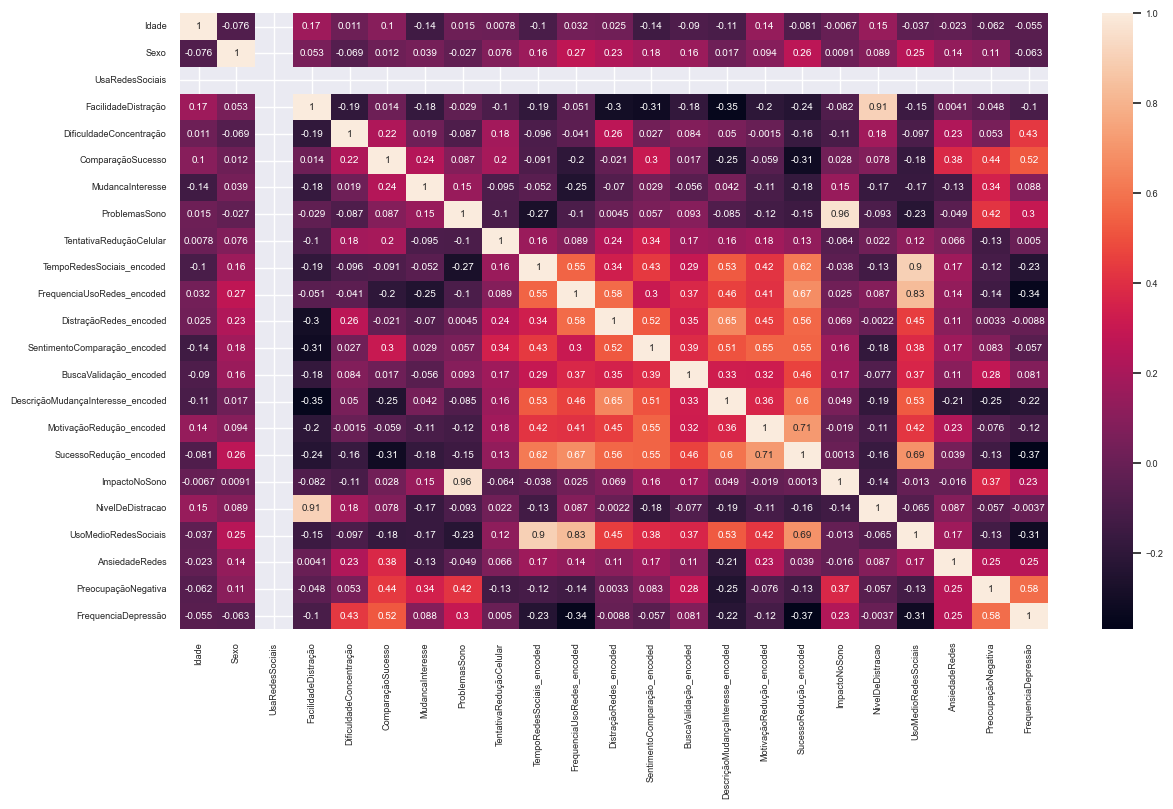

In [210]:
plt.figure(figsize=(14,8))

sns.heatmap(dados_completos[['Idade', 'Sexo', 'UsaRedesSociais', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'MudancaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'TempoRedesSociais_encoded', 'FrequenciaUsoRedes_encoded',
       'DistraçãoRedes_encoded', 'SentimentoComparação_encoded',
       'BuscaValidação_encoded', 'DescriçãoMudançaInteresse_encoded',
       'MotivaçãoRedução_encoded', 'SucessoRedução_encoded', 'ImpactoNoSono',
       'NivelDeDistracao', 'UsoMedioRedesSociais', 'AnsiedadeRedes',
       'PreocupaçãoNegativa', 'FrequenciaDepressão']].corr('spearman'), annot=True)

### Variáveis X Targets

In [212]:
dados_completos[['Idade', 'Sexo', 'UsaRedesSociais', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'MudancaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'TempoRedesSociais_encoded', 'FrequenciaUsoRedes_encoded',
       'DistraçãoRedes_encoded', 'SentimentoComparação_encoded',
       'BuscaValidação_encoded', 'DescriçãoMudançaInteresse_encoded',
       'MotivaçãoRedução_encoded', 'SucessoRedução_encoded', 'ImpactoNoSono',
       'NivelDeDistracao', 'UsoMedioRedesSociais', 'AnsiedadeRedes',
       'PreocupaçãoNegativa', 'FrequenciaDepressão']].corr('spearman')['AnsiedadeRedes'].sort_values(ascending=False)

AnsiedadeRedes                       1.000000
ComparaçãoSucesso                    0.376665
PreocupaçãoNegativa                  0.251097
FrequenciaDepressão                  0.248619
MotivaçãoRedução_encoded             0.232774
DificuldadeConcentração              0.226082
UsoMedioRedesSociais                 0.173878
TempoRedesSociais_encoded            0.170829
SentimentoComparação_encoded         0.169348
Sexo                                 0.136591
FrequenciaUsoRedes_encoded           0.136506
DistraçãoRedes_encoded               0.106594
BuscaValidação_encoded               0.105901
NivelDeDistracao                     0.086669
TentativaReduçãoCelular              0.065960
SucessoRedução_encoded               0.038536
FacilidadeDistração                  0.004094
ImpactoNoSono                       -0.016223
Idade                               -0.023329
ProblemasSono                       -0.048751
MudancaInteresse                    -0.133038
DescriçãoMudançaInteresse_encoded 

In [214]:
dados_completos[['Idade', 'Sexo', 'UsaRedesSociais', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'MudancaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'TempoRedesSociais_encoded', 'FrequenciaUsoRedes_encoded',
       'DistraçãoRedes_encoded', 'SentimentoComparação_encoded',
       'BuscaValidação_encoded', 'DescriçãoMudançaInteresse_encoded',
       'MotivaçãoRedução_encoded', 'SucessoRedução_encoded', 'ImpactoNoSono',
       'NivelDeDistracao', 'UsoMedioRedesSociais', 'AnsiedadeRedes',
       'PreocupaçãoNegativa', 'FrequenciaDepressão']].corr('spearman')['PreocupaçãoNegativa'].sort_values(ascending=False)

PreocupaçãoNegativa                  1.000000
FrequenciaDepressão                  0.581530
ComparaçãoSucesso                    0.437221
ProblemasSono                        0.419452
ImpactoNoSono                        0.373866
MudancaInteresse                     0.343598
BuscaValidação_encoded               0.278133
AnsiedadeRedes                       0.251097
Sexo                                 0.106178
SentimentoComparação_encoded         0.083105
DificuldadeConcentração              0.053089
DistraçãoRedes_encoded               0.003279
FacilidadeDistração                 -0.047538
NivelDeDistracao                    -0.057054
Idade                               -0.062442
MotivaçãoRedução_encoded            -0.075764
TempoRedesSociais_encoded           -0.116755
UsoMedioRedesSociais                -0.126235
TentativaReduçãoCelular             -0.132800
SucessoRedução_encoded              -0.134477
FrequenciaUsoRedes_encoded          -0.137362
DescriçãoMudançaInteresse_encoded 

In [215]:
dados_completos[['Idade', 'Sexo', 'UsaRedesSociais', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'MudancaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'TempoRedesSociais_encoded', 'FrequenciaUsoRedes_encoded',
       'DistraçãoRedes_encoded', 'SentimentoComparação_encoded',
       'BuscaValidação_encoded', 'DescriçãoMudançaInteresse_encoded',
       'MotivaçãoRedução_encoded', 'SucessoRedução_encoded', 'ImpactoNoSono',
       'NivelDeDistracao', 'UsoMedioRedesSociais', 'AnsiedadeRedes',
       'PreocupaçãoNegativa', 'FrequenciaDepressão']].corr('spearman')['FrequenciaDepressão'].sort_values(ascending=False)

FrequenciaDepressão                  1.000000
PreocupaçãoNegativa                  0.581530
ComparaçãoSucesso                    0.522438
DificuldadeConcentração              0.428685
ProblemasSono                        0.296008
AnsiedadeRedes                       0.248619
ImpactoNoSono                        0.233934
MudancaInteresse                     0.087841
BuscaValidação_encoded               0.081300
TentativaReduçãoCelular              0.004973
NivelDeDistracao                    -0.003738
DistraçãoRedes_encoded              -0.008768
Idade                               -0.054622
SentimentoComparação_encoded        -0.056798
Sexo                                -0.063089
FacilidadeDistração                 -0.102925
MotivaçãoRedução_encoded            -0.119397
DescriçãoMudançaInteresse_encoded   -0.222772
TempoRedesSociais_encoded           -0.231216
UsoMedioRedesSociais                -0.310749
FrequenciaUsoRedes_encoded          -0.344671
SucessoRedução_encoded            

<Axes: xlabel='AnsiedadeRedes', ylabel='Idade'>

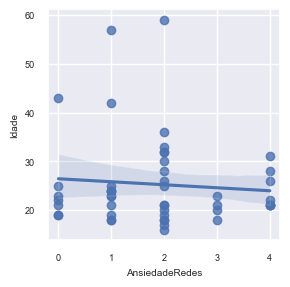

In [216]:
plt.figure(figsize=(3,3))
sns.regplot(data =dados_completos, y='Idade', x='AnsiedadeRedes')

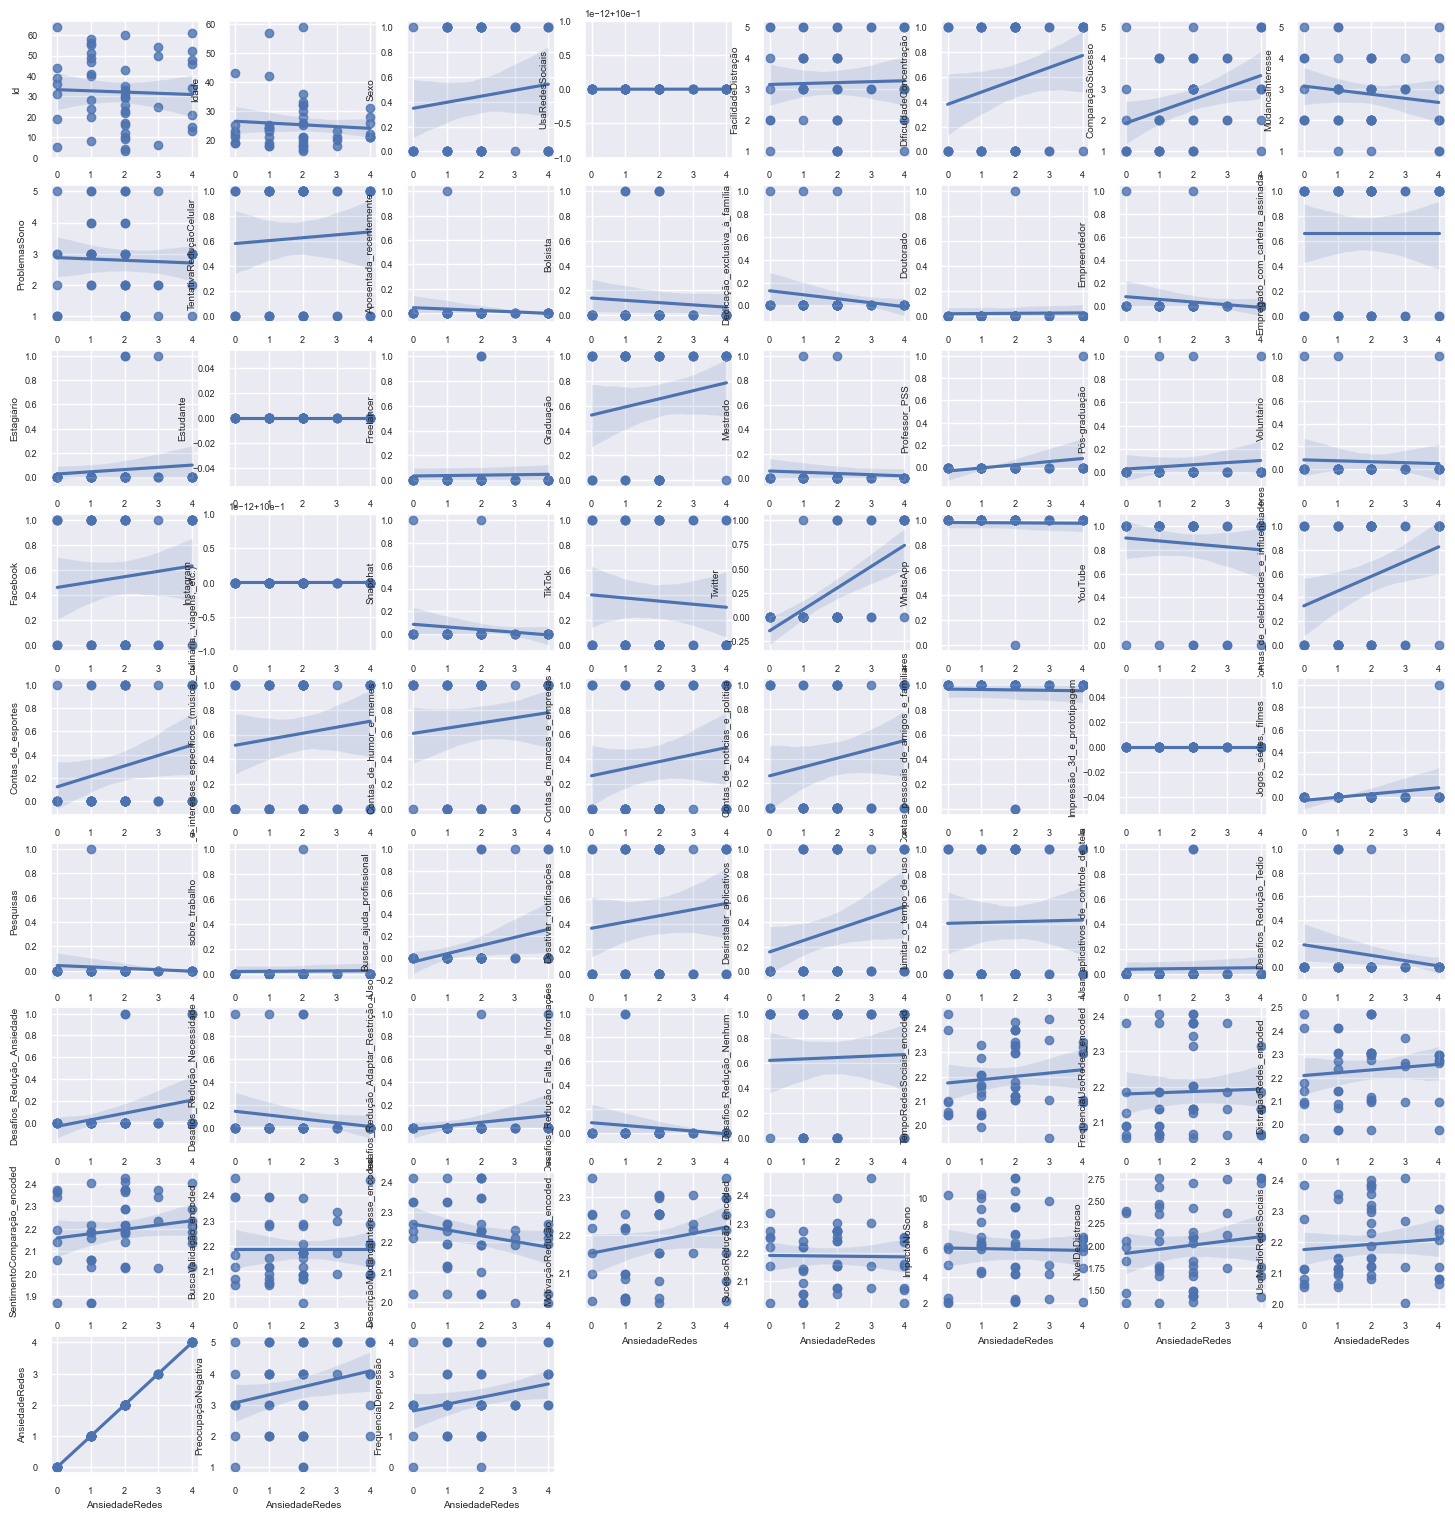

In [217]:
plt.figure(figsize=(18,21))
sns.set(font_scale=0.6)
for i, coluna in enumerate(dados_completos.columns):
    plt.subplot(10, 8, i+1)
    sns.regplot(data =dados_completos, y=coluna, x='AnsiedadeRedes')

In [219]:
dados_bar_plot = dados_completos[['Aposentada_recentemente',
       'Bolsista', 'Dedicação_exclusiva_à_família', 'Doutorado',
       'Empreendedor', 'Empregado_com_carteira_assinada', 'Estagiário',
       'Estudante', 'Freelancer', 'Graduação', 'Mestrado', 'Professor_PSS',
       'Pós-graduação', 'Voluntário', 'Facebook', 'Instagram', 'Snapchat',
       'TikTok', 'Twitter', 'WhatsApp', 'YouTube',
       'Contas_de_celebridades_e_influenciadores', 'Contas_de_esportes',
       'Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_etc.)',
       'Contas_de_humor_e_memes', 'Contas_de_marcas_e_empresas',
       'Contas_de_notícias_e_política',
       'Contas_pessoais_de_amigos_e_familiares', 'Impressão_3d_e_prototipagem',
       'Jogos,_séries,_filmes', 'Pesquisas', 'sobre_trabalho',
       'Buscar_ajuda_profissional', 'Desativar_notificações',
       'Desinstalar_aplicativos', 'Limitar_o_tempo_de_uso',
       'Usar_aplicativos_de_controle_de_tela', 'Desafios_Redução_Tedio',
       'Desafios_Redução_Ansiedade', 'Desafios_Redução_Necessidade',
       'Desafios_Redução_Adaptar_Restrição_Uso',
       'Desafios_Redução_Falta_de_Informações', 'Desafios_Redução_Nenhum', 'AnsiedadeRedes', 'PreocupaçãoNegativa', 'FrequenciaDepressão']]

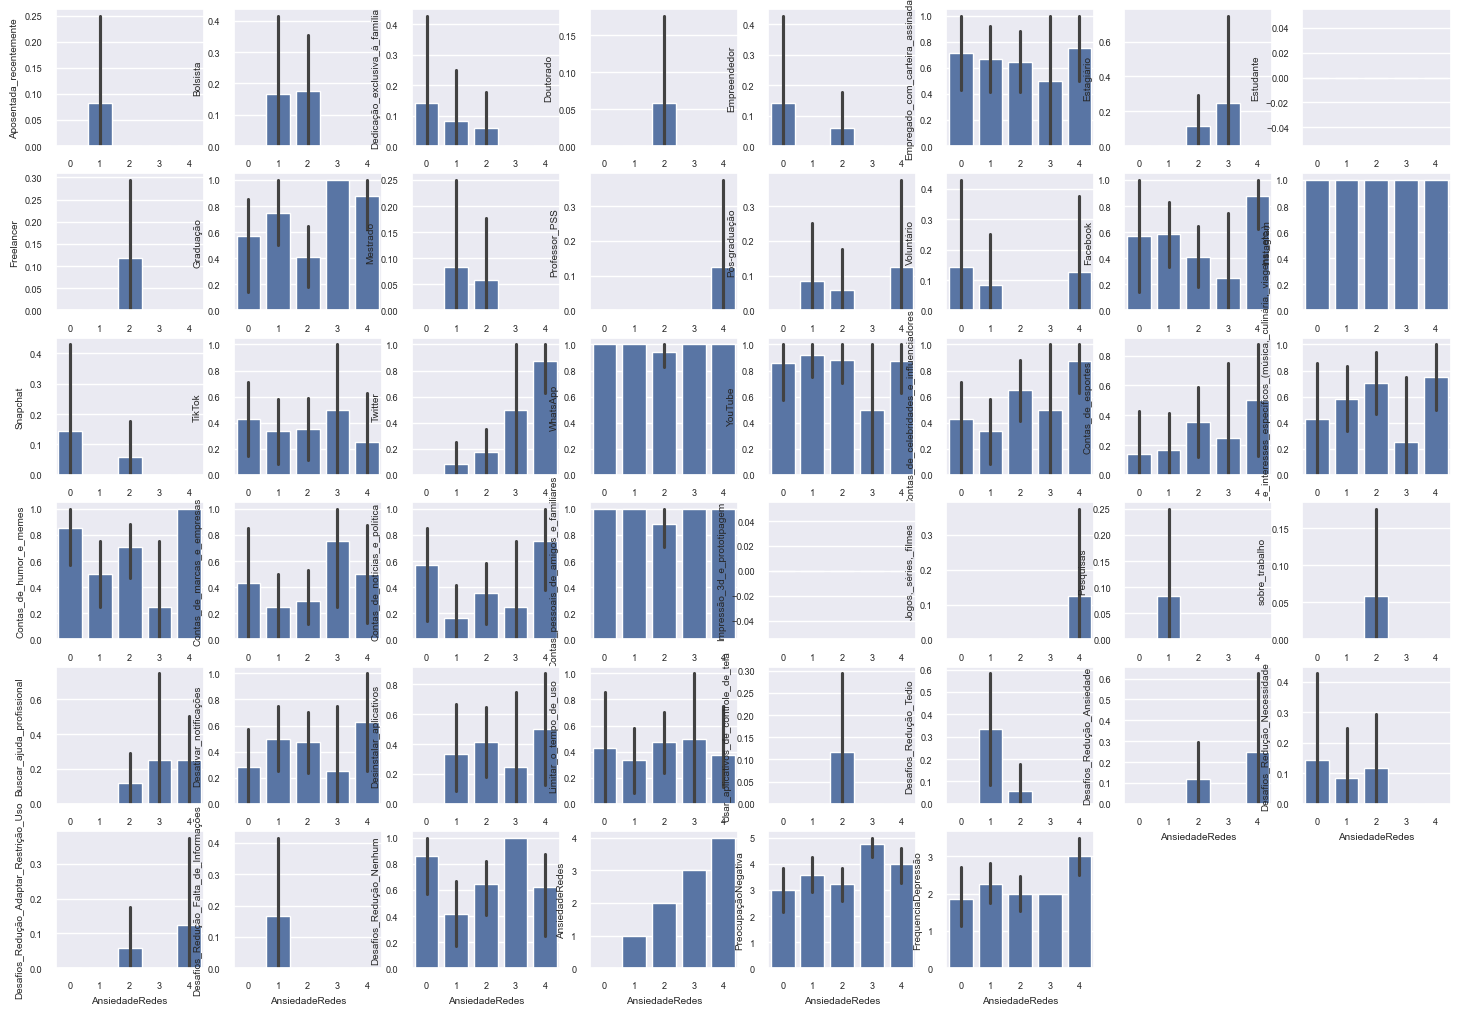

In [220]:
plt.figure(figsize=(18,21))
sns.set(font_scale=0.6)
for i, coluna in enumerate(dados_bar_plot.columns):
    plt.subplot(10, 8, i+1)
    sns.barplot(data =dados_bar_plot, y=coluna, x='AnsiedadeRedes')

In [230]:
colunas = ['FacilidadeDistração', 'UsoMedioRedesSociais', 'ImpactoNoSono']

dados_featutes_train = dados_features_train.drop(columns=colunas)



In [226]:
dados_features_train.columns

Index(['Id', 'Idade', 'Sexo', 'UsaRedesSociais', 'FacilidadeDistração',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'MudancaInteresse',
       'ProblemasSono', 'TentativaReduçãoCelular', 'Aposentada_recentemente',
       'Bolsista', 'Dedicação_exclusiva_à_família', 'Doutorado',
       'Empreendedor', 'Empregado_com_carteira_assinada', 'Estagiário',
       'Estudante', 'Freelancer', 'Graduação', 'Mestrado', 'Professor_PSS',
       'Pós-graduação', 'Voluntário', 'Facebook', 'Instagram', 'Snapchat',
       'TikTok', 'Twitter', 'WhatsApp', 'YouTube',
       'Contas_de_celebridades_e_influenciadores', 'Contas_de_esportes',
       'Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_etc.)',
       'Contas_de_humor_e_memes', 'Contas_de_marcas_e_empresas',
       'Contas_de_notícias_e_política',
       'Contas_pessoais_de_amigos_e_familiares', 'Impressão_3d_e_prototipagem',
       'Jogos,_séries,_filmes', 'Pesquisas', 'sobre_trabalho',
       'Buscar_ajuda_profis

In [ ]:
dados_completos = pd.concat([dados_features_train, dados_targets_train], axis=1)

In [ ]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 13 to 38
Data columns (total 67 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Id                                                                             48 non-null     int64  
 1   Idade                                                                          48 non-null     int64  
 2   Sexo                                                                           48 non-null     int64  
 3   UsaRedesSociais                                                                48 non-null     int64  
 4   FacilidadeDistração                                                            48 non-null     int64  
 5   DificuldadeConcentração                                                        48 non-null     int64  
 6   ComparaçãoSucesso               